# INTRO. Data Collection: from multiple sources to one dataset with relevant indicators.

For this research, at first, we explored 3 recommended data sources(Hamoye_Capstone_Electrification_data.ipynb):

- **Global Electrification Database** by Harvard Dataverse - https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi%3A10.7910%2FDVN%2FBZBKJP

- **The World Bank data** - Access to electricity (% of the population) and more - https://data.worldbank.org/indicator/EG.ELC.ACCS.ZS
- **World Energy Statistics and Balances IAE 50** - https://www.iea.org/data-and-statistics/data-product/monthly-electricity-statistics.

But Harvard Dataverse dataset has yearly data for 124 countries only up to 2015, and IAE 50 dataset has monthly electricity production and trade data only for  OECD countries and not for SSA countries, so these two data sources do not provide relevant information for our project focused SSA Africa.

To gather sufficient data for reliable results and a more accurate Generative AI model, we sourced additional data from:
- **Tracking SDG 7** - The Energy Progress Report - https://trackingsdg7.esmap.org/results
- **Our World in Data** - https://ourworldindata.org/grapher/share-with-access-to-electricity-vs-per-capita-energy-consumption
- **Ember** - https://ember-climate.org/app/uploads/2022/07/yearly_full_release_long_format.csv
- **UN Data** - Unated Nations Data Retrieval System - https://data.un.org/Data.aspx?d=EDATA&f=cmID%3AEC
- **AEP** - Africa Energy Portal  - https://africa-energy-portal.org/database
(see Hamoye_Capstone_Electrification_data.ipynb, new_data.ipynb)
From each source only relevant indicators were taken for 49 SSA countries and regions (where possible). We sought for indicators related directly to electricity  or other factors which might influence it (population, income group and so on).

 **Data Sources and indicators**(indicator's name in the source, unit, years, indicator's final name in the project)
1. The World Bank:
- Access to electricity Total(% of population) 1990-2021: 'el_access_total'
- Access to electricity Urban (% of population) 1990-2021: 'el_access_urban'
- Access to electricity Rural (% of population) 1990-2021: 'el_access_rural'
- Urban population (% of total population) 1960-2022: 'urban_share'
- IncomeGroup, defined in 2021: 'income_group',
- GDP per capita,current USD, 1960-2022: 'gdp_pc'

2. Our World in Data:
- Primary energy consumption per capita (kWh/person), 1990-2021: 'primary_energy_consumption_pc'
- Population(historical estimates),1990-2021: 'population'
- Total electricity generation  TWh, 1985-2023: 'el_generation'
- Per capita electricity generation, KWh, 1985-2023: 'el_generation_pc'
- Net electricity imports, TWh, 1990-2023: 'net_imports'
- Electricity demand as total electricity generation, adjusted for electricity imports and exports TWh, 1990-2023: 'el_demand'
- Electricity production by source, TWh, 1985-2023: 'el_from_coal', 'el_from_gas', 'el_from_nuclear', 'el_from_hydro', 'el_from_solar', 'el_from_oil', 'el_from_wind', 'el_from_bioenergy', 'renewables_other',
- Number of people without access to electricity, 1990-2019: 'pop_no_el_access_total'

3. Ember:
- Electricity Demand per capita MWh 2000-2023 - 'el_demand_pc'

4. TRACKING SDG 7:
- added data for 2022 for the indicated sourced from the World Bank indicators: 'el_access_total', 'el_access_urban', 'el_access_rural'
- added data for 2000-2022 for 'pop_no_access_total' sourced from Our World in Data
- international public aid in support of clean and renewable energies to developing countries, USD million, 2000-2022: 'fin_support'

5. UN Data
- extracted indicators 'total_population', 'urban_population', and calcilated 'urban_share' 1990-2022. We got 2 pairs of similar indicators from different sources: 'population'-'total_population', 'urban_pop_share' - 'urban_share'. Pairs of indicators were combined with combine_first method:  by taking the first value from the World Bank and Our World in Data if not NaN, otherwise the second from UN Data.
-  Electricity - installed capacity of electric power plants, Kilowatts, thousand, 1990-2022:
 - Electricity - total net installed capacity of electric power plants, main activity & autoproducer: 'el_inst_capacity_total',
 - Electricity - total net installed capacity of electric power plants, hydro: 'el_inst_capacity_hydro',
 - Electricity - total net installed capacity of electric power plants, combustible fuels: 'el_inst_capacity_combustible',
 - Electricity - total net installed capacity of electric power plants, solar: 'el_inst_capacity_solar',
 - Electricity - total net installed capacity of electric power plants, wind: 'el_inst_capacity_wind',
 - 'Electricity - total net installed capacity of electric power plants, geothermal: 'el_inst_capacity_geoterm',
 - Electricity - total net installed capacity of electric power plants, nuclear: 'el_inst_capacity_nuclear',
 - 'Electricity generating capacity - From other sources - Total: 'el_inst_capacity_other'.
- Electricity - Final Energy consumprion Kilowatt-hours, million, 1990-2022: 'final_energy_consumption'
- Electricity - Gross demand, Kilowatt-hours, million, 1990-2022: 'el_gross_demand'
- Electricity - Gross Production, Kilowatt-hours, million, 1990-2022: 'el_gross_production'
- Electricity - Net Production, Kilowatt-hours, million, 1990-2022: 'el_net_production'
- Electricity - Imports, Kilowatt-hours, million, 1990-2022: 'el_imports'
- Electricity - Exports, Kilowatt-hours, million, 1990-2022: 'el_exports'

6. AEP - indicators about electricity access, generation by source, installed capacity, electricity final consumption  were examined, but there are only values up to 2021 - no new data, so AEP data was not used in the project.

These indicators were taken from sources for 49 SSA countries and regions, where possible. Since only several indicators had data before 1990, only the years 1990-2023 were taken.  Country and region names are inconsistent across sources(there are several variants of some countries' spelling and several versions of splitting per regions). To enable data merging country and region names were cleaned, then tables with indicators were merged on common entity and year in one dataset.

So,**finally at this stage**  we got df_all dataset of 2166 rows, 39 columns, with all extracted indicators for SSA countries and regions for 1990-2023.




# 1.df dataset overview

##1.1 Indicators

**Indicators explained**: column name - indicator - unit - source - years.
1. 'entity' - country SSA or region of the World. 1990-2023
2. 'income_group' - a country's income groupe estimation: : high/low..., defined at 2021 (World Bank)
3. 'year' - year the data was gathered 1990-2023
4. 'electricity_access_total' - share of total population with access to electricity (%). Having access to electricity is defined in international statistics as having an electricity source that can provide very basic lighting, and charge a phone or power a radio for 4 hours per day(%), World Bank, 1990-2021
5. 'electricity_access_urban' - share of urban population with access to electricity(%), World Bank, 1990-2021
6. 'electricity_access_rural' - of rural population with access to electricity (%), World Bank, 1990-2021
7. 'gdp_pc' - GDP per capita values (current USD), World Bank, 1990-2023
8. 'electricity_generation' - Total electricity generation (Our World in Data, Last updated May 8,2024 terawatt-hours). 1990-2023
9. 'electricity_pc'- Annual average electricity generation per person, measured in kilowatt-hours. (kWh, Our World in Data, Last updated May 8,2024 t1990-2023
10. 'electricity_from_coal' - Electricity produced from coal (terawatt-hours, Our World in Data) 1990-2023
11. 'electricity_from_gas' - Electricity produced from gas(terawatt-hours, Our World in Data) 1990-2023
12. 'electricity_from_nuclear' - Electricity produced from nuclear emergy (terawatt-hours, Our World in Data) 1990-2023
13. 'electricity_from_hydro'- Electricity produced from hydro energy (terawatt-hours, Our World in Data) 1990-2023
14. 'electricity_from_solar'- Electricity produced from solar(terawatt-hours, Our World in Data) 1990-2023
15. 'electricity_from_oil' - Electricity produced from oil(terawatt-hours, Our World in Data) 1990-2023
16. 'electricity_from_wind' - Electricity produced from wind(terawatt-hours, Our World in Data) 1990-2023
17. 'electricity_from_bioenergy' - Electricity produced from bioenery (terawatt-hours, Our World in Data) 1990-2023
18. 'other renewables excluding bioenergy - twh' - Electricity produced from other renewables excluding bioenergy (terawatt-hours, Our World in Data) 1990-2023
19. 'net_imports' - Net electricity imports are calculated as electricity imports minus exports (terawatt-hours, Our World in Data) 1990-2023
20. 'el_demand' - Total electricity generation, adjusted for electricity imports and exports(terawatt-hours, Our World in Data, Last updated May 8, 2024) 1990-2023
21. 'pop_no_electr_access_total' - Total number of people without access to electricity. Having access to electricity is defined as having an electricity source that can provide very basic lighting, and charge a phone or power a radio for 4 hours per day (Our World in Data from World Bank). 1990-2019
22. 'el_demand_pc' - Annual average electricity generation per person while demand_pc_new is for adjusted electricity generation per person (plus imports)(megawatt-hours, Ember, Yearly electricity data, Updated on 18 June 2024) 1990 - 2022
23. 'finans_support' - International public aid in support of clean and renewable energies to developing countries. It covers financial supportfor all renewables, Bioenergy, Geothermal energy,Hydropower,Marine energy,Multiple renewables, Solar energy, Wind energy (USD million, TRACKING SDG 7,The Energy Progress Report) 2000-2021
24. 'n_population' - total population(historical estimates in Our World in Data 'population' and UnData 'total_population' combined with .take_first method) 1990-2022
25. 'n_urban_share' - share of urban population in total population(%)(World Bank 'urban_pop_share' and UnData 'urban_share' combined with .take_first method) 1990 - 2022
26. electr_inst_capacity_combustible - Electricity - total net installed capacity of electric power plants, combustible fuels (Kilowatts, thousand, UNData) - 2022
27. 'electr_inst_capacity_geoterm' - Electricity - total net installed capacity of electric power plants, geothermal (Kilowatts, thousand, UNData) - 2022,
28. 'electr_inst_capacity_hydro -'Electricity - total net installed capacity of electric power plants, hydro' (Kilowatts, thousand, UNData) - 2022,
29. 'electr_inst_capacity_nuclear' - Electricity - total net installed capacity of electric power plants, nuclear'(Kilowatts, thousand, UNData) - 2022,
30. 'electr_inst_capacity_other' - Electricity generating capacity - From other sources - Total (Kilowatts, thousand, UNData) - 2022
31. 'electr_inst_capacity_solar' - Electricity - total net installed capacity of electric power plants, solar (Kilowatts, thousand, UNData) - 2022,
32. 'electr_inst_capacity_total' - Electricity - total net installed capacity of electric power plants, main activity & autoproducer (Kilowatts, thousand, UNData) - 2022
33. 'electr_inst_capacity_wind' - Electricity - total net installed capacity of electric power plants, wind (Kilowatts, thousand, UNData) - 2022
34. 'final_energy_consumption -  refers to all fuel and energy that are delivered to users for their energy use.(Kilowatt-hours, million	UNData) - 2022
35. 'el_gross_demand' - Electricity - Gross demand (Kilowatt-hours, million, UNData) - 2022
36. 'el_gross_production' - Electricity - gross production (Kilowatt-hours, million, UNData) - 2022. This is the total amount of electricity generated by all power plants within before any deductions.
37. 'el_net_production' - Electricity - net production (Kilowatt-hours, million, UNData) - 2022. This is the amount of electricity that is actually available for use after subtracting the electricity consumed by the power plants themselves (auxiliary consumption). Net Electricity Production=Gross Electricity Production−Auxiliary Consumption

38. 'el_imports' -  Electricity - imports: comprise all electricity entering the national territory. (Kilowatt-hours, million, UNData) - 1990- 2022
39. 'el_exmports' - Electricity - exports:comprise all electricity leaving the national territory (Kilowatt-hours, million, UNData) 1990 - 2022


All 39 indicators can be divided groups:
- General indicators: entity, year

- Finance: 'income_group', 'gdp_pc'
- Population: 'population', 'urban_pop_share'
- Energy:'final_energy_consumption, international public aid in support of clean and renewable energies to developing countries.

- All other indicators are related to electricity.





**About production/generation**:
- 'electricity_pc'(generation, kWtH  per person)
- 'electricity_generation' (terawatt-hours):
- electricity production: 'el_gross_production','el_net_production'

**About imports**
- 'net_imports'((terawatt-hours),
- ' el_imports',
- 'el_exports'  


**About demand**:
- 'el_demand',
- 'el_demand_pc'(mwh per person),
- 'el_gross_demand'

**About access**:
 - 'electricity_access_total/ urban'/ rural'- % ,
 - 'pop_no_electr_access_total'

**About source of generation**:
- 'electricity_from_coal / gas/ nuclear/ hydro/ solar/ oil/ wind/ bioenergy/ renewables_minus_bioenergy'

**About installed capacity**:
- electr_inst_capacity_total/combustible/geoterm/hydro/nuclear/solar/wind/other



We have to find the best parameters to represent demand and supply, to measure the  demand/supply gap - our target.


##1.2.Install libraries, load data

In [87]:
%pip install sidetable

In [2]:
pip install scikit-learn

In [3]:
pip install prophet

In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno #visulalize nans
import matplotlib.pyplot as plt
import sidetable as stb
import plotly.express as px
from sklearn.impute import KNNImputer
from prophet import Prophet
import missingno as msno #visulalize nans

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [116]:
path='/content/drive/MyDrive/Hamoye_capstone_project_data/df_all.csv'

In [117]:
df_all=pd.read_csv(path)

In [118]:
df_all.head()

entity income_group  year  electricity_access_total  \
0  Africa ()          NaN  1990                       NaN   
1  Africa ()          NaN  1991                       NaN   
2  Africa ()          NaN  1992                       NaN   
3  Africa ()          NaN  1993                       NaN   
4  Africa ()          NaN  1994                       NaN   

   electricity_access_urban  electricity_access_rural  gdp_pc  \
0                       NaN                       NaN     NaN   
1                       NaN                       NaN     NaN   
2                       NaN                       NaN     NaN   
3                       NaN                       NaN     NaN   
4                       NaN                       NaN     NaN   

   electricity_generation  electricity_pc  electricity_from_coal  ...  \
0                     NaN       499.52590                    NaN  ...   
1                     NaN       495.91983                    NaN  ...   
2                     NaN       487.95328                    NaN  ...   
3                     NaN       492.02423                    NaN  ...   
4                     NaN       497.29596                    NaN  ...   

   electr_inst_capacity_other  electr_inst_capacity_solar  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

   electr_inst_capacity_total  electr_inst_capacity_wind  \
0                         NaN                        NaN   
1                         NaN                        NaN   
2                         NaN                        NaN   
3                         NaN                        NaN   
4                         NaN                        NaN   

   final_energy_consumption  el_gross_demand  el_gross_production  \
0                       NaN              NaN                  NaN   
1                       NaN              NaN                  NaN   
2                       NaN              NaN                  NaN   
3                       NaN              NaN                  NaN   
4                       NaN              NaN                  NaN   

   el_net_production  el_imports  el_exports  
0                NaN         NaN         NaN  
1                NaN         NaN         NaN  
2                NaN         NaN         NaN  
3                NaN         NaN         NaN  
4                NaN         NaN         NaN  

[5 rows x 39 columns]

In [119]:
df_all.shape

(2166, 39)

In [120]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 39 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   entity                                      2166 non-null   object 
 1   income_group                                1666 non-null   object 
 2   year                                        2166 non-null   int64  
 3   electricity_access_total                    1538 non-null   float64
 4   electricity_access_urban                    1558 non-null   float64
 5   electricity_access_rural                    1351 non-null   float64
 6   gdp_pc                                      1798 non-null   float64
 7   electricity_generation                      1330 non-null   float64
 8   electricity_pc                              1360 non-null   float64
 9   electricity_from_coal                       1330 non-null   float64
 10  electricity_

 ## 1.3 Data types

 pop_no_electr_access_total is object, while it should be integer. It has Nans and can't be directly converted to int.


In [121]:
# 1. Handle NaNs and convert to numeric
df_all['pop_no_electr_access_total'] = pd.to_numeric(df_all['pop_no_electr_access_total'], errors='coerce')

# 2. Convert to integer
df_all['pop_no_electr_access_total'] = df_all['pop_no_electr_access_total'].fillna(0).astype(int)
df_all['pop_no_electr_access_total'] = df_all['pop_no_electr_access_total'].replace(0, np.nan)

# Convert float64 columns to float32
float64_cols = df_all.select_dtypes(include=['float64']).columns
df_all[float64_cols] = df_all[float64_cols].astype(np.float32)

df_all.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 39 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   entity                                      2166 non-null   object 
 1   income_group                                1666 non-null   object 
 2   year                                        2166 non-null   int64  
 3   electricity_access_total                    1538 non-null   float32
 4   electricity_access_urban                    1558 non-null   float32
 5   electricity_access_rural                    1351 non-null   float32
 6   gdp_pc                                      1798 non-null   float32
 7   electricity_generation                      1330 non-null   float32
 8   electricity_pc                              1360 non-null   float32
 9   electricity_from_coal                       1330 non-null   float32
 10  electricity_

## 1.4 Rename columns

In [122]:
#rename columns 'n_population':'population', 'n_urban_share': 'urban_share','other renewables excluding bioenergy - twh':'renewables_other'
df_all.rename(columns={'n_population':'population',
                       'n_urban_share': 'urban_share',
                       'electricity_pc':'electricity_generation_pc',
                       'other renewables excluding bioenergy - twh':'renewables_other',
                       'finans_support':'fin_support',
                       'net imports - twh':'net_imports',
                       'el_demand_pc_mwh':'el_demand_pc'
                        }, inplace=True)

In [123]:
df_all.columns

Index(['entity', 'income_group', 'year', 'electricity_access_total',
       'electricity_access_urban', 'electricity_access_rural', 'gdp_pc',
       'electricity_generation', 'electricity_generation_pc',
       'electricity_from_coal', 'electricity_from_gas',
       'electricity_from_nuclear', 'electricity_from_hydro',
       'electricity_from_solar', 'electricity_from_oil',
       'electricity_from_wind', 'electricity_from_bioenergy',
       'renewables_other', 'net_imports', 'el_demand',
       'pop_no_electr_access_total', 'el_demand_pc', 'fin_support',
       'population', 'urban_share', 'electr_inst_capacity_combustible',
       'electr_inst_capacity_geoterm', 'electr_inst_capacity_hydro',
       'electr_inst_capacity_nuclear', 'electr_inst_capacity_other',
       'electr_inst_capacity_solar', 'electr_inst_capacity_total',
       'electr_inst_capacity_wind', 'final_energy_consumption',
       'el_gross_demand', 'el_gross_production', 'el_net_production',
       'el_imports', 'el_e

In [124]:
#in all column names containing 'electricity' or 'electr'  substring replace it with 'el'
df_all.columns = df_all.columns.str.replace('electricity', 'el')
df_all.columns = df_all.columns.str.replace('electr', 'el')
df_all.columns

Index(['entity', 'income_group', 'year', 'el_access_total', 'el_access_urban',
       'el_access_rural', 'gdp_pc', 'el_generation', 'el_generation_pc',
       'el_from_coal', 'el_from_gas', 'el_from_nuclear', 'el_from_hydro',
       'el_from_solar', 'el_from_oil', 'el_from_wind', 'el_from_bioenergy',
       'renewables_other', 'net_imports', 'el_demand',
       'pop_no_el_access_total', 'el_demand_pc', 'fin_support', 'population',
       'urban_share', 'el_inst_capacity_combustible',
       'el_inst_capacity_geoterm', 'el_inst_capacity_hydro',
       'el_inst_capacity_nuclear', 'el_inst_capacity_other',
       'el_inst_capacity_solar', 'el_inst_capacity_total',
       'el_inst_capacity_wind', 'final_energy_consumption', 'el_gross_demand',
       'el_gross_production', 'el_net_production', 'el_imports', 'el_exports'],
      dtype='object')

In [125]:
df_all = df_all[['entity', 'year', 'income_group', 'gdp_pc', 'population', 'urban_share',
                 'el_access_total', 'el_access_urban', 'el_access_rural', 'pop_no_el_access_total',
                 'el_generation', 'el_generation_pc', 'el_gross_production', 'el_net_production',
                 'el_demand', 'el_demand_pc', 'el_gross_demand', 'final_energy_consumption',
                 'el_from_coal', 'el_from_gas', 'el_from_nuclear', 'el_from_hydro',
                 'el_from_solar', 'el_from_oil', 'el_from_wind', 'el_from_bioenergy', 'renewables_other',
                 'el_inst_capacity_combustible', 'el_inst_capacity_geoterm', 'el_inst_capacity_hydro',
                 'el_inst_capacity_nuclear', 'el_inst_capacity_other',
                 'el_inst_capacity_solar', 'el_inst_capacity_total', 'el_inst_capacity_wind',
                 'net_imports', 'el_imports', 'el_exports', 'fin_support']]


##1.5 Edit units

In [126]:
#turn Gwh to Twh  dividing by 1000
df_all['final_energy_consumption'] = df_all['final_energy_consumption'] / 1000
df_all['el_gross_production'] = df_all['el_gross_production'] / 1000
df_all['el_net_production'] = df_all['el_net_production'] / 1000
df_all['el_imports'] = df_all['el_imports'] / 1000
df_all['el_exports'] = df_all['el_exports'] / 1000
df_all['el_gross_demand'] = df_all['el_gross_demand'] / 1000

Our 'el_generation_pc' is in kilowatt-hour, while 'el_generation_pc_adj' is in mega whatt-hour. Let's make them comparable

In [127]:
# turn kilowatt-hour to megawatt-hour
df_all['el_generation_pc'] = df_all['el_generation_pc'] / 1000


In [128]:
df_all.dtypes

entity                           object
year                              int64
income_group                     object
gdp_pc                          float32
population                      float32
urban_share                     float32
el_access_total                 float32
el_access_urban                 float32
el_access_rural                 float32
pop_no_el_access_total          float32
el_generation                   float32
el_generation_pc                float32
el_gross_production             float32
el_net_production               float32
el_demand                       float32
el_demand_pc                    float32
el_gross_demand                 float32
final_energy_consumption        float32
el_from_coal                    float32
el_from_gas                     float32
el_from_nuclear                 float32
el_from_hydro                   float32
el_from_solar                   float32
el_from_oil                     float32
el_from_wind                    float32


##1.7 Electric power consumption
We check one more indicator from the WB

In [129]:
path = '/content/drive/MyDrive/Hamoye_capstone_project_data/API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_558657.csv'

In [130]:
el=pd.read_csv(path, skiprows=4)
el.head()

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                Indicator Name     Indicator Code  1960  1961  \
0  Electric power consumption (kWh per capita)  EG.USE.ELEC.KH.PC   NaN   NaN   
1  Electric power consumption (kWh per capita)  EG.USE.ELEC.KH.PC   NaN   NaN   
2  Electric power consumption (kWh per capita)  EG.USE.ELEC.KH.PC   NaN   NaN   
3  Electric power consumption (kWh per capita)  EG.USE.ELEC.KH.PC   NaN   NaN   
4  Electric power consumption (kWh per capita)  EG.USE.ELEC.KH.PC   NaN   NaN   

   1962  1963  1964  1965  ...  2015  2016  2017  2018  2019  2020  2021  \
0   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2022  2023  Unnamed: 68  
0   NaN   NaN          NaN  
1   NaN   NaN          NaN  
2   NaN   NaN          NaN  
3   NaN   NaN          NaN  
4   NaN   NaN          NaN  

[5 rows x 69 columns]

In [131]:
#rename in el columns 'country name': 'entity' and drop 'Unnamed: 68'
el.rename(columns={'Country Name':'entity'},inplace=True)
el.drop(columns=['Unnamed: 68'],inplace=True)
el.head(2)


entity Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   

                                Indicator Name     Indicator Code  1960  1961  \
0  Electric power consumption (kWh per capita)  EG.USE.ELEC.KH.PC   NaN   NaN   
1  Electric power consumption (kWh per capita)  EG.USE.ELEC.KH.PC   NaN   NaN   

   1962  1963  1964  1965  ...        2014  2015  2016  2017  2018  2019  \
0   NaN   NaN   NaN   NaN  ...         NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN  ...  680.149943   NaN   NaN   NaN   NaN   NaN   

   2020  2021  2022  2023  
0   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN  

[2 rows x 68 columns]

In [132]:
el.columns.get_loc('1990')

34

In [133]:
#drop columns from 3 through 33
el.drop(columns=el.columns[1:34],inplace=True)
el.head()


entity        1990        1991        1992  \
0                        Aruba         NaN         NaN         NaN   
1  Africa Eastern and Southern  772.930916  753.929970  722.735464   
2                  Afghanistan         NaN         NaN         NaN   
3   Africa Western and Central  129.349667  130.715121  133.031832   
4                       Angola   53.260570   54.543859   53.591896   

         1993        1994        1995        1996        1997        1998  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1  721.294151  722.739143  733.306039  812.794981  824.332919  786.014510   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3  136.674996  131.443212  132.836337  130.580762  132.379247  119.269682   
4   52.154158   50.809570   49.380931   51.170277   69.328887   73.274547   

   ...        2014  2015  2016  2017  2018  2019  2020  2021  2022  2023  
0  ...         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1  ...  680.149943   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2  ...         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3  ...  183.440206   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  ...  310.081668   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 35 columns]

In [134]:
el.entity.unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
 

In [135]:
countries_ssa=['Angola', 'Burundi', 'Benin', 'Burkina Faso', 'Botswana',
       'Central African Republic', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Comoros', 'Cabo Verde',
       'Djibouti','Eritrea', 'Ethiopia', 'Gabon', 'Ghana', 'Guinea', 'Gambia, The',
       'Guinea-Bissau', 'Equatorial Guinea', 'Kenya', 'Liberia',
       'Lesotho', 'Madagascar', 'Mali', 'Mozambique', 'Mauritania',
       'Mauritius', 'Malawi', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sudan', 'Senegal', 'Sierra Leone', 'Somalia', 'South Sudan',
       'Sao Tome and Principe', 'Eswatini', 'Seychelles', 'Chad', 'Togo',
       'Tanzania', 'Uganda', 'South Africa', 'Zambia', 'Zimbabwe']

In [136]:
#find entities in el which are in countries_ssa
el_ssa=[]
for i in el.entity.unique():
  if i in countries_ssa:
    el_ssa.append(i)
len(el_ssa)

49

In [137]:
regions_wb= ['Latin America and Caribbean (WB)','South Asia (WB)',
'Sub-Saharan Africa (WB)', 'Europe and Central Asia (WB)',
'Middle East and North Africa (WB)', 'East Asia and Pacific (WB)','North America (WB)']

In [138]:
dict_reg={'Latin America & Caribbean':'Latin America and Caribbean (WB)',
'South Asia':'South Asia (WB)',
'Sub-Saharan Africa':'Sub-Saharan Africa (WB)',
      'Europe & Central Asia':'Europe and Central Asia (WB)',
      'Middle East & North Africa':'Middle East and North Africa (WB)',
          'East Asia & Pacific':'East Asia and Pacific (WB)',
         'North America' :'North America (WB)'}


In [139]:
#replace entities  with dict_reg
el.entity.replace(dict_reg, inplace=True)

In [140]:
#find entities which are in regions_wb
el_regions=[]
for i in el.entity.unique():
  if i in regions_wb:
    el_regions.append(i)
len(el_regions)

7

In [141]:
valid_entities =regions_wb + countries_ssa + ['World']

In [142]:
#take rows  where entity is in valid_entities
el_consumption=el[el['entity'].isin(valid_entities)]
el_consumption.shape

(57, 35)

In [143]:
el_consumption.head(2)

entity      1990       1991       1992       1993      1994       1995  \
4    Angola  53.26057  54.543859  53.591896  52.154158  50.80957  49.380931   
16  Burundi       NaN        NaN        NaN        NaN       NaN        NaN   

         1996       1997       1998  ...        2014  2015  2016  2017  2018  \
4   51.170277  69.328887  73.274547  ...  310.081668   NaN   NaN   NaN   NaN   
16        NaN        NaN        NaN  ...         NaN   NaN   NaN   NaN   NaN   

    2019  2020  2021  2022  2023  
4    NaN   NaN   NaN   NaN   NaN  
16   NaN   NaN   NaN   NaN   NaN  

[2 rows x 35 columns]

In [144]:
el_consumption.columns

Index(['entity', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [145]:
#drop cols with all missing values
el_consumption.dropna(axis=1, how='all',inplace=True)
el_consumption.columns


<ipython-input-145-042a6cd90d9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  el_consumption.dropna(axis=1, how='all',inplace=True)


Index(['entity', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'],
      dtype='object')

In [146]:
year_cols = ['1990', '1991', '1992', '1993', '1994', '1995', '1996',
'1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
'2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']


In [147]:
el_consumption.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 4 to 265
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   entity  57 non-null     object 
 1   1990    29 non-null     float64
 2   1991    30 non-null     float64
 3   1992    31 non-null     float64
 4   1993    31 non-null     float64
 5   1994    31 non-null     float64
 6   1995    31 non-null     float64
 7   1996    31 non-null     float64
 8   1997    31 non-null     float64
 9   1998    31 non-null     float64
 10  1999    31 non-null     float64
 11  2000    32 non-null     float64
 12  2001    32 non-null     float64
 13  2002    32 non-null     float64
 14  2003    32 non-null     float64
 15  2004    32 non-null     float64
 16  2005    32 non-null     float64
 17  2006    32 non-null     float64
 18  2007    32 non-null     float64
 19  2008    32 non-null     float64
 20  2009    32 non-null     float64
 21  2010    32 non-null     float64
 22  2011    

In [148]:
# Melt the df for electricity access rural
el_consumption_melted = pd.melt(
    el_consumption,
    id_vars=['entity'],
    value_vars=year_cols,
    var_name='year',
    value_name='el_consumption'
)
el_consumption_melted.head()

entity  year  el_consumption
0        Angola  1990       53.260570
1       Burundi  1990             NaN
2         Benin  1990       33.895538
3  Burkina Faso  1990             NaN
4      Botswana  1990      737.994177

In [149]:
#turn year col to int64
el_consumption_melted['year'] = el_consumption_melted['year'].astype(int)

In [150]:
#merge ea_total_melted and ea_urban_melted  on common year, country
df_all_=pd.merge(df_all, el_consumption_melted, on=['entity','year'])
df_all_.head()

entity  year         income_group      gdp_pc  population  urban_share  \
0  Angola  1990  Lower middle income  949.921326  11828643.0    37.144001   
1  Angola  1991  Lower middle income  850.556152  12228698.0    38.580002   
2  Angola  1992  Lower middle income  657.654663  12632509.0    40.039001   
3  Angola  1993  Lower middle income  466.679169  13038277.0    41.511002   
4  Angola  1994  Lower middle income  329.691772  13462032.0    43.000000   

   el_access_total  el_access_urban  el_access_rural  pop_no_el_access_total  \
0              NaN              NaN              NaN                     NaN   
1              NaN              NaN              NaN                     NaN   
2              NaN              NaN              NaN                     NaN   
3              NaN              NaN              NaN                     NaN   
4              NaN              NaN              NaN                     NaN   

   ...  el_inst_capacity_nuclear  el_inst_capacity_other  \
0  ...                       0.0                     0.0   
1  ...                       0.0                     0.0   
2  ...                       0.0                     0.0   
3  ...                       0.0                     0.0   
4  ...                       0.0                     0.0   

   el_inst_capacity_solar  el_inst_capacity_total  el_inst_capacity_wind  \
0                     0.0                   462.0                    0.0   
1                     0.0                   462.0                    0.0   
2                     0.0                   462.0                    0.0   
3                     0.0                   462.0                    0.0   
4                     0.0                   462.0                    0.0   

   net_imports  el_imports  el_exports  fin_support  el_consumption  
0          NaN         NaN         NaN          NaN       53.260570  
1          NaN         NaN         NaN          NaN       54.543859  
2          NaN         NaN         NaN          NaN       53.591896  
3          NaN         NaN         NaN          NaN       52.154158  
4          NaN         NaN         NaN          NaN       50.809570  

[5 rows x 40 columns]

In [151]:
df_all_['final_energy_consumption_pc'] = df_all_['final_energy_consumption']*1000000 / df_all_['population']

In [152]:
df_all_.columns

Index(['entity', 'year', 'income_group', 'gdp_pc', 'population', 'urban_share',
       'el_access_total', 'el_access_urban', 'el_access_rural',
       'pop_no_el_access_total', 'el_generation', 'el_generation_pc',
       'el_gross_production', 'el_net_production', 'el_demand', 'el_demand_pc',
       'el_gross_demand', 'final_energy_consumption', 'el_from_coal',
       'el_from_gas', 'el_from_nuclear', 'el_from_hydro', 'el_from_solar',
       'el_from_oil', 'el_from_wind', 'el_from_bioenergy', 'renewables_other',
       'el_inst_capacity_combustible', 'el_inst_capacity_geoterm',
       'el_inst_capacity_hydro', 'el_inst_capacity_nuclear',
       'el_inst_capacity_other', 'el_inst_capacity_solar',
       'el_inst_capacity_total', 'el_inst_capacity_wind', 'net_imports',
       'el_imports', 'el_exports', 'fin_support', 'el_consumption',
       'final_energy_consumption_pc'],
      dtype='object')

In [153]:
#turn 'el_consumption' to mWt from kilowatt
df_all_['el_consumption'] = df_all_['el_consumption'] / 1000

In [154]:
compare=df_all_[['entity', 'year', 'el_consumption','final_energy_consumption_pc','el_generation_pc','el_demand_pc']]
compare.head(2)

entity  year  el_consumption  final_energy_consumption_pc  \
0  Angola  1990        0.053261                     0.049794   
1  Angola  1991        0.054544                     0.051191   

   el_generation_pc  el_demand_pc  
0               NaN           NaN  
1               NaN           NaN

In [155]:
#find data for Nigeria entity
compare_ng=compare[compare['entity']=='Nigeria']
compare_ng

entity  year  el_consumption  final_energy_consumption_pc  \
950  Nigeria  1990        0.087077                     0.082666   
951  Nigeria  1991        0.089584                     0.084885   
952  Nigeria  1992        0.090036                     0.086832   
953  Nigeria  1993        0.100812                     0.097280   
954  Nigeria  1994        0.095414                     0.090986   
955  Nigeria  1995        0.091286                     0.087219   
956  Nigeria  1996        0.085682                     0.081582   
957  Nigeria  1997        0.081764                     0.077713   
958  Nigeria  1998        0.076724                     0.073022   
959  Nigeria  1999        0.075492                     0.071598   
960  Nigeria  2000        0.074146                     0.070353   
961  Nigeria  2001        0.075115                     0.071033   
962  Nigeria  2002        0.103864                     0.098601   
963  Nigeria  2003        0.100992                     0.095944   
964  Nigeria  2004        0.122334                     0.116455   
965  Nigeria  2005        0.127831                     0.122250   
966  Nigeria  2006        0.110365                     0.104670   
967  Nigeria  2007        0.137079                     0.131300   
968  Nigeria  2008        0.125480                     0.120198   
969  Nigeria  2009        0.118886                     0.114377   
970  Nigeria  2010        0.134350                     0.128361   
971  Nigeria  2011        0.147785                     0.141705   
972  Nigeria  2012        0.154172                     0.147928   
973  Nigeria  2013        0.140311                     0.134422   
974  Nigeria  2014        0.142129                     0.136242   

     el_generation_pc  el_demand_pc  
950               NaN           NaN  
951               NaN           NaN  
952               NaN           NaN  
953               NaN           NaN  
954               NaN           NaN  
955               NaN           NaN  
956               NaN           NaN  
957               NaN           NaN  
958               NaN           NaN  
959               NaN           NaN  
960          0.119982          0.12  
961          0.122629          0.12  
962          0.166303          0.17  
963          0.151743          0.15  
964          0.177615          0.18  
965          0.167627          0.17  
966          0.160189          0.16  
967          0.155030          0.16  
968          0.138599          0.14  
969          0.126376          0.13  
970          0.162346          0.16  
971          0.163419          0.16  
972          0.168983          0.17  
973          0.165573          0.17  
974          0.179954          0.18

In [156]:
#find data for South Africa
compare_sa=compare[compare['entity']=='South Africa']
compare_sa

entity  year  el_consumption  final_energy_consumption_pc  \
1150  South Africa  1990        3.911673                     3.465658   
1151  South Africa  1991        3.806168                     3.404735   
1152  South Africa  1992        3.701466                     3.130140   
1153  South Africa  1993        3.749708                     3.155875   
1154  South Africa  1994        3.814229                     3.123950   
1155  South Africa  1995        3.916511                     3.254938   
1156  South Africa  1996        4.450893                     3.327287   
1157  South Africa  1997        4.574026                     3.412914   
1158  South Africa  1998        4.388888                     3.460054   
1159  South Africa  1999        4.275582                     3.392647   
1160  South Africa  2000        4.399394                     3.471580   
1161  South Africa  2001        4.151052                     3.534491   
1162  South Africa  2002        4.385278                     3.701372   
1163  South Africa  2003        4.428505                     3.962411   
1164  South Africa  2004        4.470378                     4.067381   
1165  South Africa  2005        4.529415                     3.941355   
1166  South Africa  2006        4.626306                     4.025902   
1167  South Africa  2007        4.766652                     4.177826   
1168  South Africa  2008        4.592629                     3.994675   
1169  South Africa  2009        4.368118                     3.799454   
1170  South Africa  2010        4.492775                     3.913938   
1171  South Africa  2011        4.528050                     3.903300   
1172  South Africa  2012        4.340368                     3.723847   
1173  South Africa  2013        4.270810                     3.653069   
1174  South Africa  2014        4.183827                     3.572202   

      el_generation_pc  el_demand_pc  
1150          4.193485           NaN  
1151          4.114202           NaN  
1152          4.025071           NaN  
1153          4.108270           NaN  
1154          4.199179           NaN  
1155          4.243501           NaN  
1156          4.480179           NaN  
1157          4.645286           NaN  
1158          4.479046           NaN  
1159          4.378592           NaN  
1160          4.500219          4.76  
1161          4.448471          4.50  
1162          4.627843          4.68  
1163          4.869237          4.83  
1164          5.037682          4.97  
1165          4.996822          4.95  
1166          5.128328          5.07  
1167          5.270211          5.21  
1168          5.107996          5.04  
1169          4.877002          4.84  
1170          5.013042          4.97  
1171          5.006166          4.95  
1172          4.853322          4.76  
1173          4.754462          4.67  
1174          4.654889          4.61

In [157]:
compare.corr(numeric_only=True)

year  el_consumption  \
year                         1.000000        0.039548   
el_consumption               0.039548        1.000000   
final_energy_consumption_pc  0.101310        0.994509   
el_generation_pc            -0.108642        0.967334   
el_demand_pc                 0.054470        0.998800   

                             final_energy_consumption_pc  el_generation_pc  \
year                                            0.101310         -0.108642   
el_consumption                                  0.994509          0.967334   
final_energy_consumption_pc                     1.000000          0.965541   
el_generation_pc                                0.965541          1.000000   
el_demand_pc                                    0.996764          0.966148   

                             el_demand_pc  
year                             0.054470  
el_consumption                   0.998800  
final_energy_consumption_pc      0.996764  
el_generation_pc                 0.966148  
el_demand_pc                     1.000000

In [158]:
compare['consumption_coefficient']=compare['el_consumption']/compare['el_demand_pc']
compare.head(2)

<ipython-input-158-16d0468bb64c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare['consumption_coefficient']=compare['el_consumption']/compare['el_demand_pc']


entity  year  el_consumption  final_energy_consumption_pc  \
0  Angola  1990        0.053261                     0.049794   
1  Angola  1991        0.054544                     0.051191   

   el_generation_pc  el_demand_pc  consumption_coefficient  
0               NaN           NaN                      NaN  
1               NaN           NaN                      NaN

In [159]:
#find rows with el_consumption > el_demand_pc
compare_demand_pc=compare[compare['el_consumption']>compare['el_demand_pc']]
compare_demand_pc

entity  year  el_consumption  final_energy_consumption_pc  \
69            Botswana  2009        1.658860                     1.423575   
73            Botswana  2013        1.978101                     1.492907   
261   Congo, Dem. Rep.  2001        0.092343                     0.092024   
423            Eritrea  2013        0.094650                     0.072807   
424            Eritrea  2014        0.096286                     0.071312   
464           Ethiopia  2004        0.030345                     0.027237   
468           Ethiopia  2008        0.040293                     0.037057   
469           Ethiopia  2009        0.041415                     0.037508   
936              Niger  2001        0.030088                     0.031730   
1223       South Sudan  2013        0.040068                     0.037367   
1224       South Sudan  2014        0.041023                     0.037545   
1289          Tanzania  2004        0.077762                     0.060478   
1323              Togo  2013        0.141284                     0.131856   

      el_generation_pc  el_demand_pc  consumption_coefficient  
69            0.302587          1.65                 1.005370  
73            0.414922          1.69                 1.170474  
261           0.118148          0.09                 1.026034  
423           0.081908          0.08                 1.183121  
424           0.081241          0.08                 1.203578  
464           0.034130          0.03                 1.011496  
468           0.039475          0.04                 1.007325  
469           0.041726          0.04                 1.035380  
936           0.014961          0.03                 1.002929  
1223          0.042319          0.04                 1.001708  
1224          0.042806          0.04                 1.025569  
1289          0.068038          0.07                 1.110879  
1323          0.045031          0.14                 1.009175

In [160]:
#find row s with max value of el_consumption
compare_max=compare[compare['el_consumption']==compare['el_consumption'].max()]
compare_max

entity  year  el_consumption  final_energy_consumption_pc  \
990  North America (WB)  2005       14.023723                          NaN   

     el_generation_pc  el_demand_pc  consumption_coefficient  
990               NaN           NaN                      NaN

In [161]:
compare.describe()

year  el_consumption  final_energy_consumption_pc  \
count  1400.000000      765.000000                  1172.000000   
mean   2002.000000        1.236958                     0.356998   
std       7.213679        2.535908                     0.696493   
min    1990.000000        0.021476                     0.004992   
25%    1996.000000        0.100812                     0.043138   
50%    2002.000000        0.270574                     0.096913   
75%    2008.000000        1.147178                     0.243590   
max    2014.000000       14.023723                     4.177826   

       el_generation_pc  el_demand_pc  consumption_coefficient  
count        733.000000    723.000000               363.000000  
mean           0.480584      0.492006                 0.832513  
std            0.982742      0.915041                 0.108101  
min            0.004993      0.010000                 0.454047  
25%            0.054163      0.070000                 0.779400  
50%            0.129381      0.130000                 0.837190  
75%            0.386718      0.380000                 0.903063  
max            5.270211      5.210000                 1.203578

We decidiced not to take el_consumption indicator - insufficient data!

##1.6 Net imports, imports, exports

p.19 **Imports** (03): comprise all fuel and energy entering the national territory. Goods simply being transported through a country (goods in transit) and goods temporarily admitted are excluded but re-imports, which are domestic goods exported but subsequently readmitted, are included. The bunkering of fuel outside the reference territory by national merchant ships and civil aircraft engaged in international travel is excluded from imports. Fuels delivered to national merchant ships and civil aircraft which are outside of the national territory and are engaged in international travel should be classified as “International Marine Bunkers” or “International Aviation Bunkers”, respectively, in the country where such bunkering is carried out.

**Exports** (04): comprise all fuel and other energy products leaving the national territory with the exception that exports exclude quantities of fuels delivered for use by merchant (including passenger) ships and civil aircraft, of all nationalities, during international transport of goods and passengers. Goods simply being transported through a country (goods in transit) and goods temporarily withdrawn are excluded but re-exports, foreign goods exported in the same state as previously imported, are included. Fuels delivered to foreign merchant ships and civil aircraft engaged in international travel are classified as “International Marine Bunkers” or “International Aviation Bunkers”, respectively.

**el_imports - el_exports = net_imports**

In [162]:
# calculate missing net_imports as  (el_imports - el_exports)
# Replace missing 'net_imports' where both 'el_imports' and 'el_exports' are present
df_all['net_imports'] = df_all.apply(
    lambda row: row['el_imports'] - row['el_exports'] if pd.isnull(row['net_imports']) and pd.notnull(row['el_imports']) and pd.notnull(row['el_exports']) else row['net_imports'],
    axis=1
)

In [163]:
df_all['net_imports'].isna().sum()

843

As it was stated in the Ember's 'Methodology' : 'Where net import data is not available for any years, values are assumed to be zero'. Fill with 0

In [164]:
#fill the remaining Na in net_imports with 0
df_all['net_imports'] = df_all['net_imports'].fillna(0)
df_all['net_imports'].isna().sum()

0

In [165]:
df_all.shape

(2166, 39)

In [166]:
#take cols
compare=df_all[['entity', 'year', 'final_energy_consumption','el_gross_demand' ,'el_gross_production','el_generation','el_net_production','el_demand',
        'net_imports','el_imports', 'el_exports']]
compare.head(2)

entity  year  final_energy_consumption  el_gross_demand  \
0  Africa ()  1990                       NaN              NaN   
1  Africa ()  1991                       NaN              NaN   

   el_gross_production  el_generation  el_net_production  el_demand  \
0                  NaN            NaN                NaN        NaN   
1                  NaN            NaN                NaN        NaN   

   net_imports  el_imports  el_exports  
0          0.0         NaN         NaN  
1          0.0         NaN         NaN

In [167]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   entity                        2166 non-null   object 
 1   year                          2166 non-null   int64  
 2   income_group                  1666 non-null   object 
 3   gdp_pc                        1798 non-null   float32
 4   population                    1830 non-null   float32
 5   urban_share                   1889 non-null   float32
 6   el_access_total               1538 non-null   float32
 7   el_access_urban               1558 non-null   float32
 8   el_access_rural               1351 non-null   float32
 9   pop_no_el_access_total        1441 non-null   float32
 10  el_generation                 1330 non-null   float32
 11  el_generation_pc              1360 non-null   float32
 12  el_gross_production           1534 non-null   float32
 13  el_

In [168]:
df_all.describe()

year        gdp_pc    population  urban_share  el_access_total  \
count  2166.000000   1798.000000  1.830000e+03  1889.000000      1538.000000   
mean   2006.555402   3155.154541  2.461025e+08    40.888184        44.536400   
std       9.799629   6975.254883  1.016546e+09    18.187592        30.504372   
min    1990.000000     99.757248  7.107300e+04     5.416000         0.533899   
25%    1998.000000    452.401245  2.343994e+06    28.025999        17.519110   
50%    2007.000000    873.106262  1.091016e+07    38.828999        38.843102   
75%    2015.000000   2724.827881  2.908195e+07    52.285000        65.420944   
max    2023.000000  74161.000000  7.909295e+09    90.735001       100.000000   

       el_access_urban  el_access_rural  pop_no_el_access_total  \
count      1558.000000      1351.000000            1.441000e+03   
mean         67.942528        32.825119            5.121642e+07   
std          25.146339        32.961697            1.755000e+08   
min           3.500000         0.000000            8.460000e+02   
25%          49.211830         6.122715            1.897148e+06   
50%          72.199997        19.672993            8.627778e+06   
75%          89.199013        50.200966            1.803278e+07   
max         100.000000       100.000000            1.627944e+09   

       el_generation  el_generation_pc  ...  el_inst_capacity_hydro  \
count    1330.000000       1360.000000  ...             1538.000000   
mean      906.516357          1.165802  ...              441.246307   
std      3503.922119          2.156868  ...              759.923096   
min         0.020000          0.004993  ...                0.000000   
25%         0.340000          0.078140  ...                0.000000   
50%         1.770000          0.242130  ...               64.099998   
75%        11.310000          0.779743  ...              561.000000   
max     29479.050781          9.946666  ...             4071.280029   

       el_inst_capacity_nuclear  el_inst_capacity_other  \
count               1538.000000             1538.000000   
mean                  38.789337                0.327367   
std                  266.244781                4.271217   
min                    0.000000                0.000000   
25%                    0.000000                0.000000   
50%                    0.000000                0.000000   
75%                    0.000000                0.000000   
max                 1940.000000               75.000000   

       el_inst_capacity_solar  el_inst_capacity_total  el_inst_capacity_wind  \
count             1538.000000             1538.000000            1538.000000   
mean                17.269085             1694.557861              16.718174   
std                162.163055             6329.800781             174.866058   
min                  0.000000                4.000000               0.000000   
25%                  0.000000               80.404999               0.000000   
50%                  0.000000              227.000000               0.000000   
75%                  1.160000              939.000000               0.000000   
max               2959.000000            61961.500000            3195.500000   

       net_imports  el_imports  el_exports   fin_support  
count  2166.000000  740.000000  456.000000   1311.000000  
mean      0.066500    1.013588    1.575315    357.406647  
std       1.688540    2.132083    3.558296   1752.359863  
min     -15.659997    0.000000    0.000000      0.000000  
25%       0.000000    0.071539    0.019750      0.000000  
50%       0.000000    0.260300    0.196000      0.640000  
75%       0.000000    0.819725    1.009000     41.875000  
max      19.570000   12.295000   16.139999  28454.130859  

[8 rows x 37 columns]

In [169]:
df_all.stb.missing(style=True)

In [170]:
#sort data by entity, year
df_all=df_all.sort_values(by=['entity', 'year']).reset_index(drop=True)
df_all.head()

entity  year income_group  gdp_pc   population  urban_share  \
0  Africa ()  1990          NaN     NaN  638157248.0          NaN   
1  Africa ()  1991          NaN     NaN  655040512.0          NaN   
2  Africa ()  1992          NaN     NaN  671931520.0          NaN   
3  Africa ()  1993          NaN     NaN  689139968.0          NaN   
4  Africa ()  1994          NaN     NaN  706488256.0          NaN   

   el_access_total  el_access_urban  el_access_rural  pop_no_el_access_total  \
0              NaN              NaN              NaN                     NaN   
1              NaN              NaN              NaN                     NaN   
2              NaN              NaN              NaN                     NaN   
3              NaN              NaN              NaN                     NaN   
4              NaN              NaN              NaN                     NaN   

   ...  el_inst_capacity_hydro  el_inst_capacity_nuclear  \
0  ...                     NaN                       NaN   
1  ...                     NaN                       NaN   
2  ...                     NaN                       NaN   
3  ...                     NaN                       NaN   
4  ...                     NaN                       NaN   

   el_inst_capacity_other  el_inst_capacity_solar  el_inst_capacity_total  \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                     NaN   
2                     NaN                     NaN                     NaN   
3                     NaN                     NaN                     NaN   
4                     NaN                     NaN                     NaN   

   el_inst_capacity_wind  net_imports  el_imports  el_exports  fin_support  
0                    NaN          0.0         NaN         NaN          NaN  
1                    NaN          0.0         NaN         NaN          NaN  
2                    NaN          0.0         NaN         NaN          NaN  
3                    NaN          0.0         NaN         NaN          NaN  
4                    NaN          0.0         NaN         NaN          NaN  

[5 rows x 39 columns]

Many countries do not have rows for 2023 and other years for some indicators. Compare the total number of present values and number of missing values per indicator over time.

In [171]:
# Group by 'year' and calculate total and missing values for each column
total_values_per_year = df_all.groupby('year').count()
missing_values_per_year = df_all.groupby('year').apply(lambda x: x.isnull().sum())


In [172]:
# Rename the index to reflect total and missing values
total_values_per_year.index = [f'{year}_total' for year in total_values_per_year.index]
missing_values_per_year.index = [f'{year}_missing' for year in missing_values_per_year.index]

# Concatenate the total and missing values DataFrames
combined_df = pd.concat([total_values_per_year, missing_values_per_year])

# Sort the index to ensure total and missing values are in the correct order
combined_df = combined_df.sort_index()
combined_df

entity  income_group  gdp_pc  population  urban_share  \
1990_missing       0            14      11           7            6   
1990_total        63            49      52          56           57   
1991_missing       0            14      12           7            6   
1991_total        63            49      51          56           57   
1992_missing       0            14      10           7            6   
...              ...           ...     ...         ...          ...   
2021_total        64            49      55          56           57   
2022_missing       0            15       9          39            7   
2022_total        64            49      55          25           57   
2023_missing       0            15      64          51           56   
2023_total        64            49       0          13            8   

              el_access_total  el_access_urban  el_access_rural  \
1990_missing               57               57               58   
1990_total                  6                6                5   
1991_missing               54               54               55   
1991_total                  9                9                8   
1992_missing               47               46               50   
...                       ...              ...              ...   
2021_total                 57               57               54   
2022_missing               10               10               11   
2022_total                 54               54               53   
2023_missing               64               64               64   
2023_total                  0                0                0   

              pop_no_el_access_total  el_generation  ...  \
1990_missing                      59             61  ...   
1990_total                         4              2  ...   
1991_missing                      56             61  ...   
1991_total                         7              2  ...   
1992_missing                      48             61  ...   
...                              ...            ...  ...   
2021_total                        53             57  ...   
2022_missing                      12              7  ...   
2022_total                        52             57  ...   
2023_missing                      64             53  ...   
2023_total                         0             11  ...   

              el_inst_capacity_nuclear  el_inst_capacity_other  \
1990_missing                        20                      20   
1990_total                          43                      43   
1991_missing                        19                      19   
1991_total                          44                      44   
1992_missing                        19                      19   
...                                ...                     ...   
2021_total                          49                      49   
2022_missing                        33                      33   
2022_total                          31                      31   
2023_missing                        64                      64   
2023_total                           0                       0   

              el_inst_capacity_solar  el_inst_capacity_total  \
1990_missing                      20                      20   
1990_total                        43                      43   
1991_missing                      19                      19   
1991_total                        44                      44   
1992_missing                      19                      19   
...                              ...                     ...   
2021_total                        49                      49   
2022_missing                      33                      33   
2022_total                        31                      31   
2023_missing                      64                      64   
2023_total                         0                       0   

              el_inst_capacity_wind  net_imports  el_imports  el_exports 

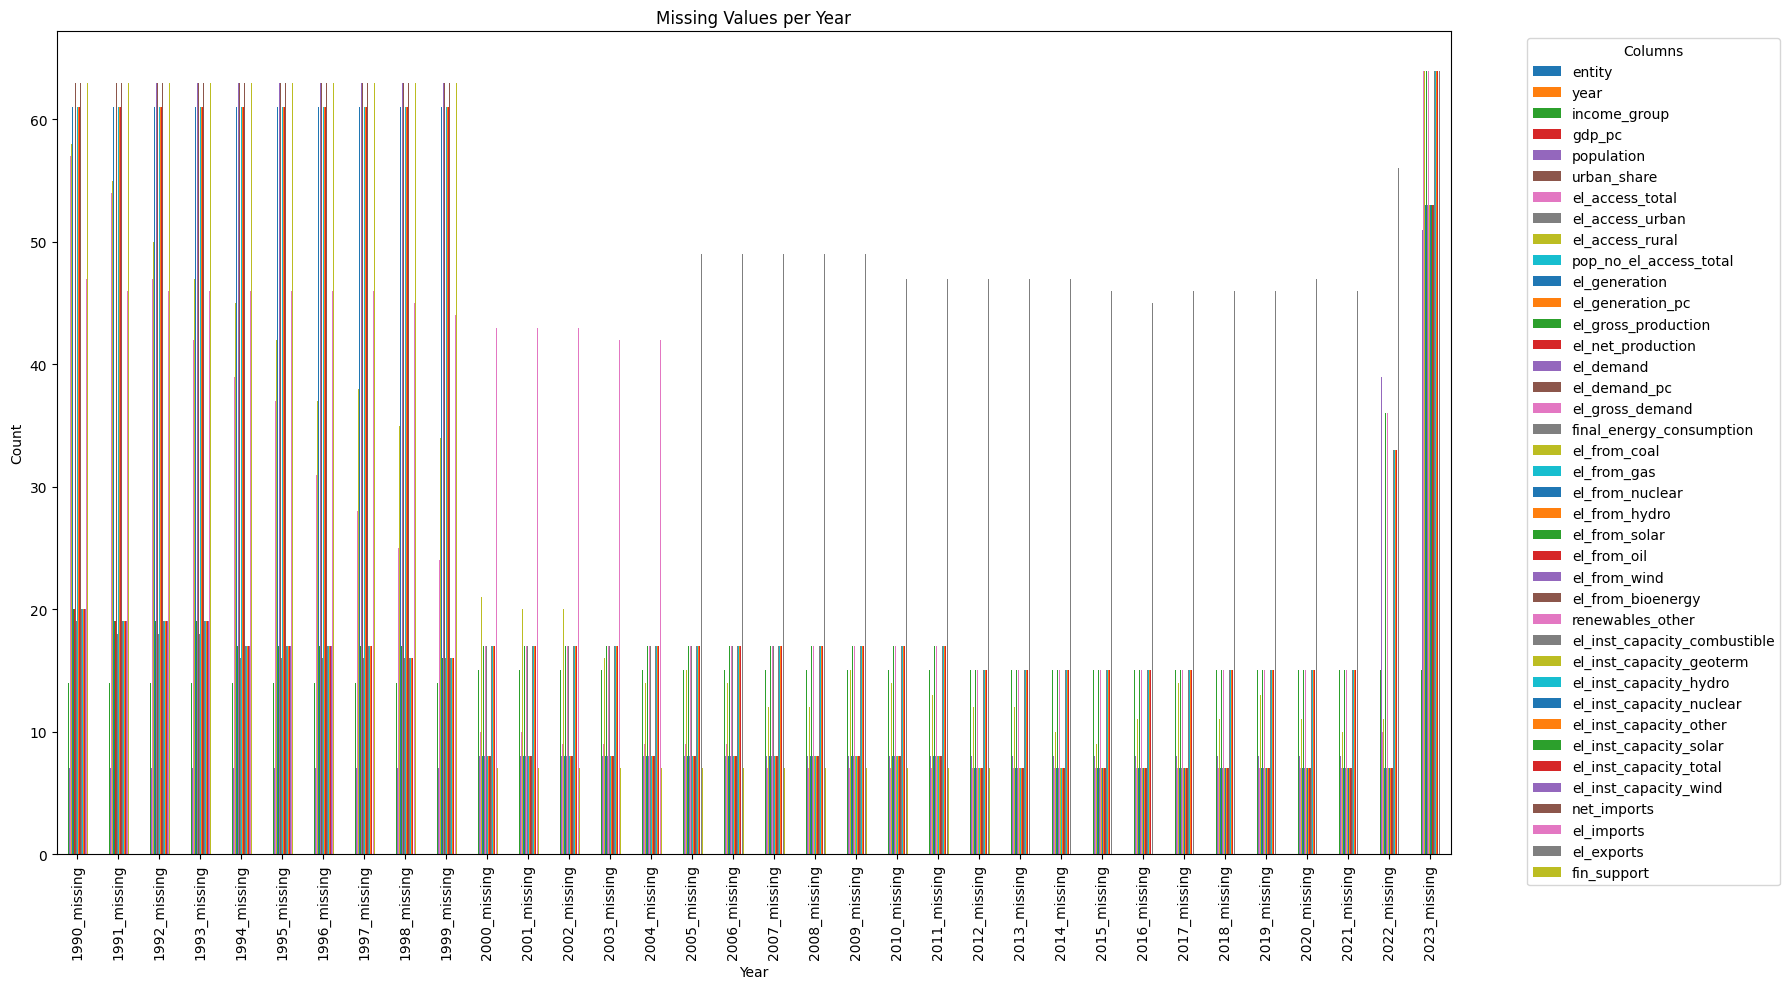

In [173]:
missing_values_per_year.plot(kind='bar', figsize=(18, 10))

plt.title('Missing Values per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [174]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   entity                        2166 non-null   object 
 1   year                          2166 non-null   int64  
 2   income_group                  1666 non-null   object 
 3   gdp_pc                        1798 non-null   float32
 4   population                    1830 non-null   float32
 5   urban_share                   1889 non-null   float32
 6   el_access_total               1538 non-null   float32
 7   el_access_urban               1558 non-null   float32
 8   el_access_rural               1351 non-null   float32
 9   pop_no_el_access_total        1441 non-null   float32
 10  el_generation                 1330 non-null   float32
 11  el_generation_pc              1360 non-null   float32
 12  el_gross_production           1534 non-null   float32
 13  el_

### download

In [175]:
#download df_all
from google.colab import files
#to csv
df_all.to_csv('df_all.csv',index=False)
files.download('df_all.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2.Regions - df_reg

Splitting countries into regions is inconsistent across the datasets.
In many datasets provided by the UN and other organizations there are only 6 regions, they mostly correspond to continents.

In [176]:
regions_un_=['Africa ()',
 'Asia ()',
 'Europe ()',
 'North America ()',
 'Oceania ()',
 'Latin America and Caribbean ()']

In the Ember datasets all countries are split into regions corresponding not only to continents, but also to some political or economical structures('G20', 'G7' and others), but we take only 7 most close to basic regions:

In [177]:
regions_ember = ['Africa (Ember)',
 'Asia (Ember)',
 'Europe (Ember)',
 'Latin America and Caribbean (Ember)',
 'Middle East (Ember)',
 'North America (Ember)',
 'Oceania (Ember)']

In the World Bank datasets 7 regions are present, among which there is Sub-Saharan Afica we are most interested in.

In [178]:
regions_wb=['Latin America and Caribbean (WB)',
 'South Asia (WB)',
 'Sub-Saharan Africa (WB)',
 'Europe and Central Asia (WB)',
 'Middle East and North Africa (WB)',
 'East Asia and Pacific (WB)',
 'North America (WB)']

In WB regional splitting only 'North America' corresponds to other versions, while other regions are special.

**So, we mark with WB regions with '(WB)'. In all other cases regions and World are marked with ()**.

In [179]:
#take rows with '(' in entity
df_reg=df_all[df_all['entity'].str.contains('\(')]
df_reg


entity  year income_group        gdp_pc    population  urban_share  \
0     Africa ()  1990          NaN           NaN  6.381572e+08          NaN   
1     Africa ()  1991          NaN           NaN  6.550405e+08          NaN   
2     Africa ()  1992          NaN           NaN  6.719315e+08          NaN   
3     Africa ()  1993          NaN           NaN  6.891400e+08          NaN   
4     Africa ()  1994          NaN           NaN  7.064883e+08          NaN   
...         ...   ...          ...           ...           ...          ...   
2093   World ()  2019          NaN  11338.150391  7.764951e+09    55.627911   
2094   World ()  2020          NaN  10904.147461  7.840953e+09    56.061752   
2095   World ()  2021          NaN  12316.102539  7.909295e+09    56.476513   
2096   World ()  2022          NaN  12687.742188           NaN    56.899078   
2097   World ()  2023          NaN           NaN           NaN          NaN   

      el_access_total  el_access_urban  el_access_rural  \
0                 NaN              NaN              NaN   
1                 NaN              NaN              NaN   
2                 NaN              NaN              NaN   
3                 NaN              NaN              NaN   
4                 NaN              NaN              NaN   
...               ...              ...              ...   
2093        90.193565        97.320755        82.746170   
2094        90.482704        97.302055        82.956970   
2095        91.414093        97.669373        84.475510   
2096        91.349998        97.661964        83.969795   
2097              NaN              NaN              NaN   

      pop_no_el_access_total  ...  el_inst_capacity_hydro  \
0                        NaN  ...                     NaN   
1                        NaN  ...                     NaN   
2                        NaN  ...                     NaN   
3                        NaN  ...                     NaN   
4                        NaN  ...                     NaN   
...                      ...  ...                     ...   
2093             760886592.0  ...                     NaN   
2094             741852864.0  ...                     NaN   
2095             675108288.0  ...                     NaN   
2096             685228480.0  ...                     NaN   
2097                     NaN  ...                     NaN   

      el_inst_capacity_nuclear  el_inst_capacity_other  \
0                          NaN                     NaN   
1                          NaN                     NaN   
2                          NaN                     NaN   
3                          NaN                     NaN   
4                          NaN                     NaN   
...                        ...                     ...   
2093                       NaN                     NaN   
2094                       NaN                     NaN   
2095                       NaN                     NaN   
2096                       NaN                     NaN   
2097                       NaN                     NaN   

      el_inst_capacity_solar  el_inst_capacity_total  el_inst_capacity_wind  \
0                        NaN                     NaN                    NaN   
1                        NaN                     NaN                    NaN   
2                        NaN                     NaN                    NaN   
3                        NaN                     NaN                    NaN   
4                        NaN                     NaN                    NaN   
...                      ...                     ...                    ...   
2093                     NaN                     NaN                    NaN   
2094                     NaN                     NaN                    NaN   
2095                     NaN                     NaN                    NaN   
2096                     NaN                     NaN                    NaN   
2097                     NaN                     NaN

In [180]:
df_reg.entity.unique()

array(['Africa ()', 'Asia ()', 'East Asia and Pacific (WB)', 'Europe ()',
       'Europe and Central Asia (WB)', 'Latin America and Caribbean ()',
       'Latin America and Caribbean (WB)', 'Middle East ()',
       'Middle East and North Africa (WB)', 'North America ()',
       'North America (WB)', 'Oceania ()', 'South Asia (WB)',
       'Sub-Saharan Africa (WB)', 'World ()'], dtype=object)

In [181]:
#group by entity, count values
df_reg.groupby('entity')['year'].count()

entity
Africa ()                            34
Asia ()                              34
East Asia and Pacific (WB)           34
Europe ()                            34
Europe and Central Asia (WB)         34
Latin America and Caribbean ()       34
Latin America and Caribbean (WB)     34
Middle East ()                       24
Middle East and North Africa (WB)    34
North America ()                     34
North America (WB)                   34
Oceania ()                           34
South Asia (WB)                      34
Sub-Saharan Africa (WB)              34
World ()                             34
Name: year, dtype: int64

In [182]:
#group by entity, count values in all other cols per column

df_reg.groupby('entity').count()

year  income_group  gdp_pc  population  \
entity                                                                      
Africa ()                            34             0       0          32   
Asia ()                              34             0       0          32   
East Asia and Pacific (WB)           34             0      33           0   
Europe ()                            34             0       0          32   
Europe and Central Asia (WB)         34             0      33           0   
Latin America and Caribbean ()       34             0       0          32   
Latin America and Caribbean (WB)     34             0      33           0   
Middle East ()                       24             0       0           0   
Middle East and North Africa (WB)    34             0      33           0   
North America ()                     34             0       0          32   
North America (WB)                   34             0      33           0   
Oceania ()                           34             0       0          32   
South Asia (WB)                      34             0      33           0   
Sub-Saharan Africa (WB)              34             0      33           0   
World ()                             34             0      33          32   

                                   urban_share  el_access_total  \
entity                                                            
Africa ()                                    0                0   
Asia ()                                      0                0   
East Asia and Pacific (WB)                  33               22   
Europe ()                                    0                0   
Europe and Central Asia (WB)                33               32   
Latin America and Caribbean ()               0                0   
Latin America and Caribbean (WB)            33               31   
Middle East ()                               0                0   
Middle East and North Africa (WB)           33               23   
North America ()                             0                0   
North America (WB)                          33               32   
Oceania ()                                   0                1   
South Asia (WB)                             33               29   
Sub-Saharan Africa (WB)                     33               27   
World ()                                    33               25   

                                   el_access_urban  el_access_rural  \
entity                                                                
Africa ()                                        0                0   
Asia ()                                          0                0   
East Asia and Pacific (WB)                      22               22   
Europe ()                                        0                0   
Europe and Central Asia (WB)                    32               32   
Latin America and Caribbean ()                   0                0   
Latin America and Caribbean (WB)                31               31   
Middle East ()                                   0                0   
Middle East and North Africa (WB)               23               23   
North America ()                                 0                0   
North America (WB)                              32               32   
Oceania ()                                       1                1   
South Asia (WB)                                 29               29   
Sub-Saharan Africa (WB)                         27               23   
World ()                                        30               23   

                                   pop_no_el_access_total  el_generation  ...  \
entity                                                                    ...   
Africa ()                                               0             24  ...   
Asia ()                                                 0             24  ...   
East Asia and Pacific (WB)                           

Some indicators like income_group are not relevant to regions or the World. Some are present for both versions of regional splitting('WB' and '()'), other indicators are present either for WB ot for general () regions - that's why there are many missing values in df_reg.

In [183]:
df_reg.stb.missing(style=True)

In [184]:
#drop cols with 100% missing values
df_reg= df_reg.dropna(axis=1, how='all')
df_reg.info()



<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 2097
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   entity                  500 non-null    object 
 1   year                    500 non-null    int64  
 2   gdp_pc                  264 non-null    float32
 3   population              224 non-null    float32
 4   urban_share             264 non-null    float32
 5   el_access_total         222 non-null    float32
 6   el_access_urban         227 non-null    float32
 7   el_access_rural         216 non-null    float32
 8   pop_no_el_access_total  181 non-null    float32
 9   el_generation           202 non-null    float32
 10  el_generation_pc        232 non-null    float32
 11  el_demand               192 non-null    float32
 12  el_demand_pc            192 non-null    float32
 13  el_from_coal            202 non-null    float32
 14  el_from_gas             202 non-null    float3

**???** Regions should not be taken to modeling because of inconsistency and large number of missing values.

## Plotting

In [185]:
def plot_all_indicators(data, indicators, x='year', hue='entity'):
    """
    Plots line plots for each indicator in the data.

    Parameters:
    data (DataFrame): The input DataFrame.
    indicators (list): A list of column names to plot.
    x (str): The column to use for the x-axis (default is 'year').
    hue (str): The column to use for coloring the lines (default is 'entity').

    Returns:
    None
    """
    for indicator in indicators:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=x, y=indicator, hue=hue, data=data)
        plt.title(f'{indicator} over {x}')
        plt.xlabel(x)
        plt.ylabel(indicator)
        plt.legend(loc='best')
        plt.show()

# Define the columns to plot
indicators = ['el_access_urban', 'el_access_rural', 'gdp_pc',
              'urban_share', 'el_access_total',
               'population',
              'el_generation', 'el_generation_pc',
              'el_from_coal', 'el_from_gas',
              'el_from_nuclear', 'el_from_hydro',
              'el_from_solar', 'el_from_oil',
              'el_from_wind', 'el_from_bioenergy',
              'renewables_other', 'net_imports',
              'el_demand', 'pop_no_el_access_total',
              'el_demand_pc', 'fin_support']



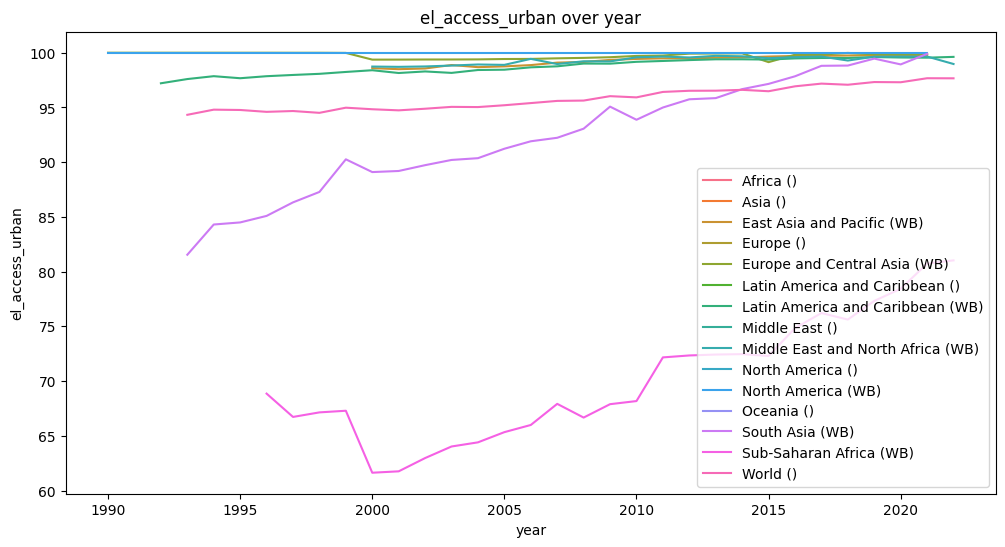

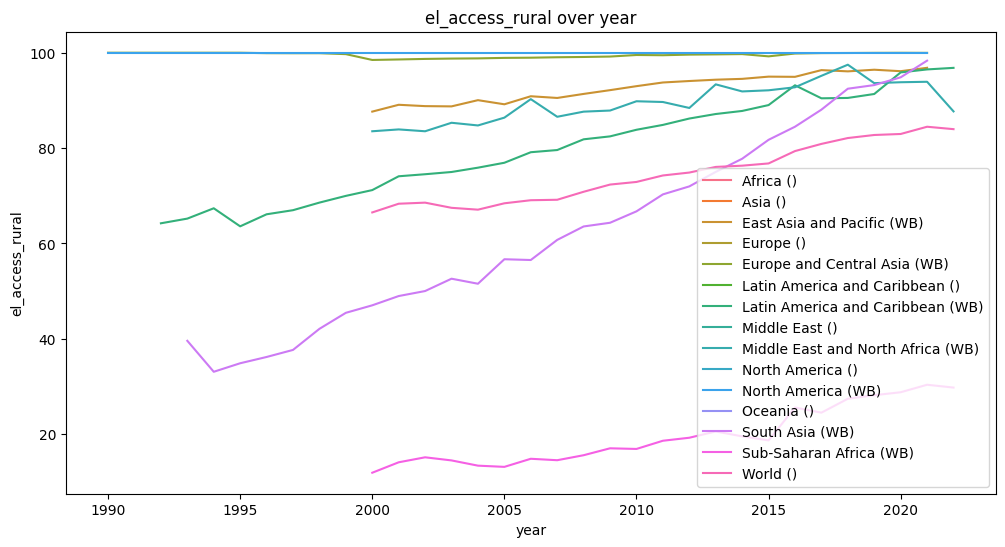

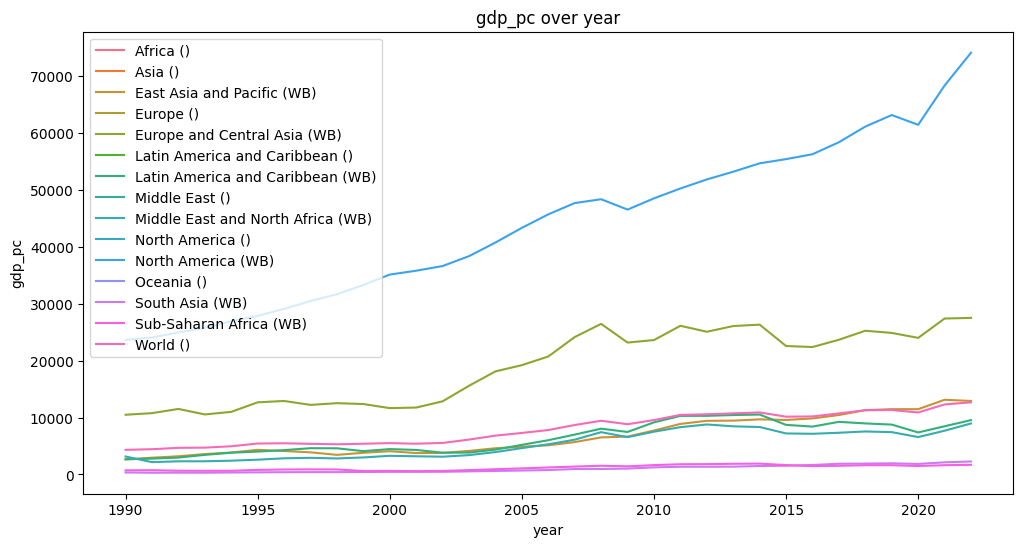

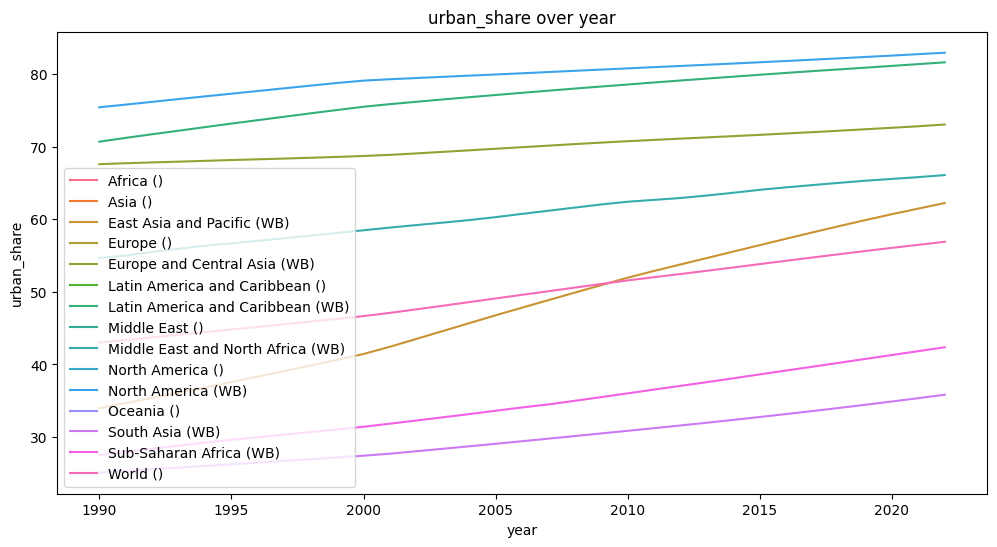

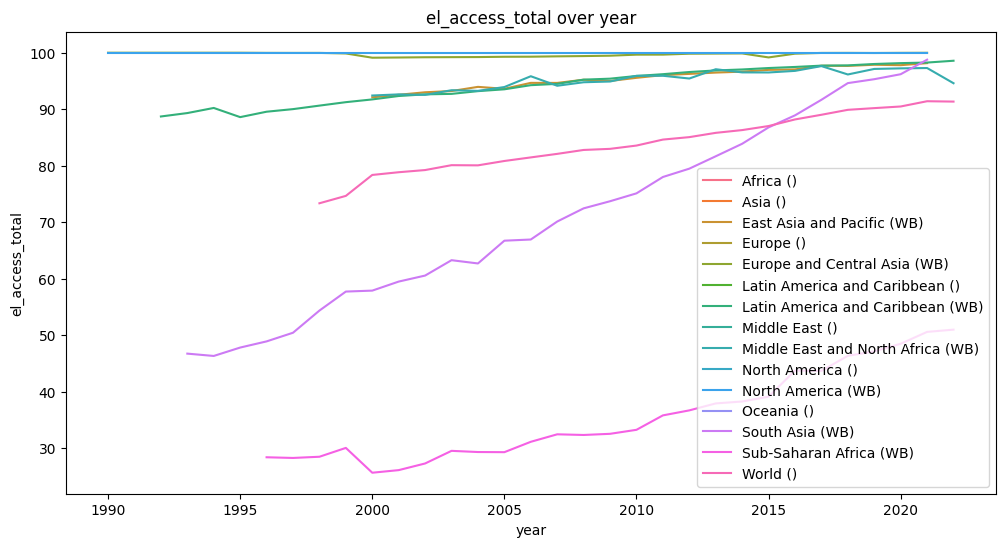

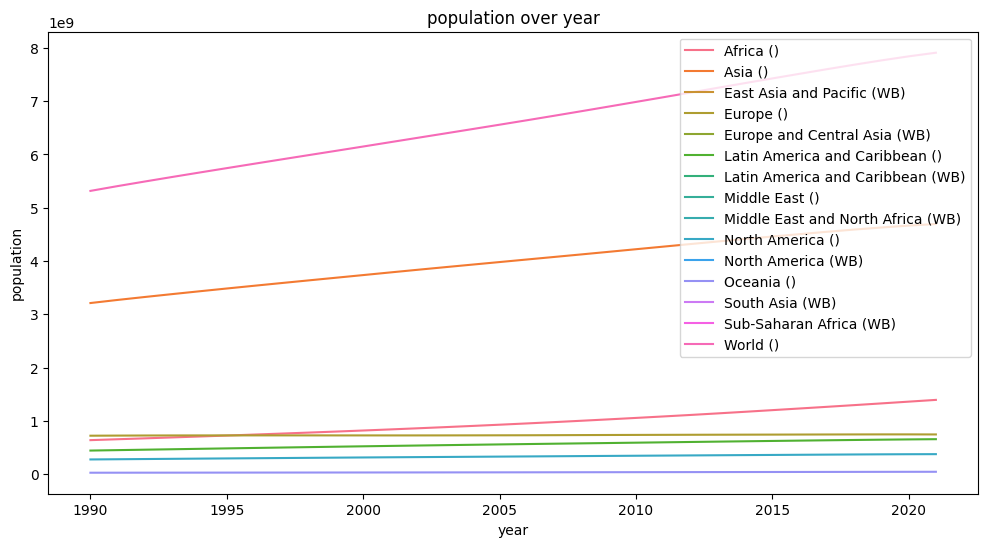

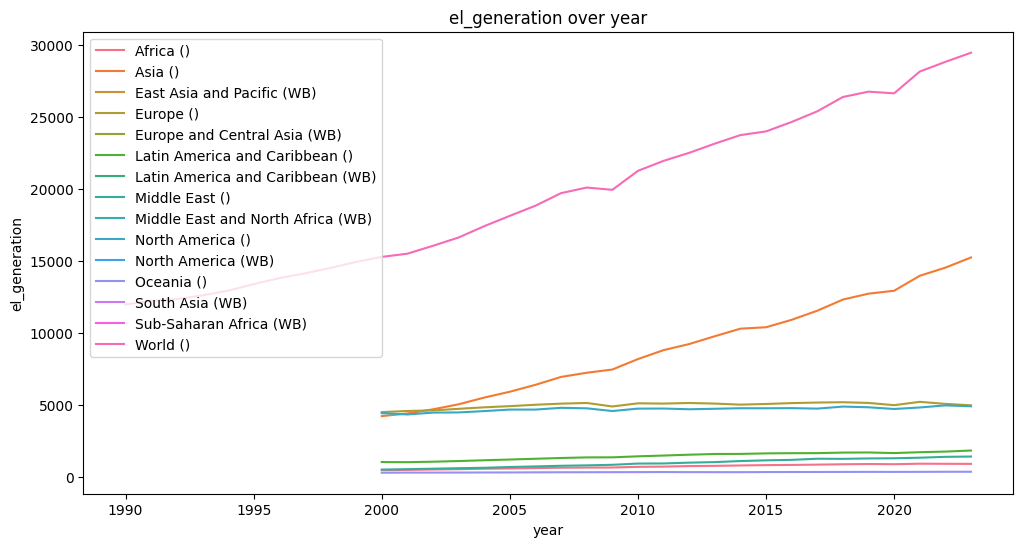

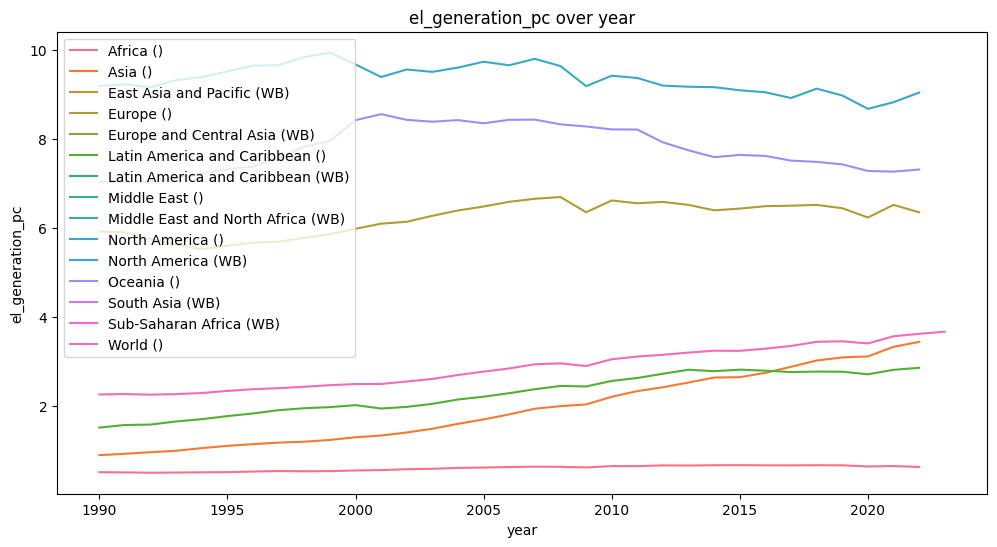

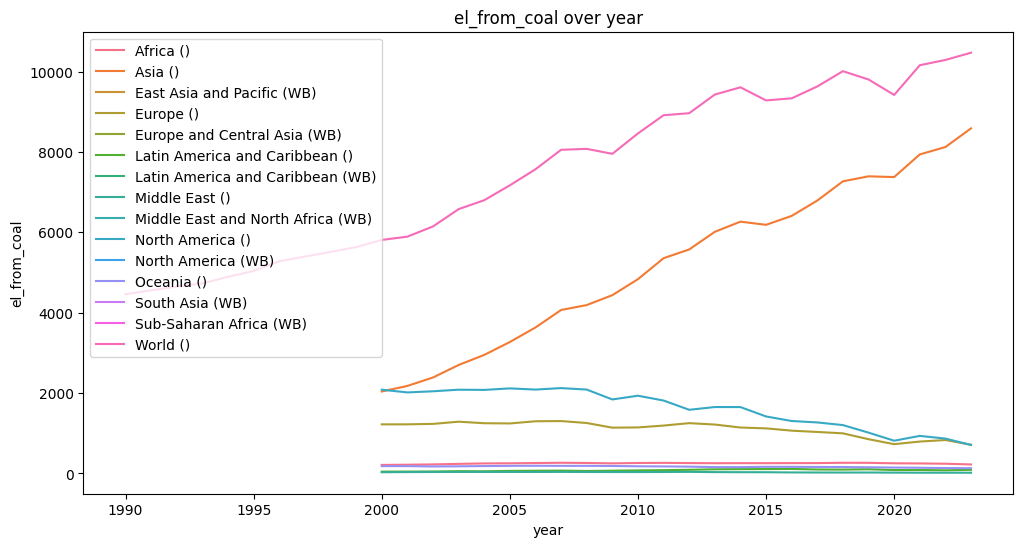

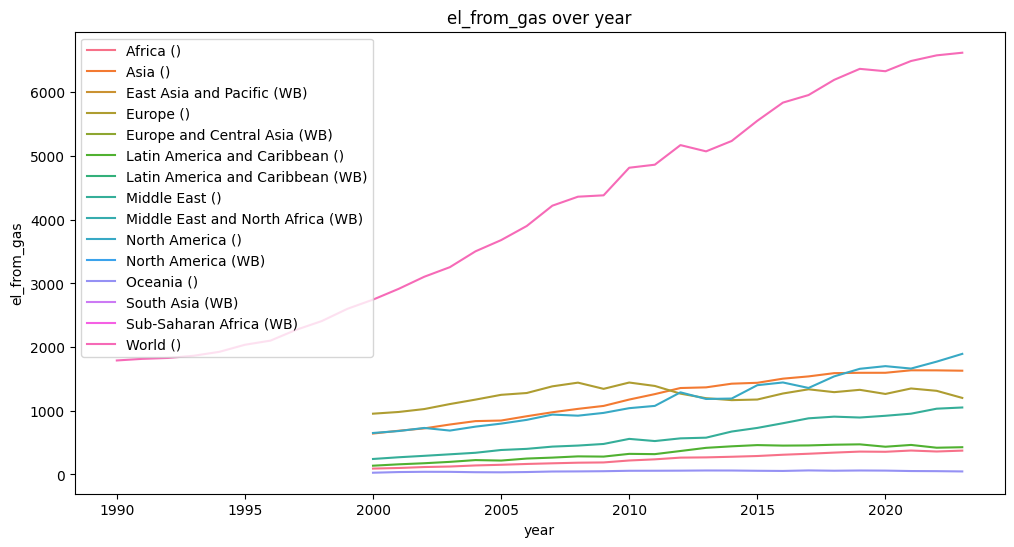

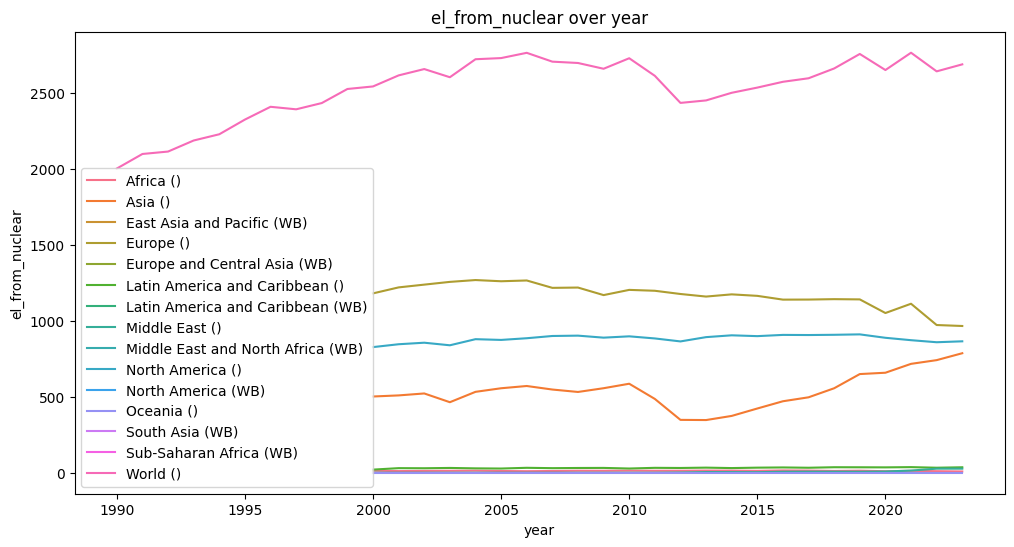

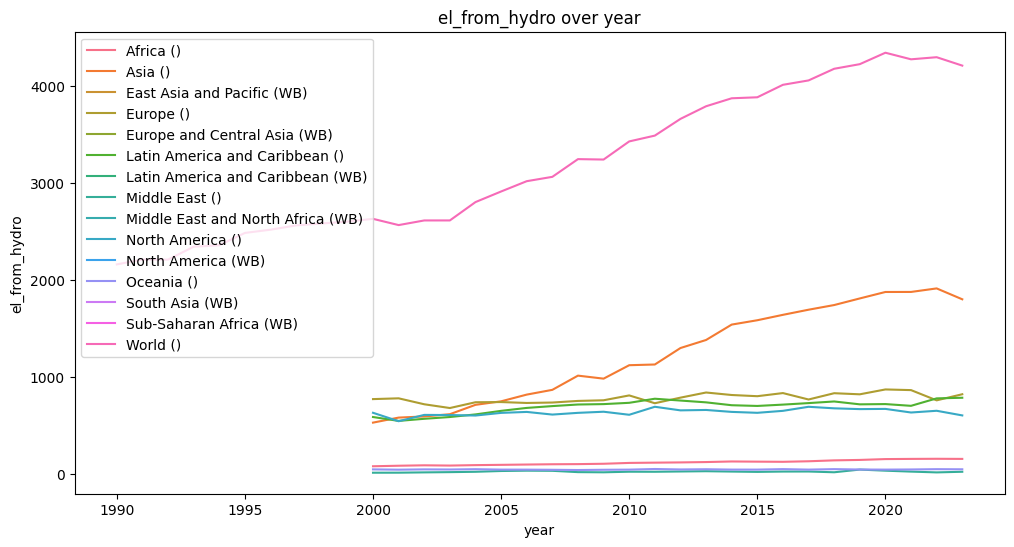

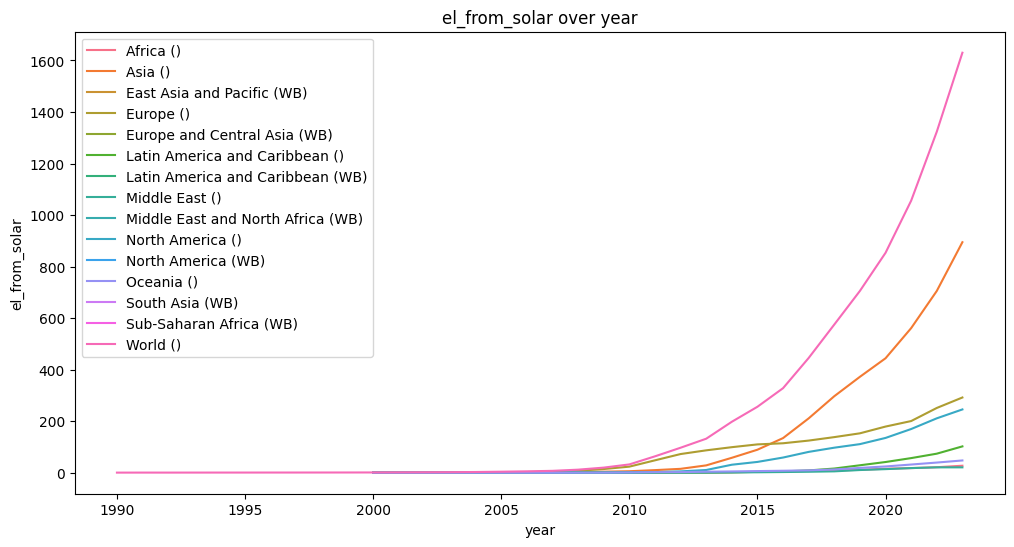

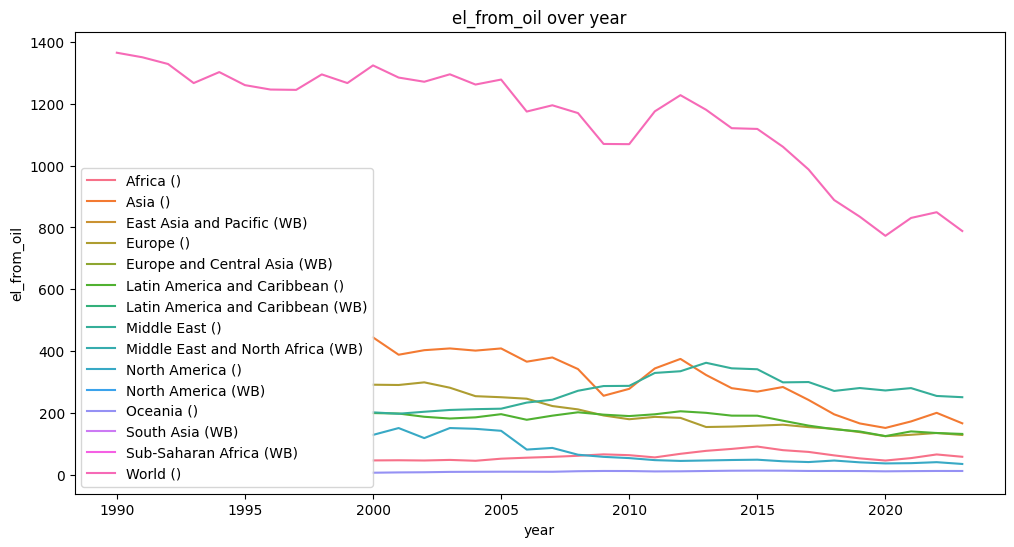

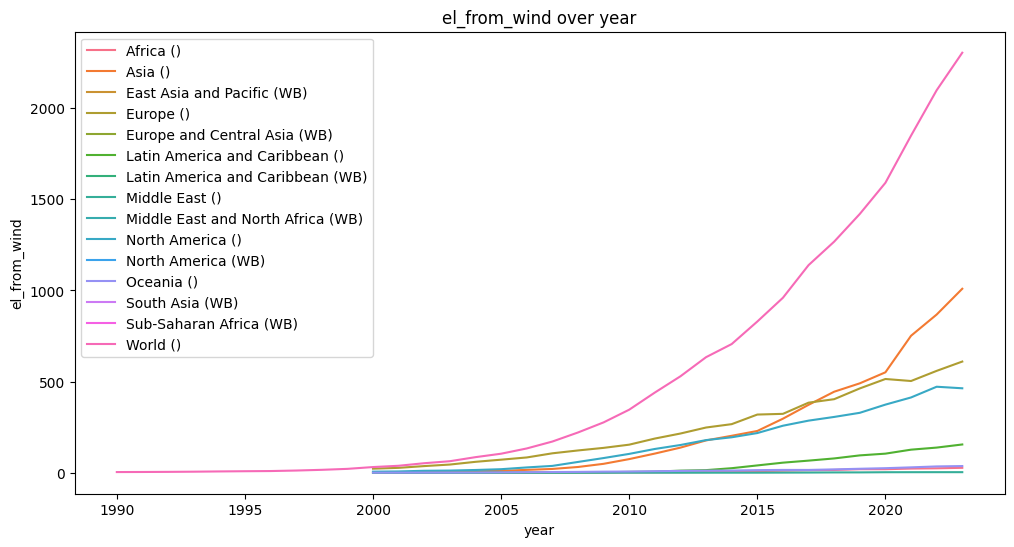

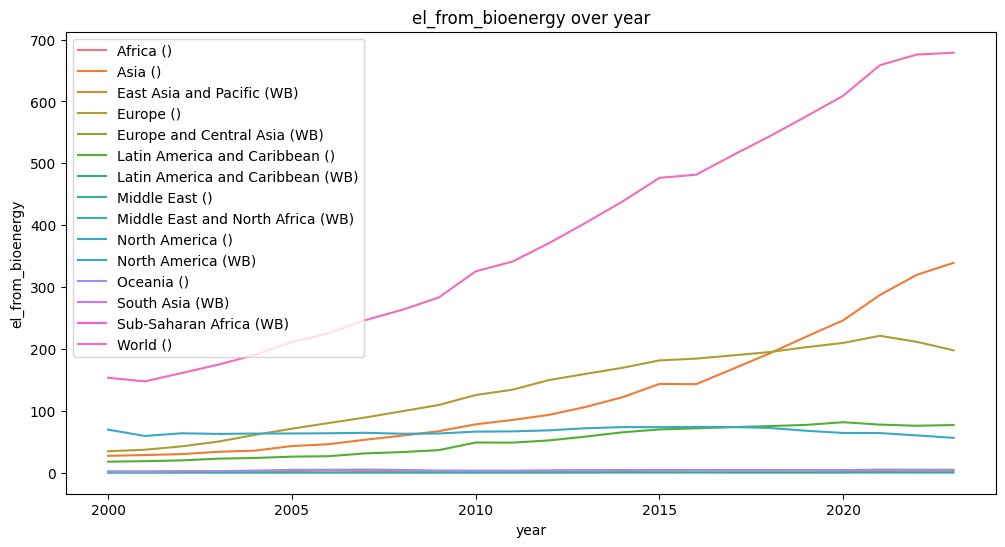

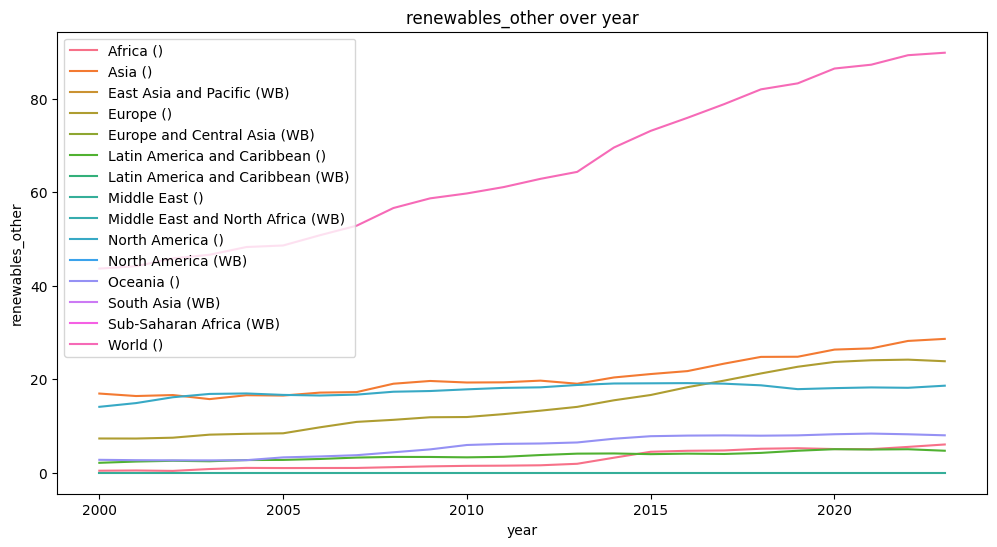

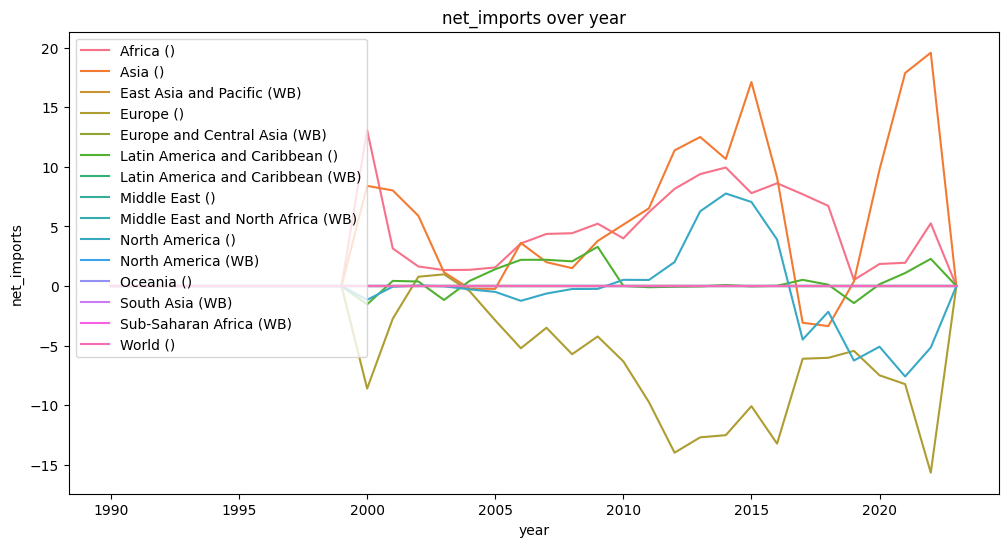

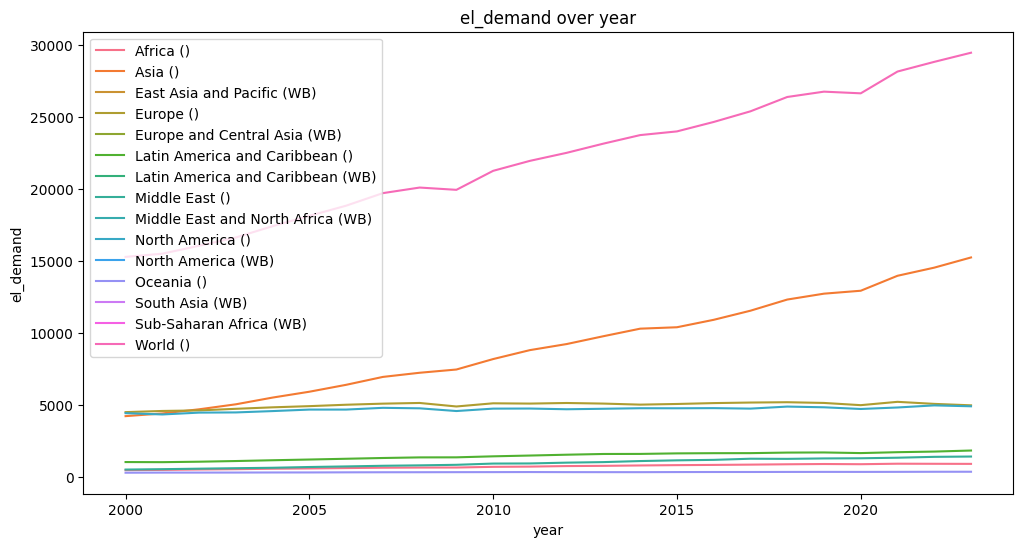

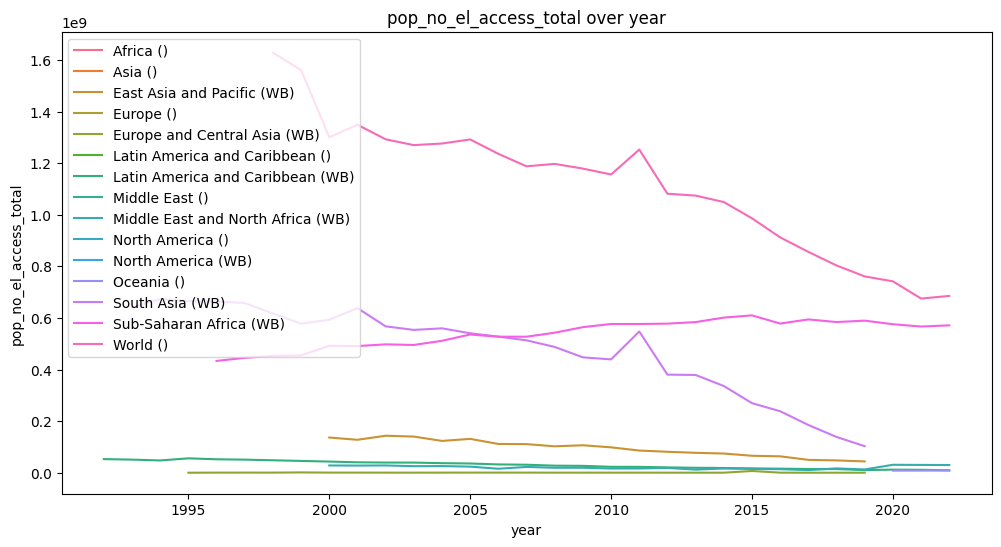

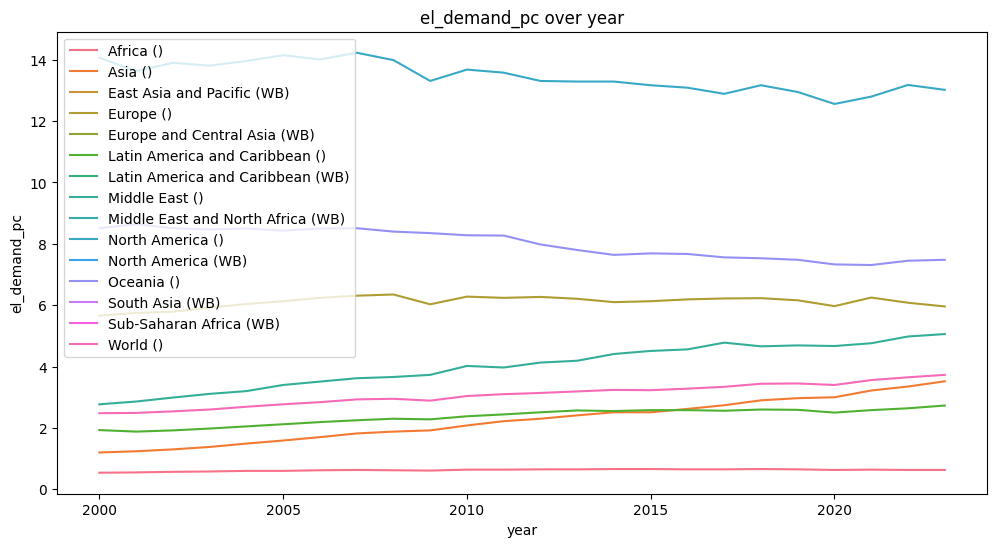

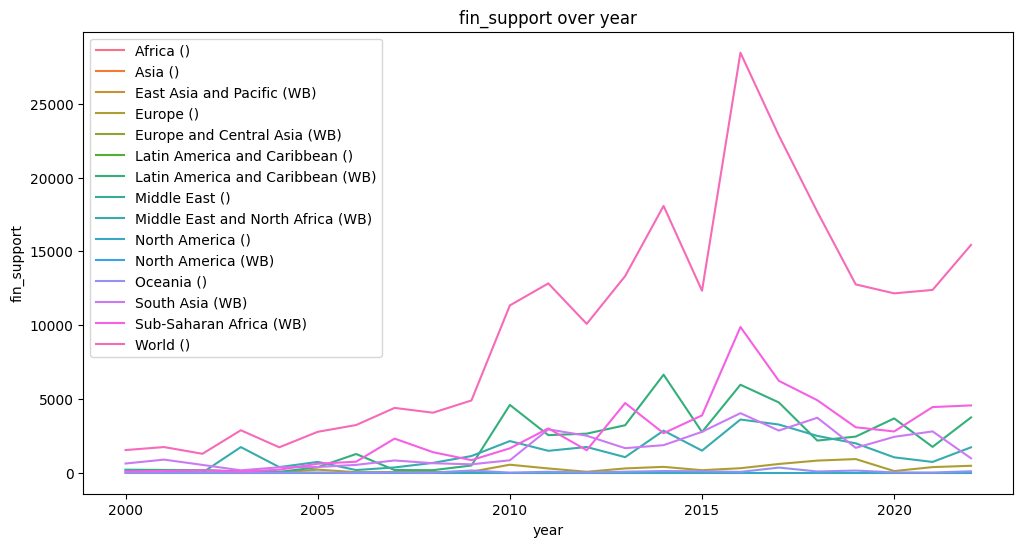

In [186]:
# Call the function with your DataFrame and the list of indicators
plot_all_indicators(df_reg, indicators)

In [187]:

#to csv
df_reg.to_csv('df_reg.csv',index=False)

In [188]:
#download
from google.colab import files
files.download('df_reg.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#3.SSA countries - df_ssa

##3.1 1990-2023

In [189]:
countries_ssa = ['Angola', 'Burundi', 'Benin', 'Burkina Faso', 'Botswana',
       'Central African Republic', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Comoros', 'Cabo Verde',
       'Djibouti','Eritrea', 'Ethiopia', 'Gabon', 'Ghana', 'Guinea', 'Gambia, The',
       'Guinea-Bissau', 'Equatorial Guinea', 'Kenya', 'Liberia',
       'Lesotho', 'Madagascar', 'Mali', 'Mozambique', 'Mauritania',
       'Mauritius', 'Malawi', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sudan', 'Senegal', 'Sierra Leone', 'Somalia', 'South Sudan',
       'Sao Tome and Principe', 'Eswatini', 'Seychelles', 'Chad', 'Togo',
       'Tanzania', 'Uganda', 'South Africa', 'Zambia', 'Zimbabwe']

In [190]:
#take from df rows for entities in countries_ssa
df_ssa=df_all[df_all['entity'].isin(countries_ssa)]
df_ssa

entity  year         income_group       gdp_pc  population  \
34      Angola  1990  Lower middle income   949.921326  11828643.0   
35      Angola  1991  Lower middle income   850.556152  12228698.0   
36      Angola  1992  Lower middle income   657.654663  12632509.0   
37      Angola  1993  Lower middle income   466.679169  13038277.0   
38      Angola  1994  Lower middle income   329.691772  13462032.0   
...        ...   ...                  ...          ...         ...   
2161  Zimbabwe  2019  Lower middle income  1421.868652  15354606.0   
2162  Zimbabwe  2020  Lower middle income  1372.696655  15669663.0   
2163  Zimbabwe  2021  Lower middle income  1773.920410  15993525.0   
2164  Zimbabwe  2022  Lower middle income  1676.821533  15178957.0   
2165  Zimbabwe  2023  Lower middle income          NaN  15406641.0   

      urban_share  el_access_total  el_access_urban  el_access_rural  \
34      37.144001              NaN              NaN              NaN   
35      38.580002              NaN              NaN              NaN   
36      40.039001              NaN              NaN              NaN   
37      41.511002              NaN              NaN              NaN   
38      43.000000              NaN              NaN              NaN   
...           ...              ...              ...              ...   
2161    32.209999        46.682095        85.401184        28.284960   
2162    32.242001        52.747669        85.715477        37.060249   
2163    32.303001        48.979927        85.328506        31.635464   
2164    32.395000        50.299999        89.000000        33.700001   
2165    38.573792              NaN              NaN              NaN   

      pop_no_el_access_total  ...  el_inst_capacity_hydro  \
34                       NaN  ...               412.00000   
35                       NaN  ...               412.00000   
36                       NaN  ...               412.00000   
37                       NaN  ...               412.00000   
38                       NaN  ...               412.00000   
...                      ...  ...                     ...   
2161               8627778.0  ...              1080.02002   
2162               7404282.0  ...              1080.02002   
2163               8159907.0  ...              1080.02002   
2164               8111306.0  ...                     NaN   
2165                     NaN  ...                     NaN   

      el_inst_capacity_nuclear  el_inst_capacity_other  \
34                         0.0                     0.0   
35                         0.0                     0.0   
36                         0.0                     0.0   
37                         0.0                     0.0   
38                         0.0                     0.0   
...                        ...                     ...   
2161                       0.0                     0.0   
2162                       0.0                     0.0   
2163                       0.0                     0.0   
2164                       NaN                     NaN   
2165                       NaN                     NaN   

      el_inst_capacity_solar  el_inst_capacity_total  el_inst_capacity_wind  \
34                  0.000000              462.000000                    0.0   
35                  0.000000              462.000000                    0.0   
36                  0.000000              462.000000                    0.0   
37                  0.000000              462.000000                    0.0   
38                  0.000000              462.000000                    0.0   
...                      ...                     ...                    ...   
2161               11.830000             2356.850098                    0.0   
2162               14.070000             2359.090088                    0.0   
2163               27.940001             2372.959961                    0.0   
2164                     NaN                     NaN                    NaN   
216

In [191]:
df_ssa.columns

Index(['entity', 'year', 'income_group', 'gdp_pc', 'population', 'urban_share',
       'el_access_total', 'el_access_urban', 'el_access_rural',
       'pop_no_el_access_total', 'el_generation', 'el_generation_pc',
       'el_gross_production', 'el_net_production', 'el_demand', 'el_demand_pc',
       'el_gross_demand', 'final_energy_consumption', 'el_from_coal',
       'el_from_gas', 'el_from_nuclear', 'el_from_hydro', 'el_from_solar',
       'el_from_oil', 'el_from_wind', 'el_from_bioenergy', 'renewables_other',
       'el_inst_capacity_combustible', 'el_inst_capacity_geoterm',
       'el_inst_capacity_hydro', 'el_inst_capacity_nuclear',
       'el_inst_capacity_other', 'el_inst_capacity_solar',
       'el_inst_capacity_total', 'el_inst_capacity_wind', 'net_imports',
       'el_imports', 'el_exports', 'fin_support'],
      dtype='object')

In [192]:
df_ssa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1666 entries, 34 to 2165
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   entity                        1666 non-null   object 
 1   year                          1666 non-null   int64  
 2   income_group                  1666 non-null   object 
 3   gdp_pc                        1534 non-null   float32
 4   population                    1606 non-null   float32
 5   urban_share                   1625 non-null   float32
 6   el_access_total               1316 non-null   float32
 7   el_access_urban               1331 non-null   float32
 8   el_access_rural               1135 non-null   float32
 9   pop_no_el_access_total        1260 non-null   float32
 10  el_generation                 1128 non-null   float32
 11  el_generation_pc              1128 non-null   float32
 12  el_gross_production           1534 non-null   float32
 13  el_net_

In [193]:
df_ssa.to_csv('df_ssa.csv',index=False)

In [194]:
files.download('df_ssa.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 3.2 Subset 2000-2022 - ssa_00_22

Let's take only data for 2000 - 2022 in dff_ssa and store in filtered dff

In [195]:
#take rows for 2000-2022
ssa_00_22=df_ssa[df_ssa['year'].between(2000,2022)].reset_index(drop=True)
ssa_00_22

entity  year         income_group       gdp_pc  population  \
0       Angola  2000  Lower middle income   556.884216  16394067.0   
1       Angola  2001  Lower middle income   527.464111  16941584.0   
2       Angola  2002  Lower middle income   872.657654  17516140.0   
3       Angola  2003  Lower middle income   982.805603  18124346.0   
4       Angola  2004  Lower middle income  1254.696167  18771128.0   
...        ...   ...                  ...          ...         ...   
1122  Zimbabwe  2018  Lower middle income  2269.177002  15052191.0   
1123  Zimbabwe  2019  Lower middle income  1421.868652  15354606.0   
1124  Zimbabwe  2020  Lower middle income  1372.696655  15669663.0   
1125  Zimbabwe  2021  Lower middle income  1773.920410  15993525.0   
1126  Zimbabwe  2022  Lower middle income  1676.821533  15178957.0   

      urban_share  el_access_total  el_access_urban  el_access_rural  \
0       50.087002        24.238865        44.931599         3.473994   
1       51.273998        20.000000        30.000000         9.477077   
2       52.460999        26.320255        47.670353         2.759651   
3       53.645000        27.355137        49.043541         2.255916   
4       54.827000        28.395485        50.428509         1.653744   
...           ...              ...              ...              ...   
1122    32.209000        45.400288        85.434525        26.379137   
1123    32.209999        46.682095        85.401184        28.284960   
1124    32.242001        52.747669        85.715477        37.060249   
1125    32.303001        48.979927        85.328506        31.635464   
1126    32.395000        50.299999        89.000000        33.700001   

      pop_no_el_access_total  ...  el_inst_capacity_hydro  \
0                        NaN  ...               390.00000   
1                 13556602.0  ...               390.00000   
2                 12897117.0  ...               390.00000   
3                 13144298.0  ...               390.00000   
4                 13405173.0  ...               498.00000   
...                      ...  ...                     ...   
1122               8574292.0  ...              1050.00000   
1123               8627778.0  ...              1080.02002   
1124               7404282.0  ...              1080.02002   
1125               8159907.0  ...              1080.02002   
1126               8111306.0  ...                     NaN   

      el_inst_capacity_nuclear  el_inst_capacity_other  \
0                          0.0                     0.0   
1                          0.0                     0.0   
2                          0.0                     0.0   
3                          0.0                     0.0   
4                          0.0                     0.0   
...                        ...                     ...   
1122                       0.0                     0.0   
1123                       0.0                     0.0   
1124                       0.0                     0.0   
1125                       0.0                     0.0   
1126                       NaN                     NaN   

      el_inst_capacity_solar  el_inst_capacity_total  el_inst_capacity_wind  \
0                   0.000000              500.000000                    0.0   
1                   0.000000              500.000000                    0.0   
2                   0.000000              500.000000                    0.0   
3                   0.000000              500.000000                    0.0   
4                   0.000000              624.000000                    0.0   
...                      ...                     ...                    ...   
1122                8.560000             2323.560059                    0.0   
1123               11.830000             2356.850098                    0.0   
1124               14.070000             2359.090088                    0.0   
1125               27.940001             2372.959961                    0.0   
112

In [196]:
ssa_00_22.describe()

year        gdp_pc   population  urban_share  el_access_total  \
count  1127.000000   1087.000000       1103.0  1127.000000      1111.000000   
mean   2011.000000   2041.498657   18820360.0    40.582653        39.745453   
std       6.636194   2888.338379   29226120.0    17.215847        25.989088   
min    2000.000000    110.460876      80073.0     8.246000         0.796383   
25%    2005.000000    514.876465    2173025.5    27.928500        16.600000   
50%    2011.000000    888.781067   10467294.0    39.325001        36.900002   
75%    2017.000000   1985.589478   21252280.0    51.587000        56.500000   
max    2022.000000  19849.716797  216783376.0    90.735001       100.000000   

       el_access_urban  el_access_rural  pop_no_el_access_total  \
count      1120.000000       981.000000                  1058.0   
mean         65.200127        24.829966              11942904.0   
std          23.442846        25.921276              16396960.0   
min           3.500000         0.000000                   846.0   
25%          49.224274         4.903049               1346964.5   
50%          68.356461        16.780775               7783171.5   
75%          85.000000        33.700001              13559846.0   
max         100.000000       100.000000              92914024.0   

       el_generation  el_generation_pc  ...  el_inst_capacity_hydro  \
count    1115.000000       1115.000000  ...             1085.000000   
mean        8.513838          0.459746  ...              478.001373   
std        35.070442          0.917318  ...              793.277954   
min         0.020000          0.004993  ...                0.000000   
25%         0.290000          0.058483  ...                0.000000   
50%         1.030000          0.139701  ...               66.599998   
75%         5.070000          0.429899  ...              585.000000   
max       263.489990          5.787091  ...             4071.280029   

       el_inst_capacity_nuclear  el_inst_capacity_other  \
count               1085.000000             1085.000000   
mean                  38.007374                0.464046   
std                  264.382111                5.079727   
min                    0.000000                0.000000   
25%                    0.000000                0.000000   
50%                    0.000000                0.000000   
75%                    0.000000                0.000000   
max                 1940.000000               75.000000   

       el_inst_capacity_solar  el_inst_capacity_total  el_inst_capacity_wind  \
count             1085.000000             1085.000000            1085.000000   
mean                24.476362             1876.925537              23.683828   
std                192.638794             6829.761230             207.826187   
min                  0.000000                6.000000               0.000000   
25%                  0.000000              101.279999               0.000000   
50%                  0.120000              330.290009               0.000000   
75%                  5.000000             1207.000000               0.000000   
max               2959.000000            61961.500000            3195.500000   

       net_imports  el_imports  el_exports  fin_support  
count  1127.000000  568.000000  358.000000  1127.000000  
mean      0.056894    1.187835    1.790093    49.240753  
std       1.057122    2.357132    3.925630   216.436340  
min      -6.630000    0.000000    0.000000     0.000000  
25%       0.000000    0.078975    0.019925     0.000000  
50%       0.000000    0.314897    0.194500     0.220000  
75%       0.170000    0.941775    0.985250    16.220000  
max      12.330000   12.295000   16.139999  4951.879883  

[8 rows x 37 columns]

In [197]:
#to scv
ssa_00_22.to_csv('ssa_00_22.csv',index=False)

In [198]:
#download
from google.colab import files
files.download('ssa_00_22.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##3.3 Which indicators to take from ssa_00_22? - dff

### 3.3.1 Compare similar indicators

We have several similar indicators:

In [199]:
similar_col = ['el_gross_production', 'el_net_production',  'el_gross_demand', 'el_generation', 'el_demand','net_imports']
similar=ssa_00_22[['entity',	'year'] + similar_col]
similar.head(2)

entity  year  el_gross_production  el_net_production  el_gross_demand  \
0  Angola  2000                1.445              1.368            1.368   
1  Angola  2001                1.638              1.551            1.551   

   el_generation  el_demand  net_imports  
0           1.44       1.44          0.0  
1           1.64       1.64          0.0

In [200]:
# take rows for Nigeria from similar
similar_ng=similar[similar['entity']=='Nigeria']
similar_ng

entity  year  el_gross_production  el_net_production  el_gross_demand  \
782  Nigeria  2000            14.727000          14.306000        14.306000   
783  Nigeria  2001            15.462000          15.020000        15.020000   
784  Nigeria  2002            21.545000          20.929001        20.929001   
785  Nigeria  2003            20.184000          19.607000        19.607000   
786  Nigeria  2004            24.275000          23.580999        23.580999   
787  Nigeria  2005            23.539000          22.865999        22.865999   
788  Nigeria  2006            23.110001          22.448999        22.448999   
789  Nigeria  2007            22.978001          22.320999        22.320999   
790  Nigeria  2008            21.110001          20.506001        20.506001   
791  Nigeria  2009            19.777000          19.211000        19.211000   
792  Nigeria  2010            26.122999          25.372999        25.372999   
793  Nigeria  2011            27.035999          26.260000        26.260000   
794  Nigeria  2012            28.730000          27.905001        27.905001   
795  Nigeria  2013            28.930000          28.077999        28.077999   
796  Nigeria  2014            32.278000          31.330000        31.330000   
797  Nigeria  2015            33.145000          31.514000        31.514000   
798  Nigeria  2016            36.511002          35.462002        35.462002   
799  Nigeria  2017            32.221264          31.295172        31.295172   
800  Nigeria  2018            33.383499          32.424107        32.424107   
801  Nigeria  2019            33.110413          32.158844        32.158844   
802  Nigeria  2020            35.058918          34.051525        34.051525   
803  Nigeria  2021            36.037567          35.005043        35.005043   
804  Nigeria  2022                  NaN                NaN              NaN   

     el_generation  el_demand  net_imports  
782      14.740000  14.720000        -0.02  
783      15.470000  15.440000        -0.03  
784      21.549999  21.520000        -0.03  
785      20.200001  20.160000        -0.04  
786      24.290001  24.270000        -0.02  
787      23.549999  23.549999         0.00  
788      23.120001  23.120001         0.00  
789      22.990000  22.990000         0.00  
790      21.120001  21.120001         0.00  
791      19.790001  19.790001         0.00  
792      26.129999  26.129999         0.00  
793      27.040001  27.040001         0.00  
794      28.740000  28.740000         0.00  
795      28.930000  28.930000         0.00  
796      32.279999  32.279999         0.00  
797      33.169998  33.169998         0.00  
798      36.540001  36.540001         0.00  
799      32.240002  32.240002         0.00  
800      33.410000  33.410000         0.00  
801      33.119999  33.119999         0.00  
802      35.070000  35.070000         0.00  
803      36.060001  36.060001         0.00  
804      36.980000  36.980000         0.00

In [201]:
#take rows for Zimbabwe
similar_zw=similar[similar['entity']=='Zimbabwe']
similar_zw

entity  year  el_gross_production  el_net_production  el_gross_demand  \
1104  Zimbabwe  2000             7.061000           6.821000        11.916000   
1105  Zimbabwe  2001             7.939000           7.734000        11.800000   
1106  Zimbabwe  2002             8.602000           8.406000        12.416000   
1107  Zimbabwe  2003             8.814000           8.627000        11.812000   
1108  Zimbabwe  2004             9.719000           9.550000        11.590000   
1109  Zimbabwe  2005             9.374000           9.012000        11.989000   
1110  Zimbabwe  2006             7.974000           7.666000        11.565000   
1111  Zimbabwe  2007             7.609000           7.315000        10.242000   
1112  Zimbabwe  2008             7.625000           7.330000         8.445000   
1113  Zimbabwe  2009             7.291000           7.009000         8.286000   
1114  Zimbabwe  2010             8.602901           8.330000         9.061000   
1115  Zimbabwe  2011             9.177200           9.053000         9.643500   
1116  Zimbabwe  2012             9.148600           9.048000         9.423201   
1117  Zimbabwe  2013             9.497800           9.383000         9.915700   
1118  Zimbabwe  2014             9.811900           9.627900         9.528900   
1119  Zimbabwe  2015             9.522099           9.333099         9.232100   
1120  Zimbabwe  2016             7.089765           6.919765         8.770764   
1121  Zimbabwe  2017             7.551551           7.408245         9.626657   
1122  Zimbabwe  2018             9.369275           9.196463        10.213000   
1123  Zimbabwe  2019             8.402077           8.232618         9.341010   
1124  Zimbabwe  2020             6.673025           6.559294         8.541294   
1125  Zimbabwe  2021             8.454398           8.354077        10.098266   
1126  Zimbabwe  2022                  NaN                NaN              NaN   

      el_generation  el_demand  net_imports  
1104           6.99      12.08         5.09  
1105           7.90      11.97         4.07  
1106           8.58      12.59         4.01  
1107           8.79      11.97         3.18  
1108           9.72      11.76         2.04  
1109           9.36      12.34         2.98  
1110           7.98      11.88         3.90  
1111           7.60      10.53         2.93  
1112           7.63       8.75         1.12  
1113           7.29       8.57         1.28  
1114           8.64       9.37         0.73  
1115           9.17       9.77         0.60  
1116           9.15       9.70         0.55  
1117           9.54      10.07         0.53  
1118           9.86       9.76        -0.10  
1119           9.59       9.49        -0.10  
1120           7.17       9.02         1.85  
1121           7.55       9.77         2.22  
1122           9.44      10.46         1.02  
1123           8.49       9.60         1.11  
1124           6.71       8.69         1.98  
1125           8.46      10.20         1.74  
1126           8.93      10.69         1.76

### 3.3.2 Compare definitions: Demand /Generation/Production

**Our World in Data**
"Electricity demand, 2023 https://ourworldindata.org/grapher/electricity-demand:

Electricity demand(= our **'el_demand'**) is measured in terawatt-hours, as total electricity generation, adjusted for electricity imports and exports."
**Ember**, Methodology https://ember-climate.org/data-catalogue/yearly-electricity-data/:
"Our core data covers the following subjects:
- Electricity generation (TWh), provided both by fuel type and aggregated
- Electricity net imports (TWh)
- Electricity demand (TWh), calculated as the sum of power production and net
imports
- Installed power generation capacity (GW), broken down by fuel type..."

Ember releases time series data of:
- **power generation**, broken down by fuel type
- **power imports**.
- These figures are then combined to produce a **total power demand** time series for each country.


**Unated Nations Statistics division** Guidelines: https://unstats.un.org/unsd/energystats/questionnaire/documents/Energy-Questionnaire-Guidelines.pdf


p.14: **Electricity**: The transfer of energy through the physical phenomena involving electric charges and their effects when at rest and in motion.
Remark: Electricity can be generated through different processes such as: the conversion of energy contained in falling or streaming water, wind or waves; the direct conversion of solar radiation through photovoltaic processes in semiconductor devices (solar cells); or by the combustion of fuels.



**Energy industries own use**: refers to consumption of fuels and energy for the direct support of the production, and preparation for use of fuels and energy.

**Losses**: refer to losses during the transmission, distribution and transport of fuels, heat and electricity.


**Gross electricity** and heat production from combustible fuels by source:
- From hard coal
- From brown coal
- From peat
- From oil shale
- From solid coal products
- From crude oil
- From gas oil/ diesel oil
- From fuel oil
- From natural gas
- From manufactured gases
- From solid biofuels
- From renewable municipal waste
- From non-renewable waste
- From liquid biofuels
- From biogases

**Gross electricity production**: is the sum of the electrical energy production by all the generating units/installations concerned (including pumped storage) measured at the output terminals of the main generators.

**Own use**: is the difference between the gross and the net production.

**Net electricity production**: is equal to the gross electricity production less the electrical energy absorbed
by the generating auxiliaries and the losses in the main generator transformers.


**So**, different sources use different names for the same thing: generation/production.

UNData distinguishes between Gross VS Net Production, while Our World in Data, Ember, World Bank give only one indicator 'electricity generation'.

Electricity demand is defined as electricity production/generation adjusted by imports/exports, and there is demand VS gross demand(related to gross/net production - UNData)

**Our indicators**:

el_net_production = el_gross_production - Own Use, Losses

'el_gross_demand' = 'el_net_production' + 'net_imports'

el_demand' = 'el_generation' + 'net_imports'

But! el_gross_production >< electricity_generation

So, different sources use different names for the same thing: generation/production.

Electricity demand is defined as electricity production/generation adjusted by imports/exports, and there is demand VS gross demand(related to gross production - UNData)

###3.3.3 Correlation

In [202]:
similar.corr(numeric_only=True)

year  el_gross_production  el_net_production  \
year                 1.000000             0.023690           0.024738   
el_gross_production  0.023690             1.000000           0.999965   
el_net_production    0.024738             0.999965           1.000000   
el_gross_demand      0.025716             0.999573           0.999583   
el_generation        0.032898             0.999968           0.999941   
el_demand            0.033288             0.999538           0.999472   
net_imports          0.000758            -0.383700          -0.384929   

                     el_gross_demand  el_generation  el_demand  net_imports  
year                        0.025716       0.032898   0.033288     0.000758  
el_gross_production         0.999573       0.999968   0.999538    -0.383700  
el_net_production           0.999583       0.999941   0.999472    -0.384929  
el_gross_demand             1.000000       0.999583   0.999861    -0.360523  
el_generation               0.999583       1.000000   0.999602    -0.391545  
el_demand                   0.999861       0.999602   1.000000    -0.365433  
net_imports                -0.360523      -0.391545  -0.365433     1.000000

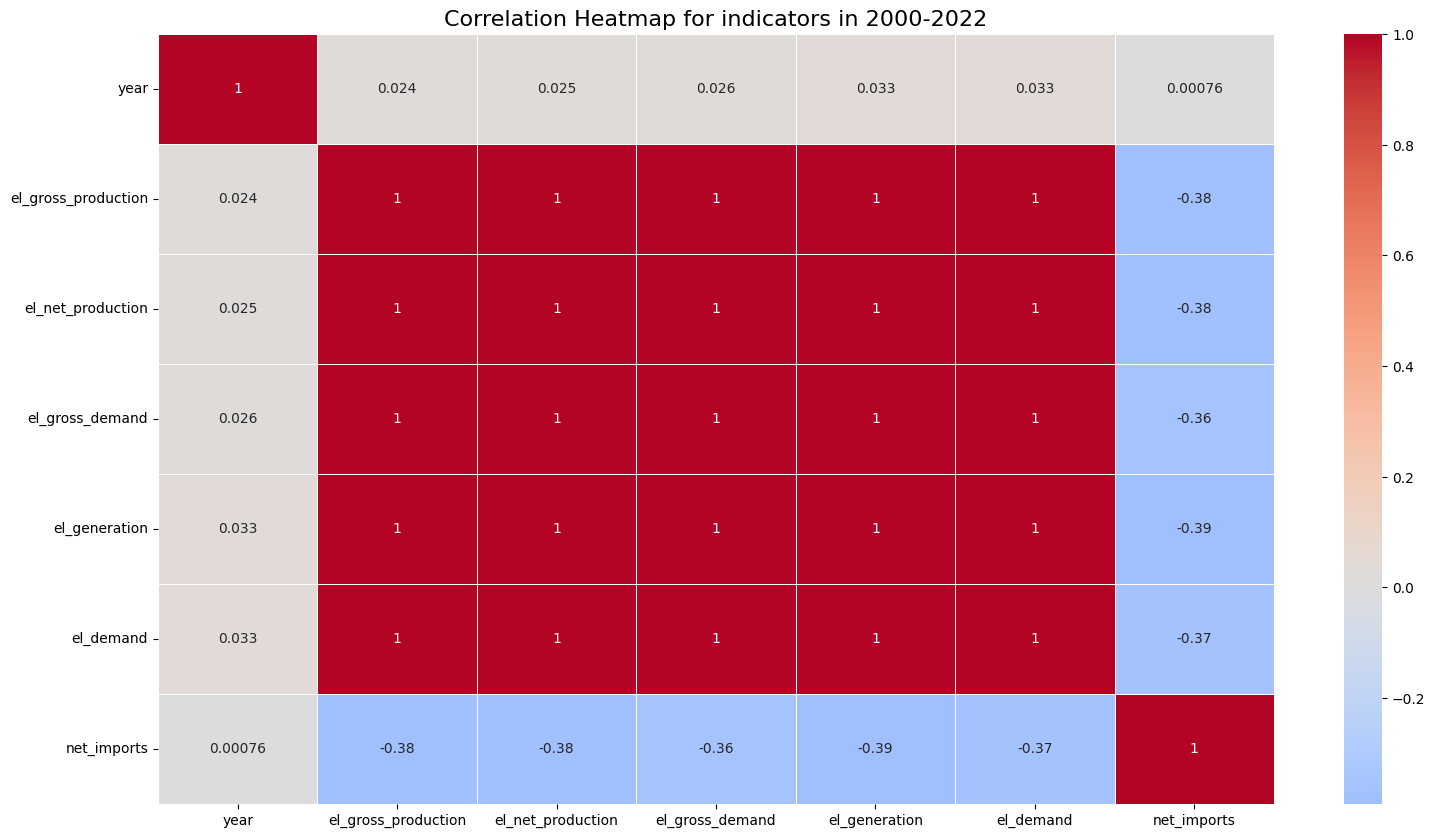

In [203]:
# Create the heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(similar.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='white')

# Display the plot
plt.title('Correlation Heatmap for indicators in 2000-2022', fontsize=16)
plt.show()

In [204]:
similar.isnull().sum()

entity                  0
year                    0
el_gross_production    45
el_net_production      45
el_gross_demand        45
el_generation          12
el_demand              12
net_imports             0
dtype: int64

So, these parameters are highly correlated and tell us about one and the same thing, so we'll take to modeling only el_generation, el_generation_adj (they have less missing values) and corresponding per capita: 'el_generation_pc',
                 'el_generation_adj_pc'

### 3.3.4 Net installed capacity

**Electricity, net installed capacity of electric power plants** (UNData): is the maximum active power that can be supplied continuously, with all plants running, at the point of outlet (i.e., after taking the power supplies for the station auxiliaries and allowing for the losses in those transformers considered integral to the station). This assumes no restriction of interconnection to the network. Does not include overload capacity that can only be sustained for a short period of time (e.g., internal combustion engines momentarily running above their rated capacity). The net maximum electricity-generating capacity represents the sum of all individual plants’ maximum capacities available to run continuously throughout a prolonged period of operation in a day.

This parameter is broken by the process of electricity generation, but we'll take only the total 'el_inst_capacity_total' indicator.

In [205]:
our_indicators= ['entity',
                 'year',
                 'income_group',
                 'gdp_pc',
                 'el_access_total',
                 'el_access_urban',
                 'el_access_rural',
                 'population',
                 'pop_no_el_access_total',
                 'urban_share',

                 'el_generation',
                 'el_demand',
                 'net_imports',
                 'el_generation_pc',
                 'el_demand_pc',
                 'final_energy_consumption',
                 'fin_support',

                 'el_from_coal',
                 'el_from_gas',
                 'el_from_nuclear',
                 'el_from_hydro',
                 'el_from_solar',
                 'el_from_oil',
                 'el_from_wind',
                 'el_from_bioenergy',
                 'renewables_other',
                 'el_inst_capacity_total' ]

In [206]:
other_ind = ['el_imports',
             'el_exports',
             'el_gross_demand',
                 'el_gross_production',
                 'el_net_production',

             'electr_inst_capacity_combustible',
             'electr_inst_capacity_geoterm',
       'electr_inst_capacity_hydro',
             'electr_inst_capacity_nuclear',
       'electr_inst_capacity_other',
             'electr_inst_capacity_solar',
        'electr_inst_capacity_wind',]

In [207]:
#take from df_ssa only cols with our_indicators
dff=ssa_00_22[our_indicators]
dff.head()

entity  year         income_group       gdp_pc  el_access_total  \
0  Angola  2000  Lower middle income   556.884216        24.238865   
1  Angola  2001  Lower middle income   527.464111        20.000000   
2  Angola  2002  Lower middle income   872.657654        26.320255   
3  Angola  2003  Lower middle income   982.805603        27.355137   
4  Angola  2004  Lower middle income  1254.696167        28.395485   

   el_access_urban  el_access_rural  population  pop_no_el_access_total  \
0        44.931599         3.473994  16394067.0                     NaN   
1        30.000000         9.477077  16941584.0              13556602.0   
2        47.670353         2.759651  17516140.0              12897117.0   
3        49.043541         2.255916  18124346.0              13144298.0   
4        50.428509         1.653744  18771128.0              13405173.0   

   urban_share  ...  el_from_coal  el_from_gas  el_from_nuclear  \
0    50.087002  ...           0.0          0.0              0.0   
1    51.273998  ...           0.0          0.0              0.0   
2    52.460999  ...           0.0          0.0              0.0   
3    53.645000  ...           0.0          0.0              0.0   
4    54.827000  ...           0.0          0.0              0.0   

   el_from_hydro  el_from_solar  el_from_oil  el_from_wind  el_from_bioenergy  \
0           0.91            0.0         0.53           0.0                0.0   
1           1.02            0.0         0.62           0.0                0.0   
2           1.14            0.0         0.62           0.0                0.0   
3           1.24            0.0         0.75           0.0                0.0   
4           1.75            0.0         0.49           0.0                0.0   

   renewables_other  el_inst_capacity_total  
0               0.0                   500.0  
1               0.0                   500.0  
2               0.0                   500.0  
3               0.0                   500.0  
4               0.0                   624.0  

[5 rows x 27 columns]

In [208]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   entity                    1127 non-null   object 
 1   year                      1127 non-null   int64  
 2   income_group              1127 non-null   object 
 3   gdp_pc                    1087 non-null   float32
 4   el_access_total           1111 non-null   float32
 5   el_access_urban           1120 non-null   float32
 6   el_access_rural           981 non-null    float32
 7   population                1103 non-null   float32
 8   pop_no_el_access_total    1058 non-null   float32
 9   urban_share               1127 non-null   float32
 10  el_generation             1115 non-null   float32
 11  el_demand                 1115 non-null   float32
 12  net_imports               1127 non-null   float64
 13  el_generation_pc          1115 non-null   float32
 14  el_deman

In [209]:
dff.stb.missing(style=True)

In [210]:
#to csv
dff.to_csv('dff.csv',index=False)

In [211]:
#download
from google.colab import files
files.download('dff.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##3.4 Outliers

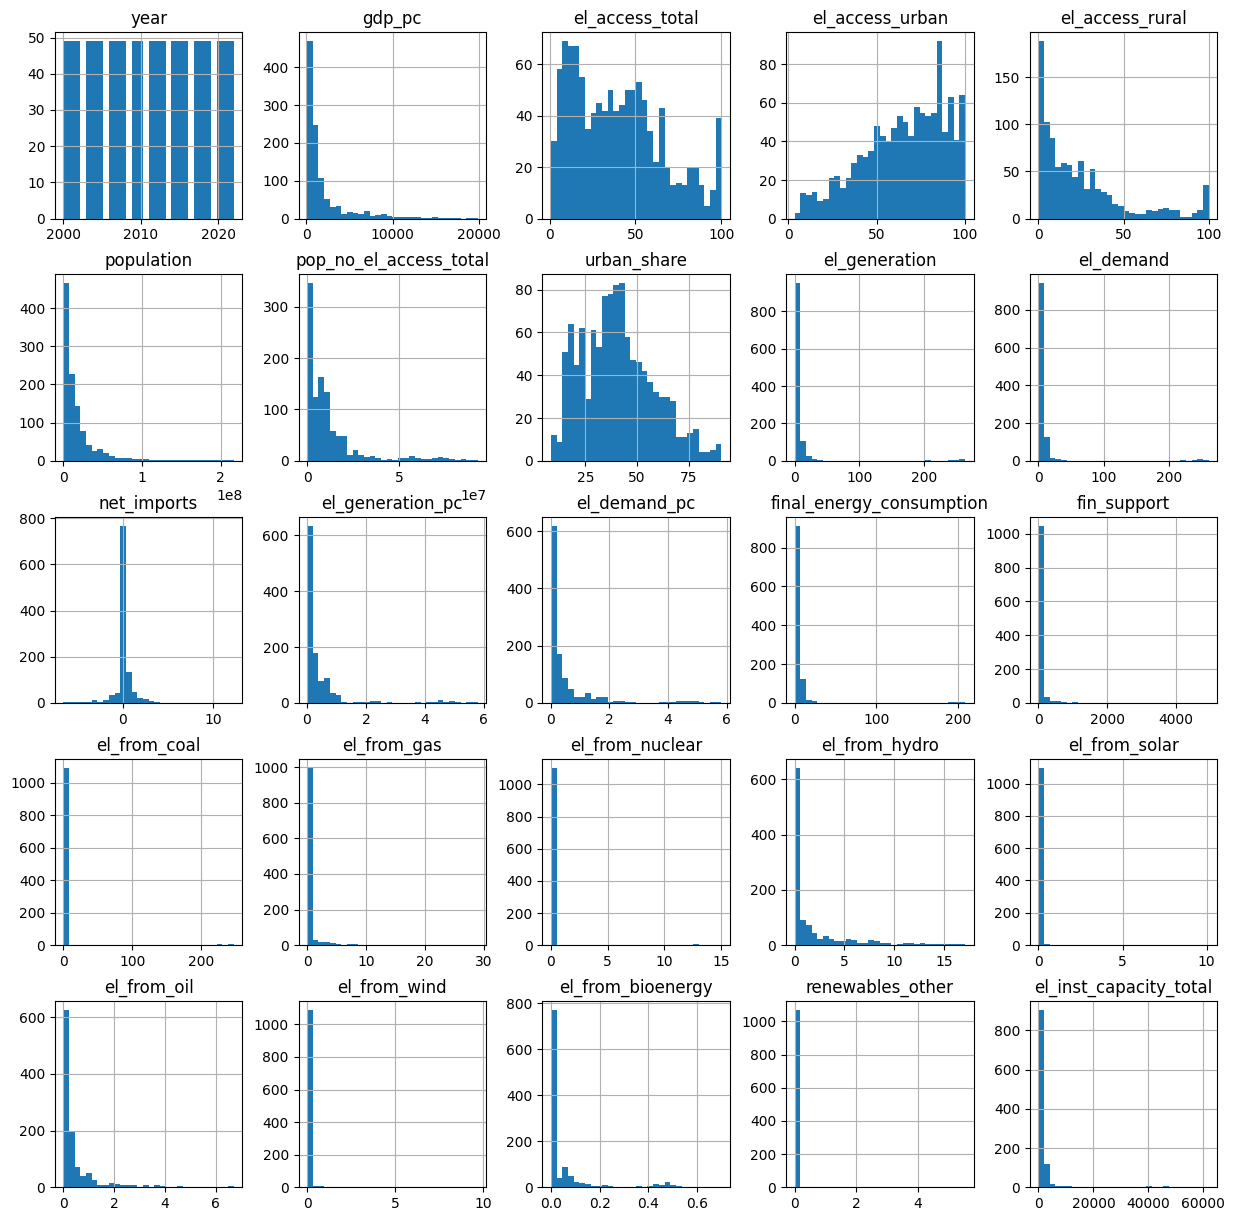

In [212]:
#observe the distribution of all indicators
dff.hist(figsize=(15,15), bins= 30)
plt.show()

In [213]:
def create_boxplots(df):
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=df, orient='v')
    plt.title('Boxplots for Selected Columns')
    plt.xlabel('Value')
    plt.ylabel('Columns')
    plt.show()

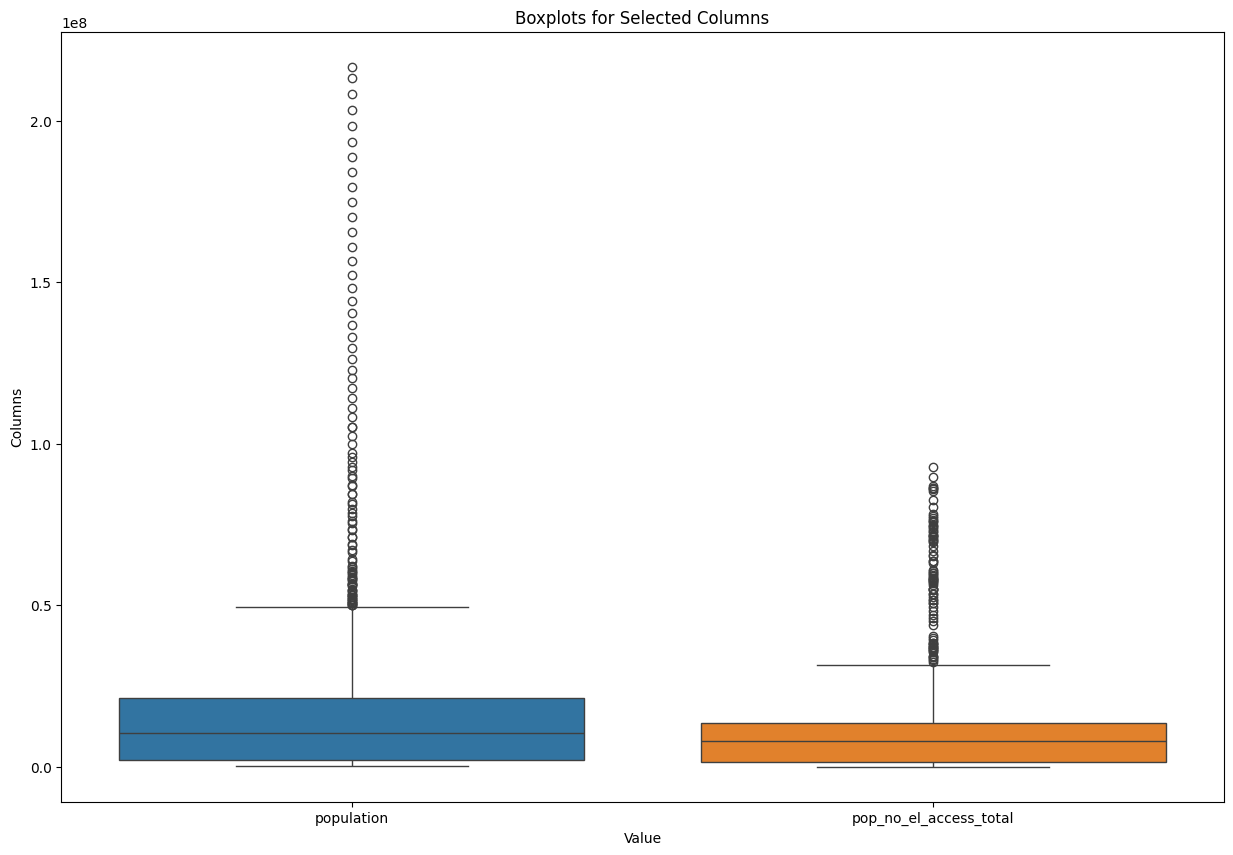

In [214]:
pop=dff[['population', 'pop_no_el_access_total']]
create_boxplots(pop)


In [215]:
pop.describe()

population  pop_no_el_access_total
count       1103.0                  1058.0
mean    18820360.0              11942904.0
std     29226120.0              16396960.0
min        80073.0                   846.0
25%      2173025.5               1346964.5
50%     10467294.0               7783171.5
75%     21252280.0              13559846.0
max    216783376.0              92914024.0

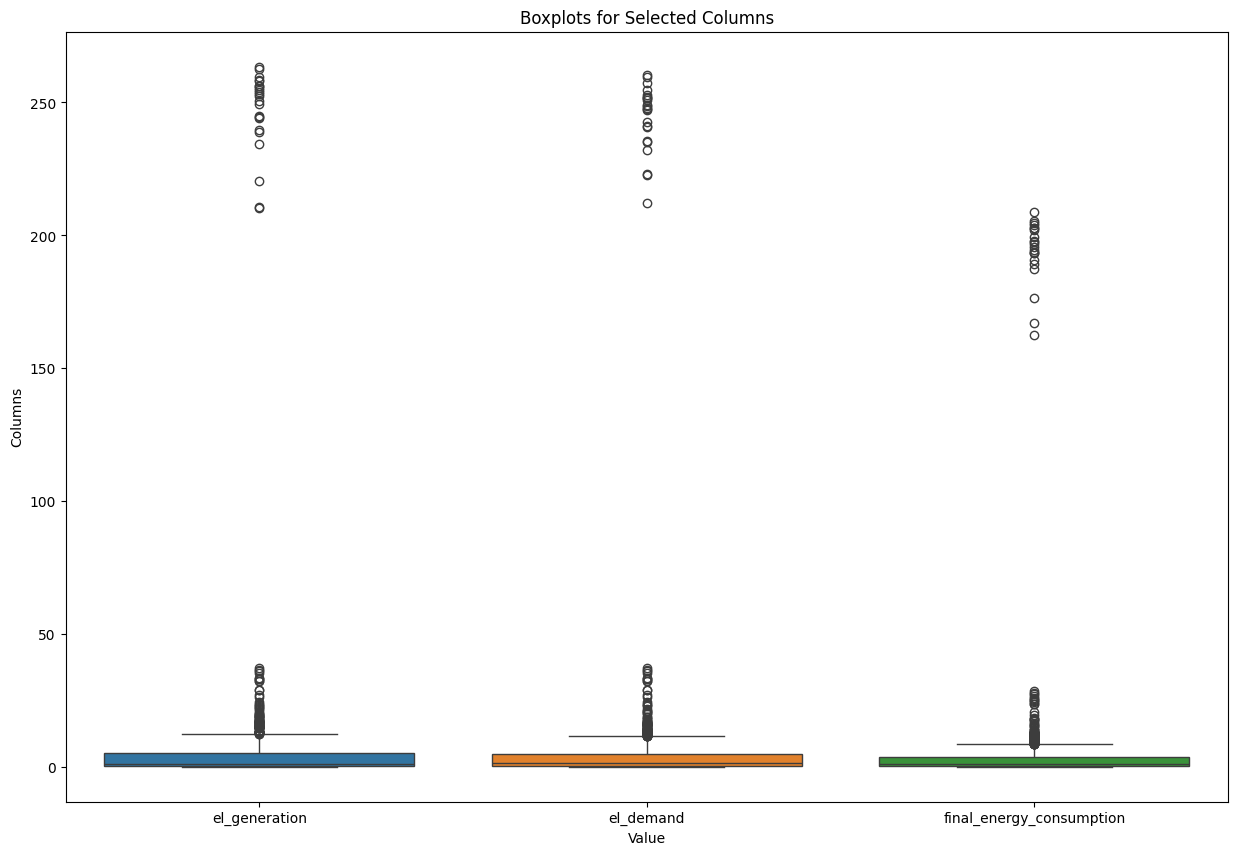

In [216]:
gener=dff[['el_generation', 'el_demand','final_energy_consumption']]
create_boxplots(gener)

In [217]:
#find rows in dff where 'el_generation', 'el_generation_adj' are above 200 or final energy consumption is above 150
dff[(dff['el_generation'] > 200) | (dff['el_demand'] > 200) | (dff['final_energy_consumption'] > 150)]

entity  year         income_group       gdp_pc  el_access_total  \
943  South Africa  2000  Upper middle income  3241.661377        72.395027   
944  South Africa  2001  Upper middle income  2867.472412        70.199997   
945  South Africa  2002  Upper middle income  2708.423340        76.699997   
946  South Africa  2003  Upper middle income  4095.683594        78.800003   
947  South Africa  2004  Upper middle income  5268.278809        80.599998   
948  South Africa  2005  Upper middle income  5893.187012        80.800003   
949  South Africa  2006  Upper middle income  6139.581543        80.699997   
950  South Africa  2007  Upper middle income  6662.062988        82.000000   
951  South Africa  2008  Upper middle income  6251.877441        81.900002   
952  South Africa  2009  Upper middle income  6444.187012        82.599998   
953  South Africa  2010  Upper middle income  8059.562988        82.800003   
954  South Africa  2011  Upper middle income  8737.041016        83.599998   
955  South Africa  2012  Upper middle income  8173.869141        85.199997   
956  South Africa  2013  Upper middle income  7441.230957        85.199997   
957  South Africa  2014  Upper middle income  6965.137695        85.900002   
958  South Africa  2015  Upper middle income  6204.929688        85.300003   
959  South Africa  2016  Upper middle income  5735.066895        83.900002   
960  South Africa  2017  Upper middle income  6734.475098        84.400002   
961  South Africa  2018  Upper middle income  7067.724121        84.699997   
962  South Africa  2019  Upper middle income  6702.526855        85.000000   
963  South Africa  2020  Upper middle income  5753.066406        90.000000   
964  South Africa  2021  Upper middle income  7073.612793        89.300003   
965  South Africa  2022  Upper middle income  6766.481445        86.480003   

     el_access_urban  el_access_rural  population  pop_no_el_access_total  \
943        85.645332        54.908585  46813272.0              12479600.0   
944        85.667664        49.385849  47229712.0              13580239.0   
945        85.687920        64.339958  47661516.0              10753162.0   
946        87.699997        66.282089  48104044.0               9904471.0   
947        85.749916        73.191292  48556064.0               9032697.0   
948        85.805496        73.435249  49017156.0               9193074.0   
949        85.886429        72.895348  49491764.0               9358466.0   
950        85.992943        75.854454  49996096.0               8841557.0   
951        86.118851        75.258400  50565816.0               9010084.0   
952        86.257683        76.710838  51170780.0               8783000.0   
953        86.402985        76.866737  51784928.0               8758101.0   
954        86.548286        78.634270  52443320.0               8528616.0   
955        86.687134        82.638084  53145036.0               7766400.0   
956        86.813049        82.357971  53873608.0               7945694.0   
957        86.921120        84.059875  54729556.0               7636185.0   
958        87.012573        82.143433  55876504.0               8141796.0   
959        87.090179        77.885704  56422272.0               8880808.0   
960        87.156708        79.084358  56641208.0               8893521.0   
961        87.214928        79.740036  57339632.0               8842255.0   
962        87.267609        80.425919  58087060.0               8783740.0   
963        87.317513        95.534409  58801928.0               5880192.0   
964        87.366966        93.378952  59392256.0               6354971.0   
965        87.099998        93.379997  60604992.0               8099515.0   

     urban_share  ...  el_from_coal  el_from_gas  el_from_nuclear  \
943    56.890999  ...    196.070007         0.00            13.01   
944    57.368000  ...    197.229996         0.00            10.72   
945    57.897999  ...    206.029999         0.00            11.99   
946    58.445

The outliers reflect the situation of high disbalance in SSA countries characteristics. South Africa is a genuine outlier, its values are not en error. We need a model robust to outliers.

In [218]:
# Identifying outliers using IQR method
def identify_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
    return outliers


In [219]:
identify_outliers(dff, 'el_demand')

0       False
1       False
2       False
3       False
4       False
        ...  
1122    False
1123    False
1124    False
1125    False
1126    False
Name: el_demand, Length: 1127, dtype: bool

In [220]:
#find rows where 'el_demand' is an outlier
out_demand=dff[identify_outliers(dff, 'el_demand')]
out_demand

entity  year         income_group       gdp_pc  el_access_total  \
18      Angola  2018  Lower middle income  2540.508789        45.290001   
19      Angola  2019  Lower middle income  2191.347656        45.633881   
20      Angola  2020  Lower middle income  1450.905151        46.955444   
21      Angola  2021  Lower middle income  1927.474121        48.223854   
22      Angola  2022  Lower middle income  3000.444336        48.470001   
...        ...   ...                  ...          ...              ...   
1106  Zimbabwe  2002  Lower middle income   529.186890        34.200001   
1107  Zimbabwe  2003  Lower middle income   474.302216        35.135029   
1108  Zimbabwe  2004  Lower middle income   477.399506        35.621990   
1109  Zimbabwe  2005  Lower middle income   470.783752        36.121422   
1110  Zimbabwe  2006  Lower middle income   441.498810        37.200001   

      el_access_urban  el_access_rural  population  pop_no_el_access_total  \
18          65.269997         7.333448  31273538.0              16856034.0   
19          72.167412              NaN  32353592.0              17290584.0   
20          73.565407              NaN  33428490.0              17731992.0   
21          74.962936              NaN  34503776.0              17864724.0   
22          76.220001         0.000000  33086278.0              18339320.0   
...               ...              ...         ...                     ...   
1106        85.283829         7.191911  11984643.0               7865924.0   
1107        85.222923         8.777362  12075835.0               7798662.0   
1108        85.173782         9.759368  12160885.0               7782933.0   
1109        85.143356        10.743701  12224758.0               7780659.0   
1110        91.400002         9.370760  12330490.0               7633651.0   

      urban_share  ...  el_from_coal  el_from_gas  el_from_nuclear  \
18      65.514000  ...          0.00         0.08              0.0   
19      66.177002  ...          0.00         1.64              0.0   
20      66.824997  ...          0.00         1.65              0.0   
21      67.459999  ...          0.00         1.66              0.0   
22      68.081001  ...          0.00         1.67              0.0   
...           ...  ...           ...          ...              ...   
1106    34.584999  ...          4.76         0.00              0.0   
1107    34.479000  ...          3.44         0.00              0.0   
1108    34.293999  ...          4.20         0.00              0.0   
1109    34.110001  ...          4.43         0.00              0.0   
1110    33.925999  ...          2.53         0.00              0.0   

      el_from_hydro  el_from_solar  el_from_oil  el_from_wind  \
18            10.37           0.02         2.62           0.0   
19            11.51           0.02         2.60           0.0   
20            12.64           0.02         2.45           0.0   
21            12.64           0.02         2.48           0.0   
22            12.64           0.02         2.56           0.0   
...             ...            ...          ...           ...   
1106           3.81           0.00         0.01           0.0   
1107           5.34           0.00         0.01           0.0   
1108           5.50           0.00         0.02           0.0   
1109           4.91           0.00         0.02           0.0   
1110           5.31           0.00         0.04           0.0   

      el_from_bioenergy  renewables_other  el_inst_capacity_total  
18                 0.05               0.0                  5010.0  
19                 0.05               0.0                  6156.0  
20                 0.05               0.0                  7217.0  
21                 0.05               0.0                  7217.0  
22                 0.05               0.0                  7488.0  
...                 ...               ...                     ...  
1106               0.00               0.0                  2079.0  
1107

In [221]:
#find unique entities in out_generation_adj
out_demand['entity'].value_counts()


entity
Nigeria             23
South Africa        23
Mozambique          17
Zambia              12
Ghana               10
Sudan                9
Zimbabwe             7
Ethiopia             6
Angola               5
Congo, Dem. Rep.     5
Kenya                4
Name: count, dtype: int64

## 3.5 Missing  in df_ssa and dff_our

### per year

In [222]:
# Group by 'year' and calculate total and missing values for each column
total_values_per_year = df_ssa.groupby('year').count()
missing_values_per_year = df_ssa.groupby('year').apply(lambda x: x.isnull().sum())

# Rename the index to reflect total and missing values
total_values_per_year.index = [f'{year}_total' for year in total_values_per_year.index]
missing_values_per_year.index = [f'{year}_missing' for year in missing_values_per_year.index]

# Concatenate the total and missing values DataFrames
combined_df = pd.concat([total_values_per_year, missing_values_per_year])

# Sort the index to ensure total and missing values are in the correct order
combined_df = combined_df.sort_index()
combined_df


entity  income_group  gdp_pc  population  urban_share  \
1990_missing       0             0       5           0            0   
1990_total        49            49      44          49           49   
1991_missing       0             0       6           0            0   
1991_total        49            49      43          49           49   
1992_missing       0             0       4           0            0   
...              ...           ...     ...         ...          ...   
2021_total        49            49      47          49           49   
2022_missing       0             0       2          24            0   
2022_total        49            49      47          25           49   
2023_missing       0             0      49          36           41   
2023_total        49            49       0          13            8   

              el_access_total  el_access_urban  el_access_rural  \
1990_missing               45               45               46   
1990_total                  4                4                3   
1991_missing               42               42               43   
1991_total                  7                7                6   
1992_missing               36               35               39   
...                       ...              ...              ...   
2021_total                 49               49               46   
2022_missing                0                0                1   
2022_total                 49               49               48   
2023_missing               49               49               49   
2023_total                  0                0                0   

              pop_no_el_access_total  el_generation  ...  \
1990_missing                      45             48  ...   
1990_total                         4              1  ...   
1991_missing                      42             48  ...   
1991_total                         7              1  ...   
1992_missing                      35             48  ...   
...                              ...            ...  ...   
2021_total                        48             49  ...   
2022_missing                       2              0  ...   
2022_total                        47             49  ...   
2023_missing                      49             46  ...   
2023_total                         0              3  ...   

              el_inst_capacity_nuclear  el_inst_capacity_other  \
1990_missing                         6                       6   
1990_total                          43                      43   
1991_missing                         5                       5   
1991_total                          44                      44   
1992_missing                         5                       5   
...                                ...                     ...   
2021_total                          49                      49   
2022_missing                        18                      18   
2022_total                          31                      31   
2023_missing                        49                      49   
2023_total                           0                       0   

              el_inst_capacity_solar  el_inst_capacity_total  \
1990_missing                       6                       6   
1990_total                        43                      43   
1991_missing                       5                       5   
1991_total                        44                      44   
1992_missing                       5                       5   
...                              ...                     ...   
2021_total                        49                      49   
2022_missing                      18                      18   
2022_total                        31                      31   
2023_missing                      49                      49   
2023_total                         0                       0   

              el_inst_capacity_wind  net_imports  el_imports  el_exports 

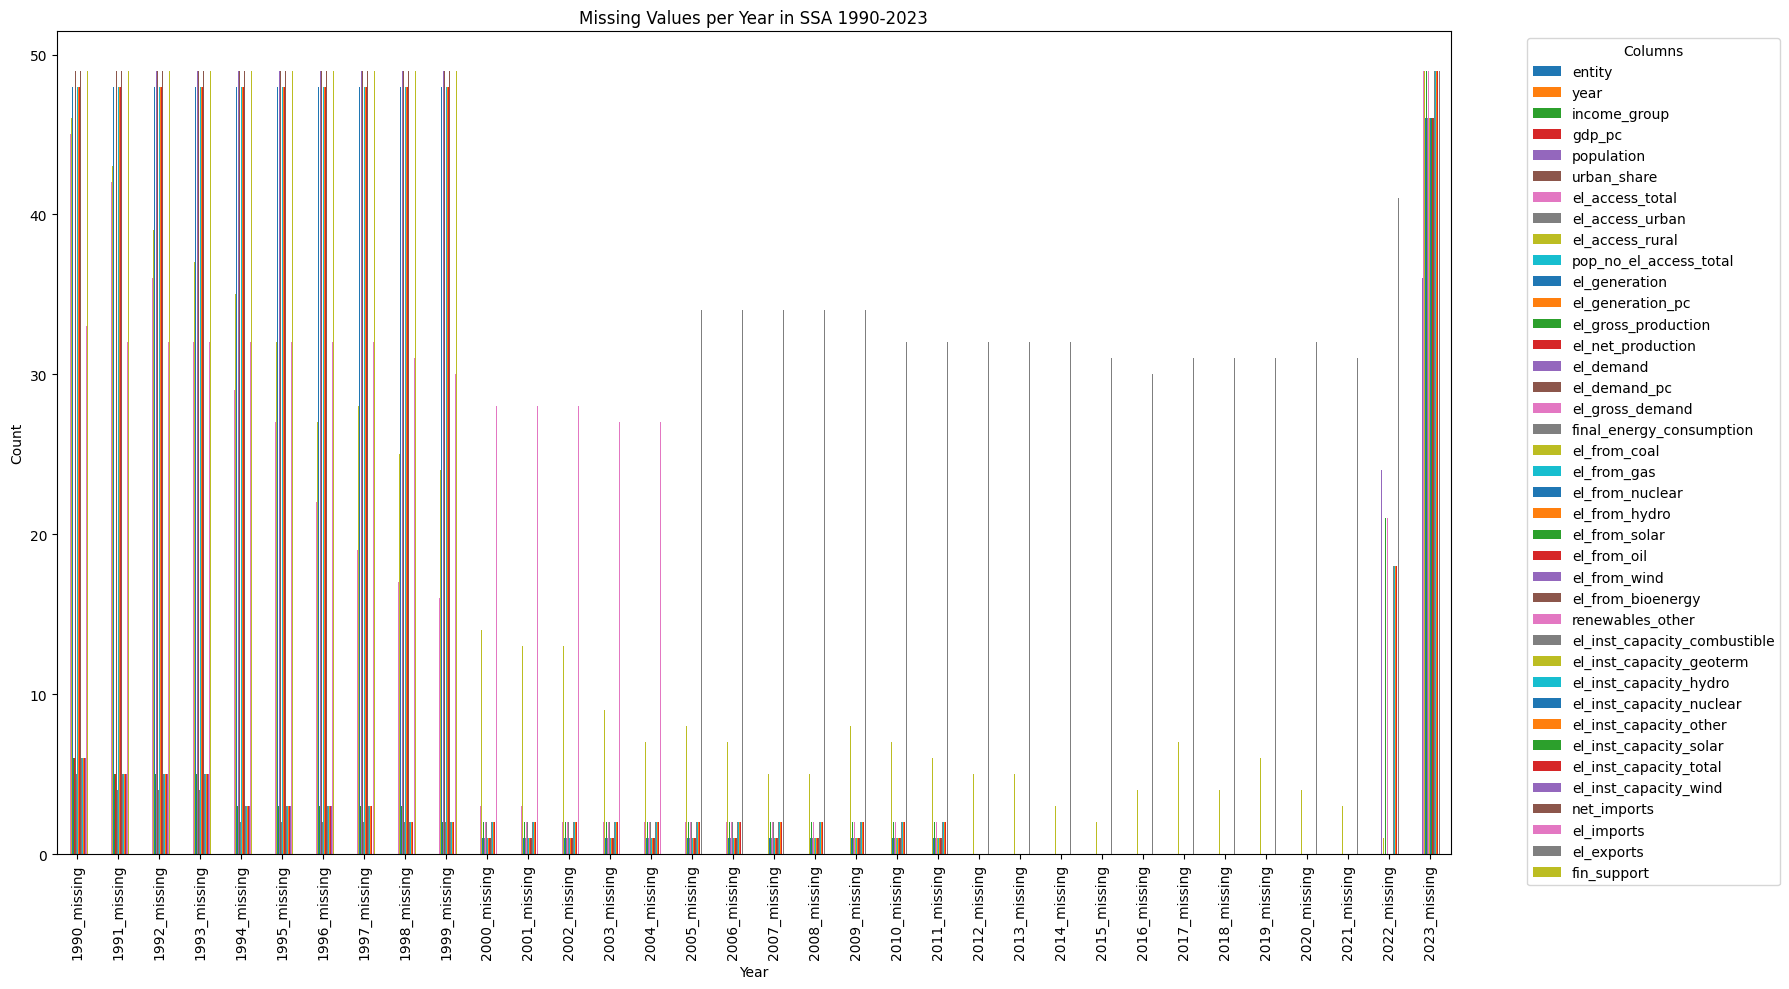

In [223]:
missing_values_per_year.plot(kind='bar', figsize=(18, 10))

plt.title('Missing Values per Year in SSA 1990-2023')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The combined_df and plots clearly show that for years before 2000 and for 2023 we have lots of missing values for the majority of parameters. Earlier data may show long-term relations and also be useful for prediction, but earlier data impacts most.

We can compare indicators' behavior in full and filtered dataset



In [224]:
#find missing values per year in dff
# Group by 'year' and calculate total and missing values for each column
total_values_per_year = dff.groupby('year').count()
missing_values_per_year = dff.groupby('year').apply(lambda x: x.isnull().sum())

# Rename the index to reflect total and missing values
total_values_per_year.index = [f'{year}_total' for year in total_values_per_year.index]
missing_values_per_year.index = [f'{year}_missing' for year in missing_values_per_year.index]




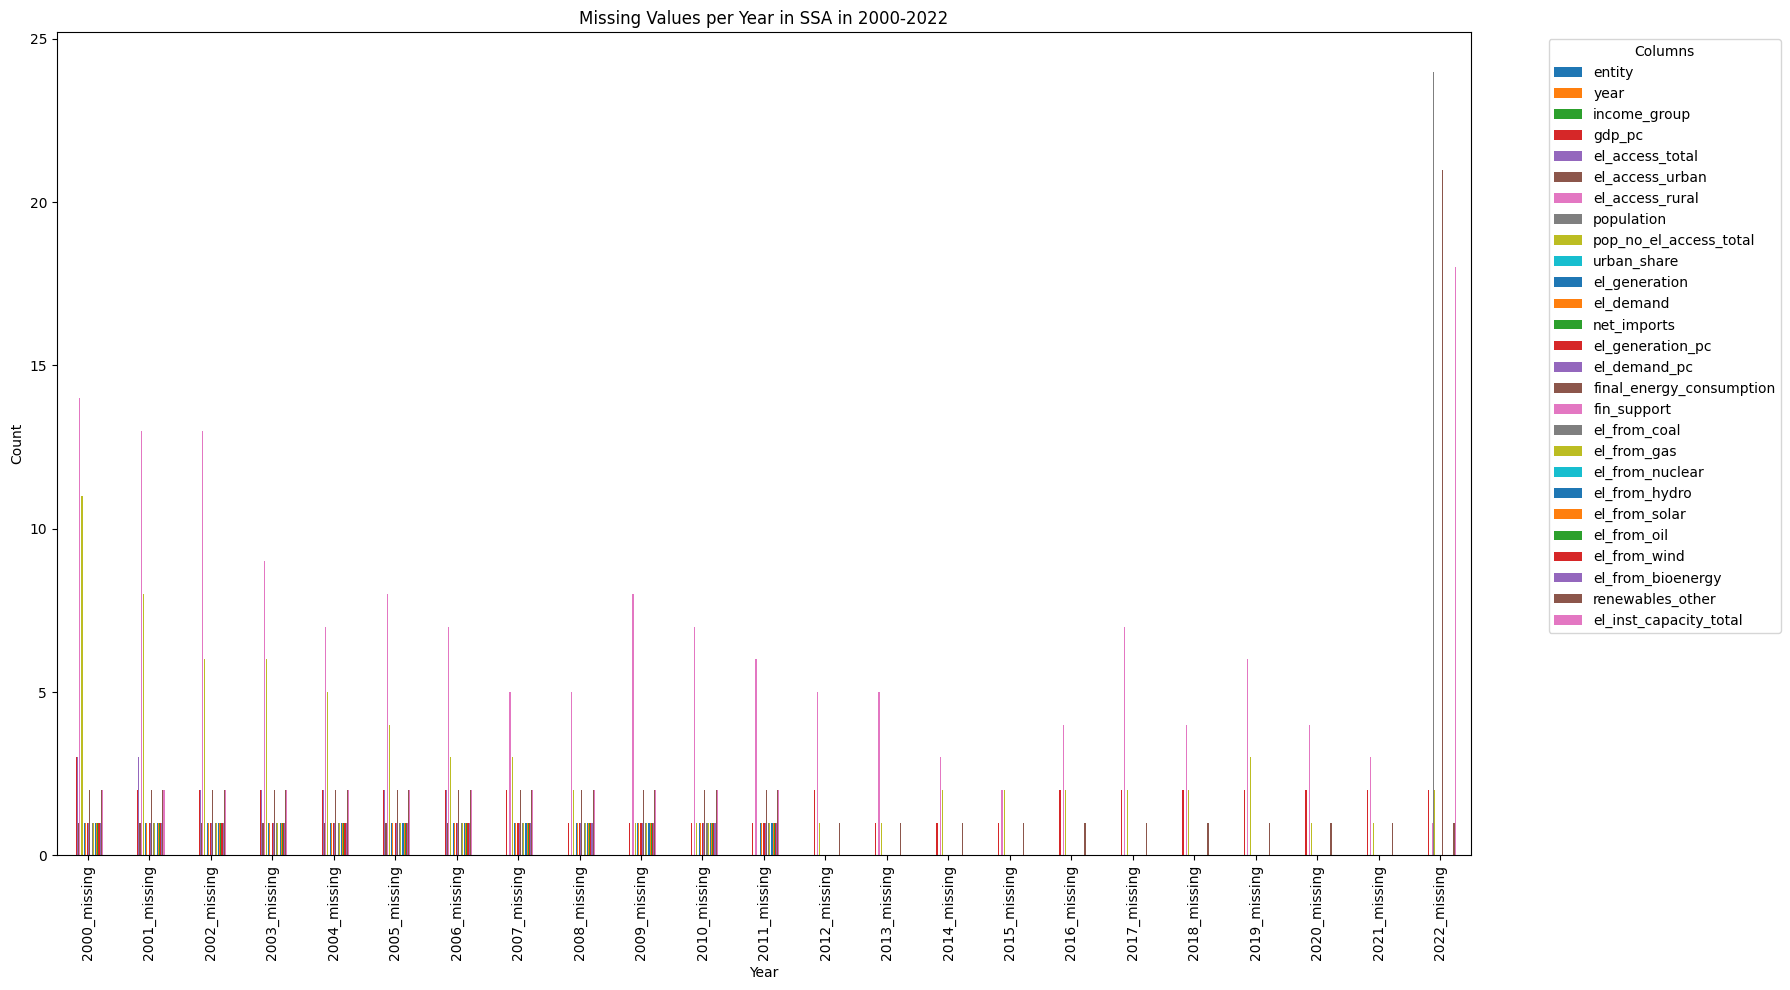

In [225]:
missing_values_per_year.plot(kind='bar', figsize=(18, 10))

plt.title('Missing Values per Year in SSA in 2000-2022')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### per indicator

In [226]:
dff.stb.missing(style=True)

So, 12 indicators which have 1.06% of missing values, like finans_support, have no data in 2022. Other indicators have some missing values in other years.
Let's fill them with KNN method, interpolate, ffill.

In [227]:
#find rows with Nan in renewables_other
dff[dff['renewables_other'].isnull()]

entity  year         income_group       gdp_pc  el_access_total  \
943  South Africa  2000  Upper middle income  3241.661377        72.395027   
944  South Africa  2001  Upper middle income  2867.472412        70.199997   
945  South Africa  2002  Upper middle income  2708.423340        76.699997   
946  South Africa  2003  Upper middle income  4095.683594        78.800003   
947  South Africa  2004  Upper middle income  5268.278809        80.599998   
948  South Africa  2005  Upper middle income  5893.187012        80.800003   
949  South Africa  2006  Upper middle income  6139.581543        80.699997   
950  South Africa  2007  Upper middle income  6662.062988        82.000000   
951  South Africa  2008  Upper middle income  6251.877441        81.900002   
952  South Africa  2009  Upper middle income  6444.187012        82.599998   
953  South Africa  2010  Upper middle income  8059.562988        82.800003   
954  South Africa  2011  Upper middle income  8737.041016        83.599998   
955  South Africa  2012  Upper middle income  8173.869141        85.199997   
956  South Africa  2013  Upper middle income  7441.230957        85.199997   
957  South Africa  2014  Upper middle income  6965.137695        85.900002   
958  South Africa  2015  Upper middle income  6204.929688        85.300003   
959  South Africa  2016  Upper middle income  5735.066895        83.900002   
960  South Africa  2017  Upper middle income  6734.475098        84.400002   
961  South Africa  2018  Upper middle income  7067.724121        84.699997   
962  South Africa  2019  Upper middle income  6702.526855        85.000000   
963  South Africa  2020  Upper middle income  5753.066406        90.000000   
964  South Africa  2021  Upper middle income  7073.612793        89.300003   
965  South Africa  2022  Upper middle income  6766.481445        86.480003   
966   South Sudan  2000           Low income          NaN              NaN   
967   South Sudan  2001           Low income          NaN              NaN   
968   South Sudan  2002           Low income          NaN              NaN   
969   South Sudan  2003           Low income          NaN              NaN   
970   South Sudan  2004           Low income          NaN              NaN   
971   South Sudan  2005           Low income          NaN              NaN   
972   South Sudan  2006           Low income          NaN              NaN   
973   South Sudan  2007           Low income          NaN         0.796383   
974   South Sudan  2008           Low income  1653.041504         1.277265   
975   South Sudan  2009           Low income  1325.275024         3.000000   
976   South Sudan  2010           Low income  1503.133911         1.500000   
977   South Sudan  2011           Low income  1455.358398         2.784874   

     el_access_urban  el_access_rural  population  pop_no_el_access_total  \
943        85.645332        54.908585  46813272.0              12479600.0   
944        85.667664        49.385849  47229712.0              13580239.0   
945        85.687920        64.339958  47661516.0              10753162.0   
946        87.699997        66.282089  48104044.0               9904471.0   
947        85.749916        73.191292  48556064.0               9032697.0   
948        85.805496        73.435249  49017156.0               9193074.0   
949        85.886429        72.895348  49491764.0               9358466.0   
950        85.992943        75.854454  49996096.0               8841557.0   
951        86.118851        75.258400  50565816.0               9010084.0   
952        86.257683        76.710838  51170780.0               8783000.0   
953        86.402985        76.866737  51784928.0               8758101.0   
954        86.548286        78.634270  52443320.0               8528616.0   
955        86.687134        82.638084  53145036.0               7766400.0   
956        86.813049        82.357971  53873608.0               7945694.0   
957        86.921120        84.059875  54729556

Only South Africa and South Sudan has Nan in the col. All renewables are electricity_from_wind, electricity_from_solar, electricity_from_hydro, electricity_from_bioenergy,other renewables excluding bioenergy. South Africa has missing values for all years in 'renewables_other' col, no way to impute them, so we can replace them with the mean.

### per country

In [228]:
#group by country and find number of missing per country
country_missing=dff.groupby('entity').apply(lambda x: x.isnull().sum())
country_missing

entity  year  income_group  gdp_pc  el_access_total  \
entity                                                                          
Angola                         0     0             0       0                0   
Benin                          0     0             0       0                0   
Botswana                       0     0             0       0                0   
Burkina Faso                   0     0             0       0                0   
Burundi                        0     0             0       0                0   
Cabo Verde                     0     0             0       0                0   
Cameroon                       0     0             0       0                0   
Central African Republic       0     0             0       0                0   
Chad                           0     0             0       0                0   
Comoros                        0     0             0       0                0   
Congo, Dem. Rep.               0     0             0       0                0   
Congo, Rep.                    0     0             0       0                0   
Cote d'Ivoire                  0     0             0       0                0   
Djibouti                       0     0             0       0                0   
Equatorial Guinea              0     0             0       0                0   
Eritrea                        0     0             0      11                0   
Eswatini                       0     0             0       0                0   
Ethiopia                       0     0             0       0                0   
Gabon                          0     0             0       0                0   
Gambia, The                    0     0             0       0                0   
Ghana                          0     0             0       0                0   
Guinea                         0     0             0       0                0   
Guinea-Bissau                  0     0             0       0                2   
Kenya                          0     0             0       0                0   
Lesotho                        0     0             0       0                0   
Liberia                        0     0             0       0                7   
Madagascar                     0     0             0       0                0   
Malawi                         0     0             0       0                0   
Mali                           0     0             0       0                0   
Mauritania                     0     0             0       0                0   
Mauritius                      0     0             0       0                0   
Mozambique                     0     0             0       0                0   
Namibia                        0     0             0       0                0   
Niger                          0     0             0       0                0   
Nigeria                        0     0             0       0                0   
Rwanda                         0     0             0       0                0   
Sao Tome and Principe          0     0             0       1                0   
Senegal                        0     0             0       0                0   
Seychelles                     0     0             0       0                0   
Sierra Leone                   0     0             0       0                0   
Somalia                        0     0             0      13                0   
South Africa                   0     0             0       0                0   
South Sudan                    0     0             0      15                7   
Sudan                          0     0             0       0                0   
Tanzania                       0     0             0       0                0   
Togo                           0     0             0       0                0   
Uganda                         0     0             0       0                0   
Zambia                         0     0             0     

In [229]:
# Calculate the total number of missing values per country
country_missing_total = dff.groupby('entity').apply(lambda x: x.isnull().sum().sum())

# Convert the result to a DataFrame
country_missing_total = country_missing_total.reset_index(name='total_missing')

# Sort in descending order
country_missing_total = country_missing_total.sort_values(by='total_missing', ascending=False)
country_missing_total

entity  total_missing
42               South Sudan            212
25                   Liberia             32
43                     Sudan             26
41              South Africa             25
15                   Eritrea             21
40                   Somalia             21
22             Guinea-Bissau             17
10          Congo, Dem. Rep.             15
39              Sierra Leone             14
0                     Angola             13
29                Mauritania             12
4                    Burundi             12
14         Equatorial Guinea             11
26                Madagascar             10
38                Seychelles             10
11               Congo, Rep.              8
3               Burkina Faso              7
21                    Guinea              6
28                      Mali              6
24                   Lesotho              5
7   Central African Republic              5
17                  Ethiopia              5
33                     Niger              4
31                Mozambique              4
30                 Mauritius              4
8                       Chad              3
35                    Rwanda              3
19               Gambia, The              3
32                   Namibia              3
12             Cote d'Ivoire              3
5                 Cabo Verde              3
44                  Tanzania              3
1                      Benin              3
45                      Togo              3
18                     Gabon              3
2                   Botswana              2
6                   Cameroon              2
34                   Nigeria              2
48                  Zimbabwe              2
36     Sao Tome and Principe              2
13                  Djibouti              2
16                  Eswatini              2
23                     Kenya              2
9                    Comoros              1
37                   Senegal              1
27                    Malawi              1
47                    Zambia              1
20                     Ghana              1
46                    Uganda              0

In [230]:
#find data for South Sudan
dff[dff['entity']=='South Sudan']

entity  year income_group       gdp_pc  el_access_total  \
966  South Sudan  2000   Low income          NaN              NaN   
967  South Sudan  2001   Low income          NaN              NaN   
968  South Sudan  2002   Low income          NaN              NaN   
969  South Sudan  2003   Low income          NaN              NaN   
970  South Sudan  2004   Low income          NaN              NaN   
971  South Sudan  2005   Low income          NaN              NaN   
972  South Sudan  2006   Low income          NaN              NaN   
973  South Sudan  2007   Low income          NaN         0.796383   
974  South Sudan  2008   Low income  1653.041504         1.277265   
975  South Sudan  2009   Low income  1325.275024         3.000000   
976  South Sudan  2010   Low income  1503.133911         1.500000   
977  South Sudan  2011   Low income  1455.358398         2.784874   
978  South Sudan  2012   Low income  1114.923706         3.296268   
979  South Sudan  2013   Low income  1659.140747         3.805692   
980  South Sudan  2014   Low income  1245.149292         4.310086   
981  South Sudan  2015   Low income  1071.777710         4.809501   
982  South Sudan  2016   Low income          NaN         5.304766   
983  South Sudan  2017   Low income          NaN         4.200000   
984  South Sudan  2018   Low income          NaN         6.286169   
985  South Sudan  2019   Low income          NaN         6.773966   
986  South Sudan  2020   Low income          NaN         7.260934   
987  South Sudan  2021   Low income          NaN         7.747763   
988  South Sudan  2022   Low income          NaN         5.400000   

     el_access_urban  el_access_rural  population  pop_no_el_access_total  \
966         8.065781              NaN   6114443.0                     NaN   
967         8.250224              NaN   6394433.0                     NaN   
968         8.432593              NaN   6686105.0                     NaN   
969         8.619814              NaN   6992367.0                     NaN   
970         8.818810              NaN   7317127.0                     NaN   
971         9.036509              NaN   7662659.0                     NaN   
972         9.279553              NaN   8029516.0                     NaN   
973         9.548176              NaN   8417830.0                     NaN   
974         9.836192              NaN   8823896.0                     NaN   
975        16.600000              NaN   9229234.0               8867990.0   
976         4.000000         0.956416   9714425.0               9365746.0   
977        10.751966         1.032206  10243057.0               9566275.0   
978        11.052922         1.568489  10701605.0               9796358.0   
979        11.340954         2.104866  11106037.0               9981331.0   
980        11.611137         2.638921  11213286.0              10122071.0   
981        11.864703         3.170463  11194300.0              10221841.0   
982        12.104420         3.700240  11066116.0              10277007.0   
983         9.600000         2.904734  10658230.0              10452521.0   
984        12.554701         4.756564  10395332.0              10296737.0   
985        13.583961         5.082201  10447677.0              10318680.0   
986        14.578550         5.408720  10606224.0               9836115.0   
987        15.555807         5.732637  10748278.0               9915521.0   
988        15.000000         1.700000         NaN              10323853.0   

     urban_share  ...  el_from_coal  el_from_gas  el_from_nuclear  \
966    16.504000  ...           NaN          NaN              0.0   
967    16.632000  ...           NaN          NaN              0.0   
968    16.761000  ...           NaN          NaN              0.0   
969    16.891001  ...           NaN          NaN              0.0   
970    17.023001  ...           NaN          NaN              0.0   
971    17.153999  ...           NaN          NaN              0.0   
972    17.287001  ...

South Sudan has most missing values because it was one country with Sudan until 2011. How to treat it**???**

## 3.6 Addressing missing values

###3.6.1 Drop South Sudan

As we sae, South Sudan has the largest number of missing values(203), because it was within Sudan fefore 2011. All other countries are present from 2000 and earlier. To fill missing values for South Sudan is impossible. Let's drop it for consistancy.

In [231]:
#drop rews for South Sudan
dff=dff[dff['entity']!='South Sudan'].reset_index(drop=True)
dff.head()

entity  year         income_group       gdp_pc  el_access_total  \
0  Angola  2000  Lower middle income   556.884216        24.238865   
1  Angola  2001  Lower middle income   527.464111        20.000000   
2  Angola  2002  Lower middle income   872.657654        26.320255   
3  Angola  2003  Lower middle income   982.805603        27.355137   
4  Angola  2004  Lower middle income  1254.696167        28.395485   

   el_access_urban  el_access_rural  population  pop_no_el_access_total  \
0        44.931599         3.473994  16394067.0                     NaN   
1        30.000000         9.477077  16941584.0              13556602.0   
2        47.670353         2.759651  17516140.0              12897117.0   
3        49.043541         2.255916  18124346.0              13144298.0   
4        50.428509         1.653744  18771128.0              13405173.0   

   urban_share  ...  el_from_coal  el_from_gas  el_from_nuclear  \
0    50.087002  ...           0.0          0.0              0.0   
1    51.273998  ...           0.0          0.0              0.0   
2    52.460999  ...           0.0          0.0              0.0   
3    53.645000  ...           0.0          0.0              0.0   
4    54.827000  ...           0.0          0.0              0.0   

   el_from_hydro  el_from_solar  el_from_oil  el_from_wind  el_from_bioenergy  \
0           0.91            0.0         0.53           0.0                0.0   
1           1.02            0.0         0.62           0.0                0.0   
2           1.14            0.0         0.62           0.0                0.0   
3           1.24            0.0         0.75           0.0                0.0   
4           1.75            0.0         0.49           0.0                0.0   

   renewables_other  el_inst_capacity_total  
0               0.0                   500.0  
1               0.0                   500.0  
2               0.0                   500.0  
3               0.0                   500.0  
4               0.0                   624.0  

[5 rows x 27 columns]

### 3.6.2. Replace South Africa's 'renewables_other' with the mean value for countries with Upper middle income.

We saw in 3.3. that South Africa has missing values for all years in 'renewables_minus_bioenergy' col.

In [232]:
# Group by entity and count non-NaN values for each column
non_nan_counts = dff.groupby('entity').apply(lambda x: x.notnull().sum())

# Find entities with less than 2 non-NaN rows for any column
entities_with_insufficient_data = non_nan_counts[(non_nan_counts < 2).any(axis=1)]
entities_with_insufficient_data

entity  year  income_group  gdp_pc  el_access_total  \
entity                                                              
South Africa      23    23            23      23               23   

              el_access_urban  el_access_rural  population  \
entity                                                       
South Africa               23               23          23   

              pop_no_el_access_total  urban_share  ...  el_from_coal  \
entity                                             ...                 
South Africa                      23           23  ...            23   

              el_from_gas  el_from_nuclear  el_from_hydro  el_from_solar  \
entity                                                                     
South Africa           23               23             23             23   

              el_from_oil  el_from_wind  el_from_bioenergy  renewables_other  \
entity                                                                         
South Africa           23            23                 23                 0   

              el_inst_capacity_total  
entity                                
South Africa                      22  

[1 rows x 27 columns]

 Values for all years are missing, no way to impute them, so let's replace them with the mean for countries with Upper middle income.

In [233]:
# Calculate the mean for 'renewables_other' for 'Upper middle income' entities for each year
mean_values = dff[dff['income_group'] == 'Upper middle income'].groupby('year')['renewables_other'].mean()

# Fill missing values for 'South Africa' in 'renewables_minus_bioenergy' with the calculated means
dff.loc[(dff['entity'] == 'South Africa') & (dff['renewables_other'].isnull()), 'renewables_other'] = dff[dff['entity'] == 'South Africa']['year'].map(mean_values)

In [234]:
dff.stb.missing(style=True)

###3.6.3 KNNImputer - dff_knn

In [235]:
dff_knn=dff.copy(deep=True)

In [236]:
# Drop non-numeric columns for imputation
dff_numeric = dff_knn.select_dtypes(include=[float, int])

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the numeric data
dff_imputed = pd.DataFrame(imputer.fit_transform(dff_numeric), columns=dff_numeric.columns, index=dff_numeric.index)

# Combine the imputed numeric data back with the non-numeric data
dff_knn[dff_numeric.columns] = dff_imputed
dff_knn.describe()

year        gdp_pc  el_access_total  el_access_urban  \
count  1104.000000   1104.000000      1104.000000      1104.000000   
mean   2011.000000   2054.338247        40.218233        66.291551   
std       6.636256   2869.480947        25.717722        22.246162   
min    2000.000000    110.460876         1.279584         3.500000   
25%    2005.000000    516.864471        17.400000        50.220632   
50%    2011.000000    918.004486        37.139816        68.850895   
75%    2017.000000   2100.026001        56.500000        85.147207   
max    2022.000000  19849.716797       100.000000       100.000000   

       el_access_rural    population  pop_no_el_access_total  urban_share  \
count      1104.000000  1.104000e+03            1.104000e+03  1104.000000   
mean         25.163803  1.875147e+07            1.153394e+07    41.047288   
std          24.427116  2.925053e+07            1.617596e+07    17.086351   
min           0.000000  8.007300e+04            8.460000e+02     8.246000   
25%           6.607519  2.174227e+06            1.320804e+06    28.441500   
50%          20.224959  1.023135e+07            7.158421e+06    39.783501   
75%          32.443457  2.153270e+07            1.303478e+07    51.981751   
max         100.000000  2.167834e+08            9.291402e+07    90.735001   

       el_generation    el_demand  ...  el_from_coal  el_from_gas  \
count    1104.000000  1104.000000  ...   1104.000000  1104.000000   
mean        8.593324     8.651404  ...      4.860697     0.765118   
std        35.235790    34.831218  ...     32.402617     3.251657   
min         0.020000     0.020000  ...      0.000000     0.000000   
25%         0.280000     0.350000  ...      0.000000     0.000000   
50%         1.065000     1.475000  ...      0.000000     0.000000   
75%         5.162500     4.827500  ...      0.000000     0.000000   
max       263.489990   260.339996  ...    247.580002    28.969999   

       el_from_nuclear  el_from_hydro  el_from_solar  el_from_oil  \
count      1104.000000    1104.000000    1104.000000  1104.000000   
mean          0.259185       1.983406       0.053605     0.498668   
std           1.788534       3.444035       0.488633     0.924351   
min           0.000000       0.000000       0.000000     0.000000   
25%           0.000000       0.000000       0.000000     0.020000   
50%           0.000000       0.300000       0.000000     0.160000   
75%           0.000000       2.022500       0.010000     0.460000   
max          15.030000      17.090000      10.130000     6.710000   

       el_from_wind  el_from_bioenergy  renewables_other  \
count   1104.000000        1104.000000       1104.000000   
mean       0.064620           0.055208          0.052817   
std        0.591698           0.122107          0.452852   
min        0.000000           0.000000          0.000000   
25%        0.000000           0.000000          0.000000   
50%        0.000000           0.000000          0.000000   
75%        0.000000           0.050000          0.000000   
max        9.700000           0.700000          5.520000   

       el_inst_capacity_total  
count             1104.000000  
mean              1894.445393  
std               6782.172071  
min                  6.000000  
25%                107.375000  
50%                361.000000  
75%               1315.100037  
max              61961.500000  

[8 rows x 25 columns]

###3.6.4 Interpolation - dff_interp

In [237]:
# Linear interpolation
dff_interp = dff.copy(deep=True)
dff_interp = dff_interp.interpolate(method='linear')
dff_interp.describe()

year        gdp_pc  el_access_total  el_access_urban  \
count  1104.000000   1104.000000      1104.000000      1104.000000   
mean   2011.000000   2017.831055        40.153702        66.205276   
std       6.636256   2872.121094        25.762169        22.353477   
min    2000.000000    110.460876         1.279584         3.500000   
25%    2005.000000    507.340141        17.188972        49.989225   
50%    2011.000000    873.106262        37.229746        68.995895   
75%    2017.000000   1941.656311        56.500000        85.147207   
max    2022.000000  19849.716797       100.000000       100.000000   

       el_access_rural   population  pop_no_el_access_total  urban_share  \
count      1104.000000       1104.0                  1103.0  1104.000000   
mean         23.984505   18907722.0              11680682.0    41.047291   
std          25.559271   29238434.0              16403041.0    17.086351   
min           0.000000      80073.0                   846.0     8.246000   
25%           4.398712    2161574.5               1317881.0    28.441500   
50%          15.816493   10595888.5               7289485.0    39.783501   
75%          32.656593   21580400.0              13309824.0    51.981751   
max         100.000000  216783376.0              92914024.0    90.735001   

       el_generation    el_demand  ...  el_from_coal  el_from_gas  \
count    1104.000000  1104.000000  ...   1104.000000  1104.000000   
mean        8.593325     8.651404  ...      4.860697     0.765118   
std        35.235790    34.831219  ...     32.402618     3.251657   
min         0.020000     0.020000  ...      0.000000     0.000000   
25%         0.280000     0.350000  ...      0.000000     0.000000   
50%         1.065000     1.475000  ...      0.000000     0.000000   
75%         5.162500     4.827500  ...      0.000000     0.000000   
max       263.489990   260.339996  ...    247.580002    28.969999   

       el_from_nuclear  el_from_hydro  el_from_solar  el_from_oil  \
count      1104.000000    1104.000000    1104.000000  1104.000000   
mean          0.259185       1.983406       0.053605     0.498668   
std           1.788534       3.444035       0.488633     0.924351   
min           0.000000       0.000000       0.000000     0.000000   
25%           0.000000       0.000000       0.000000     0.020000   
50%           0.000000       0.300000       0.000000     0.160000   
75%           0.000000       2.022500       0.010000     0.460000   
max          15.030000      17.090000      10.130000     6.710000   

       el_from_wind  el_from_bioenergy  renewables_other  \
count   1104.000000        1104.000000       1104.000000   
mean       0.064620           0.055208          0.052817   
std        0.591698           0.122107          0.452852   
min        0.000000           0.000000          0.000000   
25%        0.000000           0.000000          0.000000   
50%        0.000000           0.000000          0.000000   
75%        0.000000           0.050000          0.000000   
max        9.700000           0.700000          5.520000   

       el_inst_capacity_total  
count             1104.000000  
mean              2249.078857  
std               7723.742188  
min                  6.000000  
25%                107.375000  
50%                364.477005  
75%               1328.000000  
max              61961.500000  

[8 rows x 25 columns]

###3.6.5 Forward fill, backward fill - dff_fb

In [238]:
dff_fb=dff.copy(deep=True)
dff_fb.isna().sum()

entity                        0
year                          0
income_group                  0
gdp_pc                       25
el_access_total               9
el_access_urban               7
el_access_rural             136
population                   23
pop_no_el_access_total       60
urban_share                   0
el_generation                 0
el_demand                     0
net_imports                   0
el_generation_pc              0
el_demand_pc                  0
final_energy_consumption     32
fin_support                   0
el_from_coal                  0
el_from_gas                   0
el_from_nuclear               0
el_from_hydro                 0
el_from_solar                 0
el_from_oil                   0
el_from_wind                  0
el_from_bioenergy             0
renewables_other              0
el_inst_capacity_total       29
dtype: int64

In [239]:
dff_fb = dff_fb.ffill().bfill()
dff_fb.describe()

year        gdp_pc  el_access_total  el_access_urban  \
count  1104.000000   1104.000000      1104.000000      1104.000000   
mean   2011.000000   2012.966064        40.350704        66.448280   
std       6.636256   2873.849854        25.731279        22.280132   
min    2000.000000    110.460876         1.279584         3.500000   
25%    2005.000000    507.340141        17.400000        50.220632   
50%    2011.000000    853.715332        37.738194        69.515598   
75%    2017.000000   1941.656311        56.500000        85.147207   
max    2022.000000  19849.716797       100.000000       100.000000   

       el_access_rural    population  pop_no_el_access_total  urban_share  \
count      1104.000000  1.104000e+03                 1104.00  1104.000000   
mean         24.576235  1.890388e+07             11840478.00    41.047291   
std          26.459576  2.933525e+07             16849900.00    17.086351   
min           0.000000  8.007300e+04                  846.00     8.246000   
25%           4.413376  2.130476e+06              1167019.75    28.441500   
50%          15.963864  1.048111e+07              7292968.00    39.783501   
75%          33.747066  2.164752e+07             13353722.25    51.981751   
max         100.000000  2.167834e+08             92914024.00    90.735001   

       el_generation    el_demand  ...  el_from_coal  el_from_gas  \
count    1104.000000  1104.000000  ...   1104.000000  1104.000000   
mean        8.593325     8.651404  ...      4.860697     0.765118   
std        35.235790    34.831219  ...     32.402618     3.251657   
min         0.020000     0.020000  ...      0.000000     0.000000   
25%         0.280000     0.350000  ...      0.000000     0.000000   
50%         1.065000     1.475000  ...      0.000000     0.000000   
75%         5.162500     4.827500  ...      0.000000     0.000000   
max       263.489990   260.339996  ...    247.580002    28.969999   

       el_from_nuclear  el_from_hydro  el_from_solar  el_from_oil  \
count      1104.000000    1104.000000    1104.000000  1104.000000   
mean          0.259185       1.983406       0.053605     0.498668   
std           1.788534       3.444035       0.488633     0.924351   
min           0.000000       0.000000       0.000000     0.000000   
25%           0.000000       0.000000       0.000000     0.020000   
50%           0.000000       0.300000       0.000000     0.160000   
75%           0.000000       2.022500       0.010000     0.460000   
max          15.030000      17.090000      10.130000     6.710000   

       el_from_wind  el_from_bioenergy  renewables_other  \
count   1104.000000        1104.000000       1104.000000   
mean       0.064620           0.055208          0.052817   
std        0.591698           0.122107          0.452852   
min        0.000000           0.000000          0.000000   
25%        0.000000           0.000000          0.000000   
50%        0.000000           0.000000          0.000000   
75%        0.000000           0.050000          0.000000   
max        9.700000           0.700000          5.520000   

       el_inst_capacity_total  
count             1104.000000  
mean              2607.476807  
std               9379.342773  
min                  6.000000  
25%                107.375000  
50%                363.617508  
75%               1343.250000  
max              61961.500000  

[8 rows x 25 columns]

In [240]:
dff_fb.isnull().sum()

entity                      0
year                        0
income_group                0
gdp_pc                      0
el_access_total             0
el_access_urban             0
el_access_rural             0
population                  0
pop_no_el_access_total      0
urban_share                 0
el_generation               0
el_demand                   0
net_imports                 0
el_generation_pc            0
el_demand_pc                0
final_energy_consumption    0
fin_support                 0
el_from_coal                0
el_from_gas                 0
el_from_nuclear             0
el_from_hydro               0
el_from_solar               0
el_from_oil                 0
el_from_wind                0
el_from_bioenergy           0
renewables_other            0
el_inst_capacity_total      0
dtype: int64

###3.6.6 Prophet - **dff_pr**

In [241]:
dff_pr = dff.copy()


In [242]:
# List of columns to fill (excluding 'entity', 'year', and 'income_group')
columns_to_fill = dff.columns.difference(['entity', 'year', 'income_group'])

We get negative values in some columns which is impossible. Let's adjust them  replace with the last positive (min) value for the col.

In [243]:
dff_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   entity                    1104 non-null   object 
 1   year                      1104 non-null   int64  
 2   income_group              1104 non-null   object 
 3   gdp_pc                    1079 non-null   float32
 4   el_access_total           1095 non-null   float32
 5   el_access_urban           1097 non-null   float32
 6   el_access_rural           968 non-null    float32
 7   population                1081 non-null   float32
 8   pop_no_el_access_total    1044 non-null   float32
 9   urban_share               1104 non-null   float32
 10  el_generation             1104 non-null   float32
 11  el_demand                 1104 non-null   float32
 12  net_imports               1104 non-null   float64
 13  el_generation_pc          1104 non-null   float32
 14  el_deman

In [244]:
# Function to fill missing values using Prophet with yearly seasonality
def fill_with_prophet(df, entity_name, column_name):
    df_subset = df[df['entity'] == entity_name][['year', column_name]].dropna().reset_index(drop=True)
    if df_subset.empty:
        return None

    df_subset = df_subset.rename(columns={'year': 'ds', column_name: 'y'})
    m = Prophet(yearly_seasonality=True)  # Add yearly seasonality here
    m.fit(df_subset)

    missing_years = df[(df['entity'] == entity_name) & (df[column_name].isnull())]['year'].values
    if missing_years.size == 0:
        return None

    future = pd.DataFrame({'ds': missing_years})
    forecast = m.predict(future)
    filled_values = forecast['yhat'].values

    # Replace negative values with min non-null positive value
    if column_name != 'net_imports':
        min_positive = df[df[column_name] > 0][column_name].min()
        filled_values[filled_values < 0] = min_positive

    df.loc[(df['entity'] == entity_name) & (df['year'].isin(missing_years)), column_name] = filled_values

# Apply fill_with_prophet to dff_pr iterating over entities
columns_to_fill = [col for col in dff_pr.columns if col not in ['year', 'entity', 'income_group']]
for entity in dff_pr['entity'].unique():
    for column in columns_to_fill:
        fill_with_prophet(dff_pr, entity, column)

# Return the count of missing values per column in dff_pr
print(dff_pr.isna().sum())


Streaming output truncated to the last 5000 lines.
22:01:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
INFO:prophet:Disablin

entity                      0
year                        0
income_group                0
gdp_pc                      0
el_access_total             0
el_access_urban             0
el_access_rural             0
population                  0
pop_no_el_access_total      0
urban_share                 0
el_generation               0
el_demand                   0
net_imports                 0
el_generation_pc            0
el_demand_pc                0
final_energy_consumption    0
fin_support                 0
el_from_coal                0
el_from_gas                 0
el_from_nuclear             0
el_from_hydro               0
el_from_solar               0
el_from_oil                 0
el_from_wind                0
el_from_bioenergy           0
renewables_other            0
el_inst_capacity_total      0
dtype: int64


In [245]:
dff_pr.describe()

year        gdp_pc  el_access_total  el_access_urban  \
count  1104.000000   1104.000000      1104.000000      1104.000000   
mean   2011.000000   2012.554664        39.945801        65.940712   
std       6.636256   2874.185296        25.950916        22.791172   
min    2000.000000    110.460876         1.279584         3.500000   
25%    2005.000000    506.835602        16.969542        49.887365   
50%    2011.000000    857.107391        37.139816        68.850895   
75%    2017.000000   1941.656311        56.500000        85.147207   
max    2022.000000  19849.716797       100.000000       100.000000   

       el_access_rural    population  pop_no_el_access_total  urban_share  \
count      1104.000000  1.104000e+03            1.104000e+03  1104.000000   
mean         22.479274  1.891110e+07            1.147146e+07    41.047291   
std          25.436343  2.934209e+07            1.628030e+07    17.086351   
min           0.000000  8.007300e+04            1.442758e+02     8.246000   
25%           3.274249  2.130476e+06            1.177133e+06    28.441500   
50%          13.772454  1.048111e+07            7.195126e+06    39.783501   
75%          31.656669  2.164752e+07            1.303478e+07    51.981751   
max         100.000000  2.167834e+08            9.291402e+07    90.735001   

       el_generation    el_demand  ...  el_from_coal  el_from_gas  \
count    1104.000000  1104.000000  ...   1104.000000  1104.000000   
mean        8.593325     8.651404  ...      4.860697     0.765118   
std        35.235790    34.831219  ...     32.402618     3.251657   
min         0.020000     0.020000  ...      0.000000     0.000000   
25%         0.280000     0.350000  ...      0.000000     0.000000   
50%         1.065000     1.475000  ...      0.000000     0.000000   
75%         5.162500     4.827500  ...      0.000000     0.000000   
max       263.489990   260.339996  ...    247.580002    28.969999   

       el_from_nuclear  el_from_hydro  el_from_solar  el_from_oil  \
count      1104.000000    1104.000000    1104.000000  1104.000000   
mean          0.259185       1.983406       0.053605     0.498668   
std           1.788534       3.444035       0.488633     0.924351   
min           0.000000       0.000000       0.000000     0.000000   
25%           0.000000       0.000000       0.000000     0.020000   
50%           0.000000       0.300000       0.000000     0.160000   
75%           0.000000       2.022500       0.010000     0.460000   
max          15.030000      17.090000      10.130000     6.710000   

       el_from_wind  el_from_bioenergy  renewables_other  \
count   1104.000000        1104.000000       1104.000000   
mean       0.064620           0.055208          0.052817   
std        0.591698           0.122107          0.452852   
min        0.000000           0.000000          0.000000   
25%        0.000000           0.000000          0.000000   
50%        0.000000           0.000000          0.000000   
75%        0.000000           0.050000          0.000000   
max        9.700000           0.700000          5.520000   

       el_inst_capacity_total  
count             1104.000000  
mean              1961.544375  
std               7029.895816  
min                  6.000000  
25%                107.375000  
50%                363.617508  
75%               1343.250000  
max              63700.699505  

[8 rows x 25 columns]

## 3.7 Compare results: dff(with Nans)  and after filling Nans dff_knn, dff_interp, dff_fb, dff_pr

Let's compare the results of filling Nans with different methods looking at the plots for indicators with most number of missing values.

In [246]:
def plot_indicators_for_country(dff, country, indicators):
    """
    Plot specified indicators for a given country over the years.

    Parameters:
    - dff (DataFrame): The DataFrame containing the data.
    - country (str): The name of the country to plot the indicators for.
    - indicators (list): List of column names (indicators) to plot.

    Returns:
    - None: The function will display the plots.
    """
    # Filter the DataFrame for the given country
    country_data = dff[dff['entity'] == country]

    # Check if the country exists in the DataFrame
    if country_data.empty:
        print(f"No data available for {country}.")
        return

    # Plot each indicator
    plt.figure(figsize=(14, 10))

    for i, indicator in enumerate(indicators, 1):
        plt.subplot(len(indicators), 1, i)
        plt.plot(country_data['year'], country_data[indicator], marker='o')
        plt.title(f'{indicator} for {country} over Years')
        plt.xlabel('Year')
        plt.ylabel(indicator)
        plt.grid(True)

    plt.tight_layout()
    plt.show()

Plot indicators which had Na in 2022, compare results for dff(with missing values) and dff_knn, dff_interp, dff_fb. dff_pr with Nans filled. Take Nigeria and Liberia for comparison.

In [247]:
indicators = ['population','el_access_total','pop_no_el_access_total','el_access_urban', 'el_access_rural','el_demand','fin_support', ]


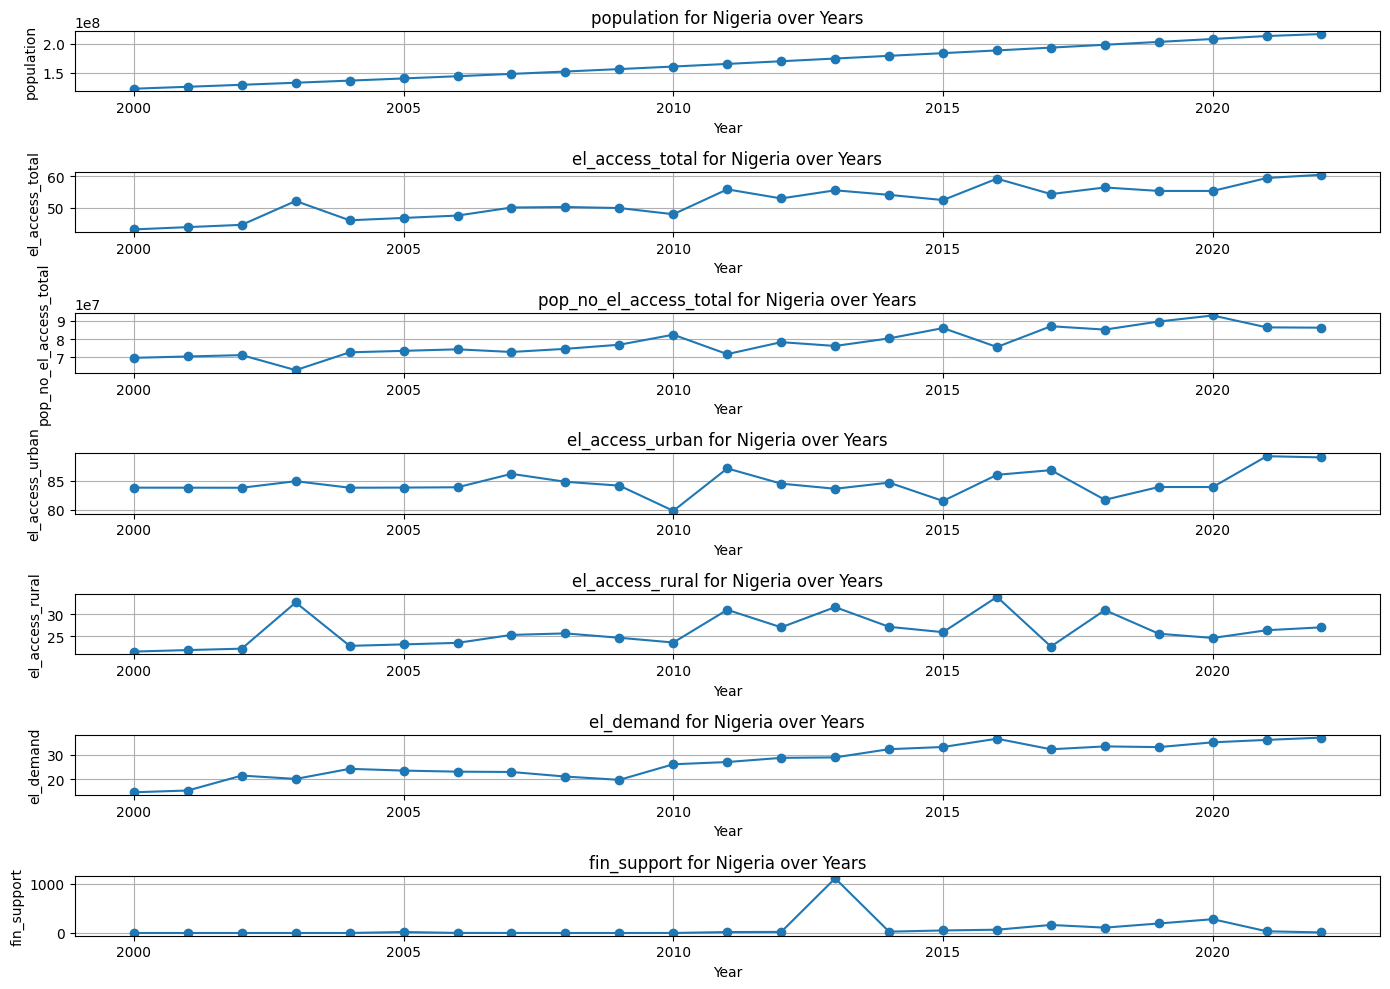

In [248]:
# dff with Nans
plot_indicators_for_country(dff, 'Nigeria', indicators)


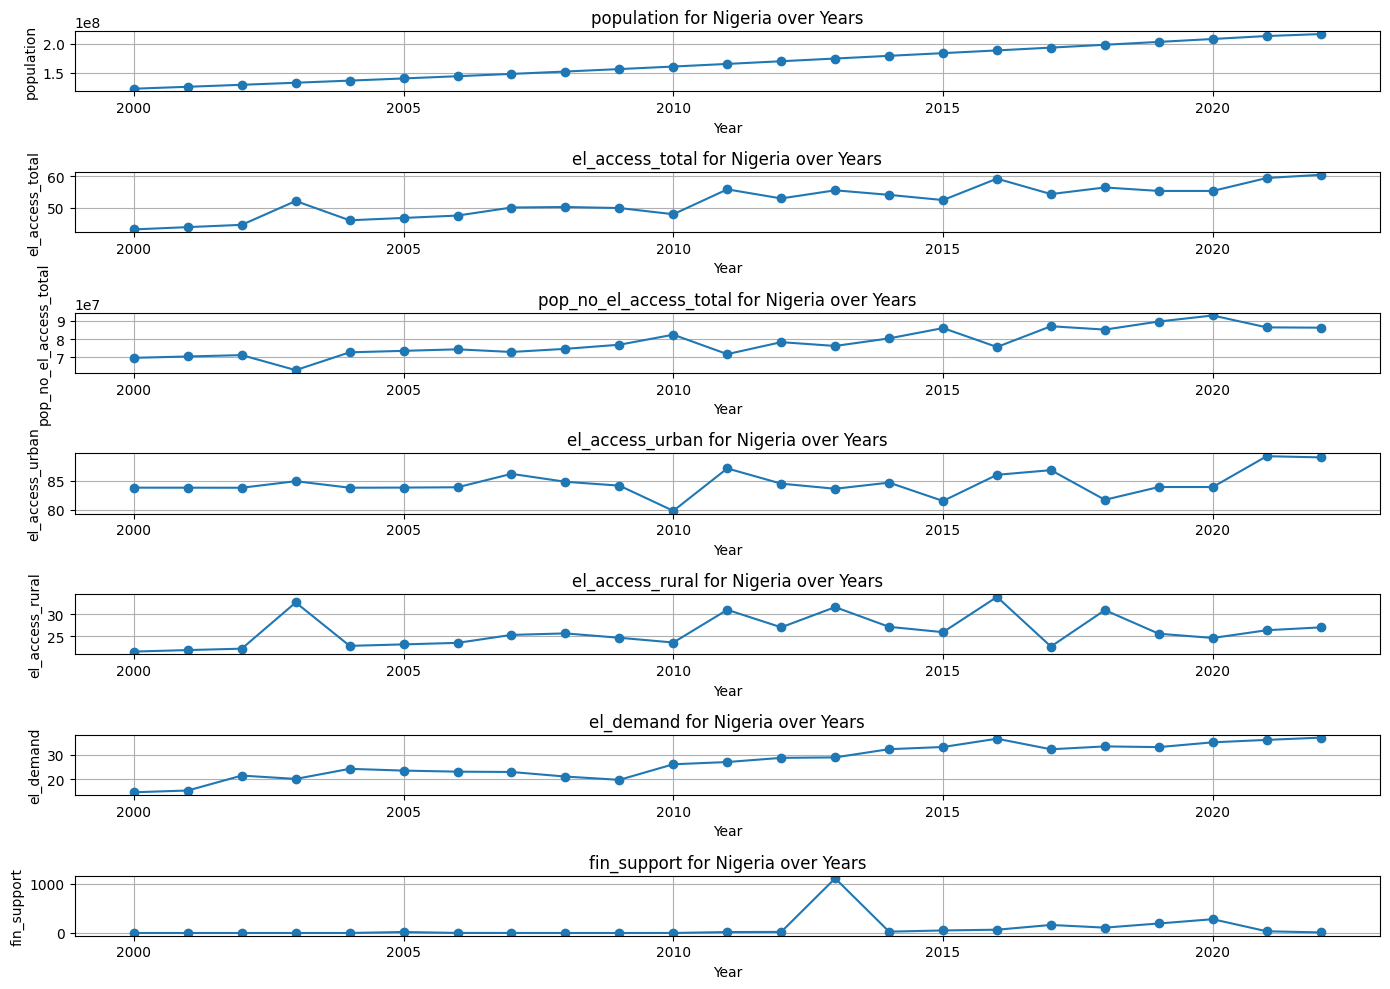

In [249]:
plot_indicators_for_country(dff_knn, 'Nigeria', indicators)

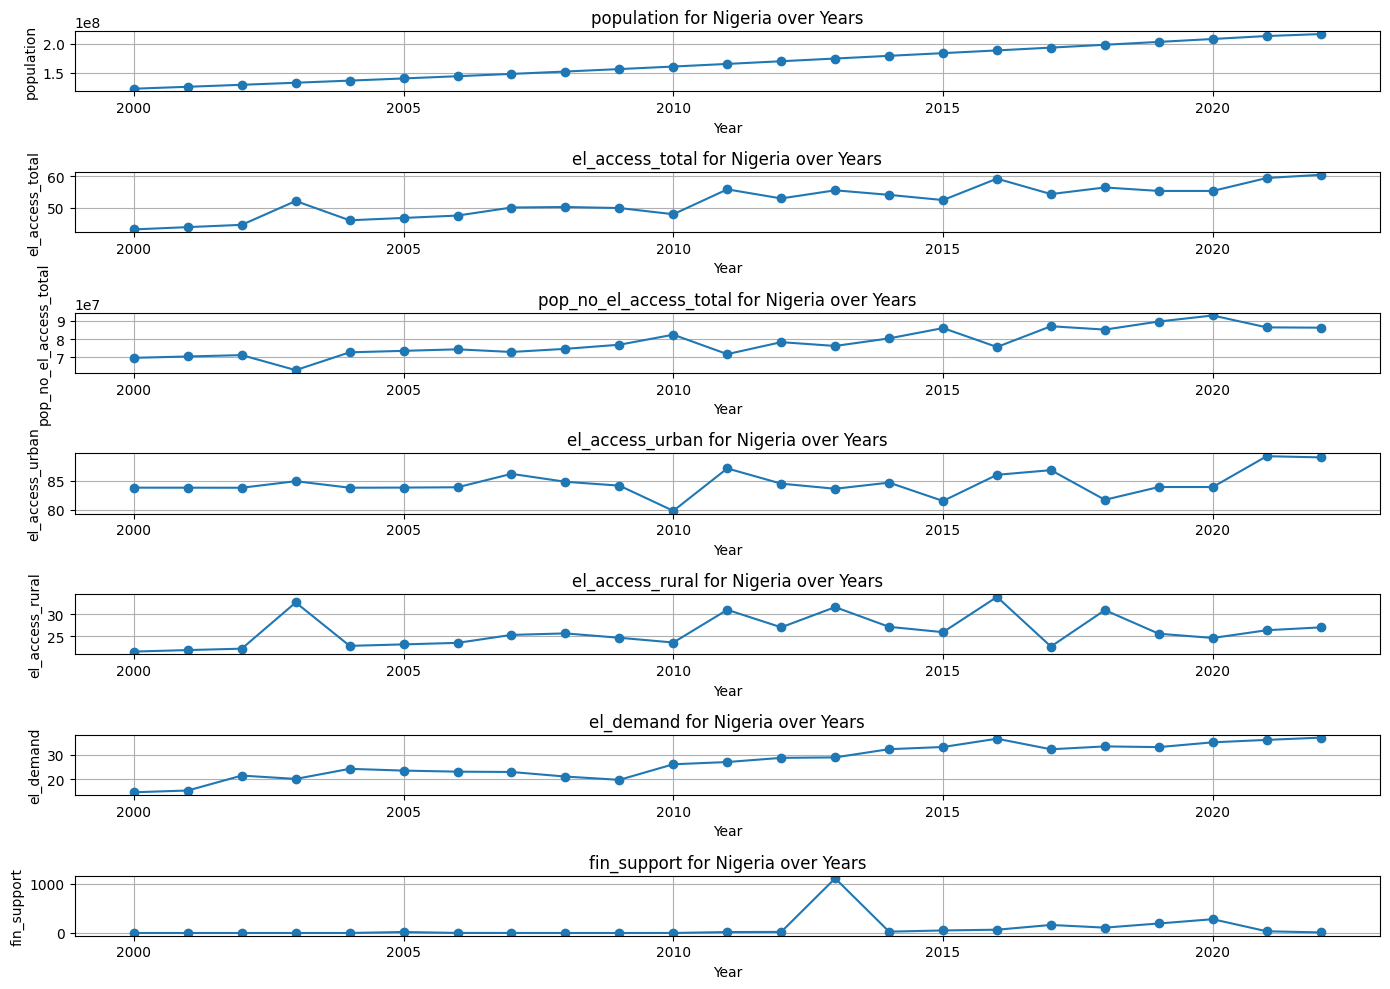

In [250]:
plot_indicators_for_country(dff_interp, 'Nigeria', indicators)

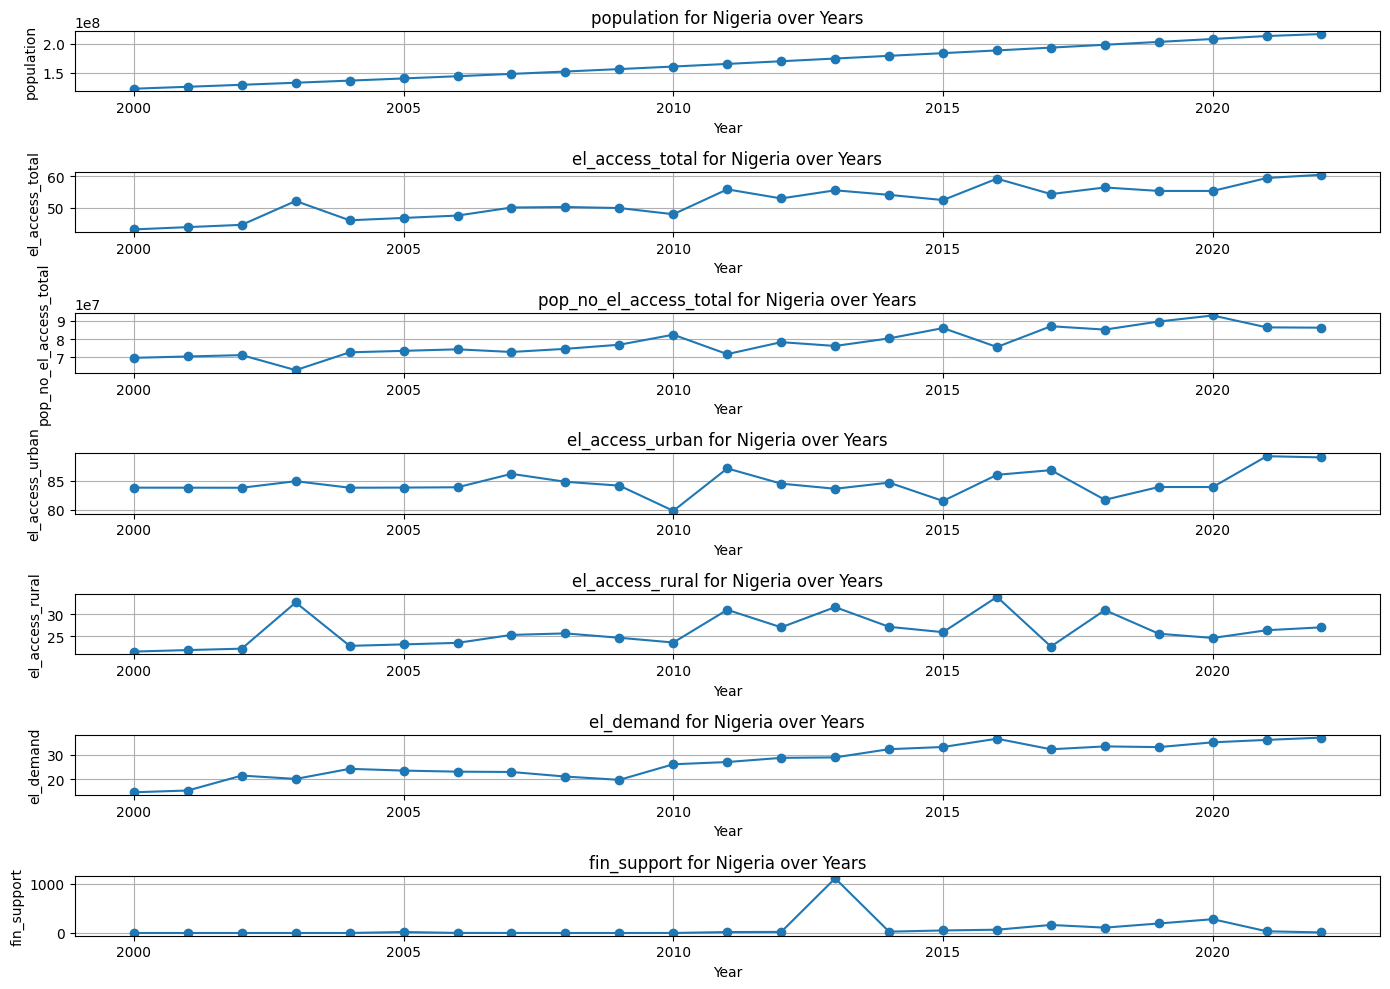

In [251]:
plot_indicators_for_country(dff_fb, 'Nigeria', indicators)

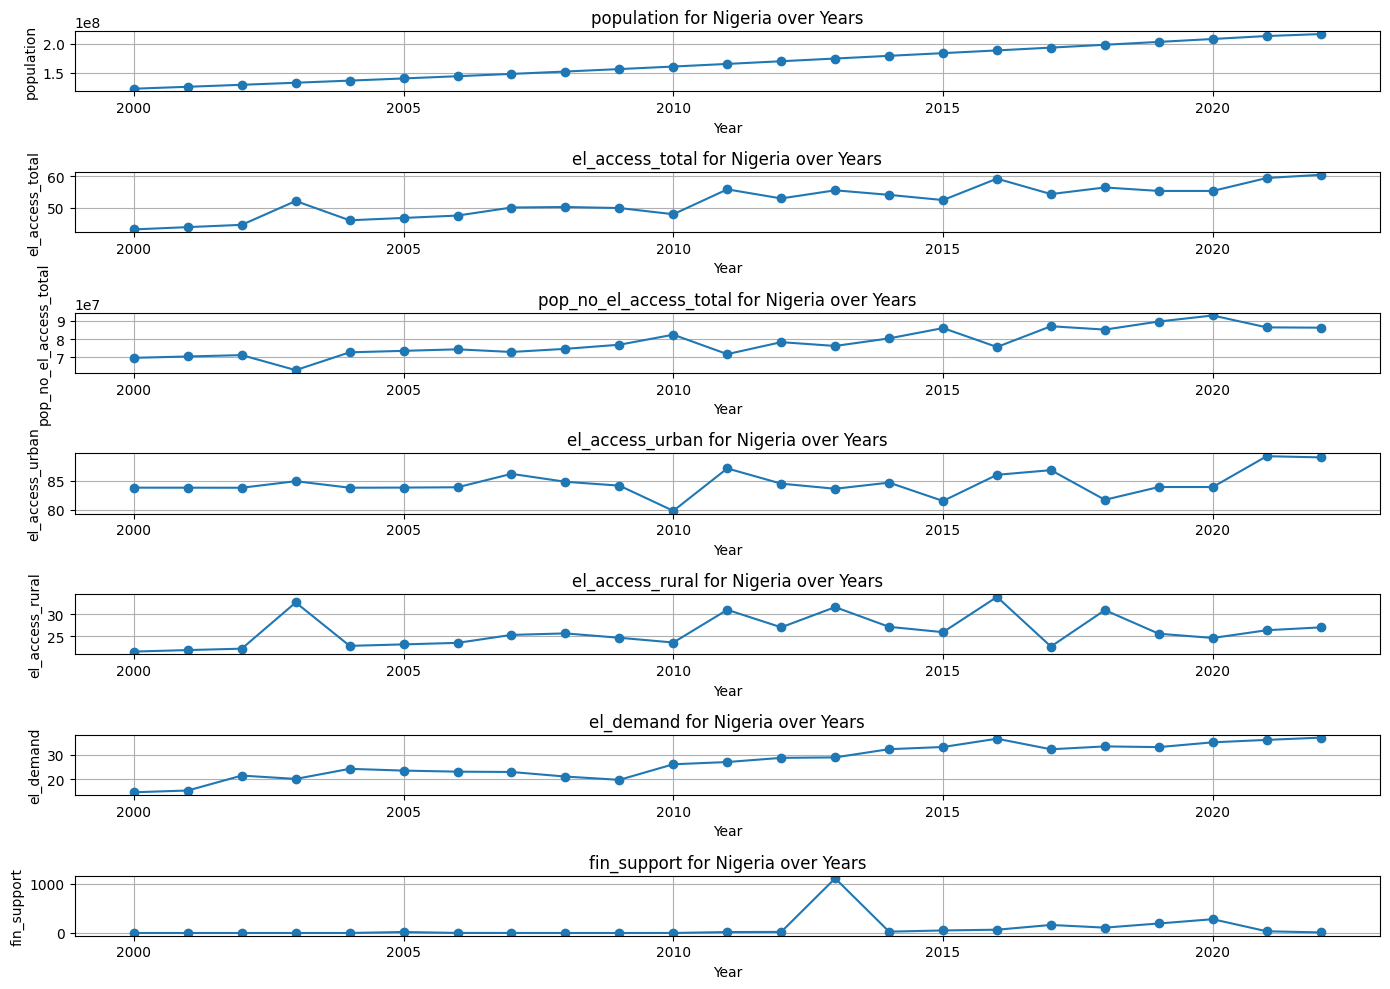

In [252]:
plot_indicators_for_country(dff_pr, 'Nigeria', indicators)

All methods are ok when fillingMans between existing values, but knn and interpolation give unnatural results at the edges(see population drop). Let's plot data for Liberia, the second country by the total number of Nans.

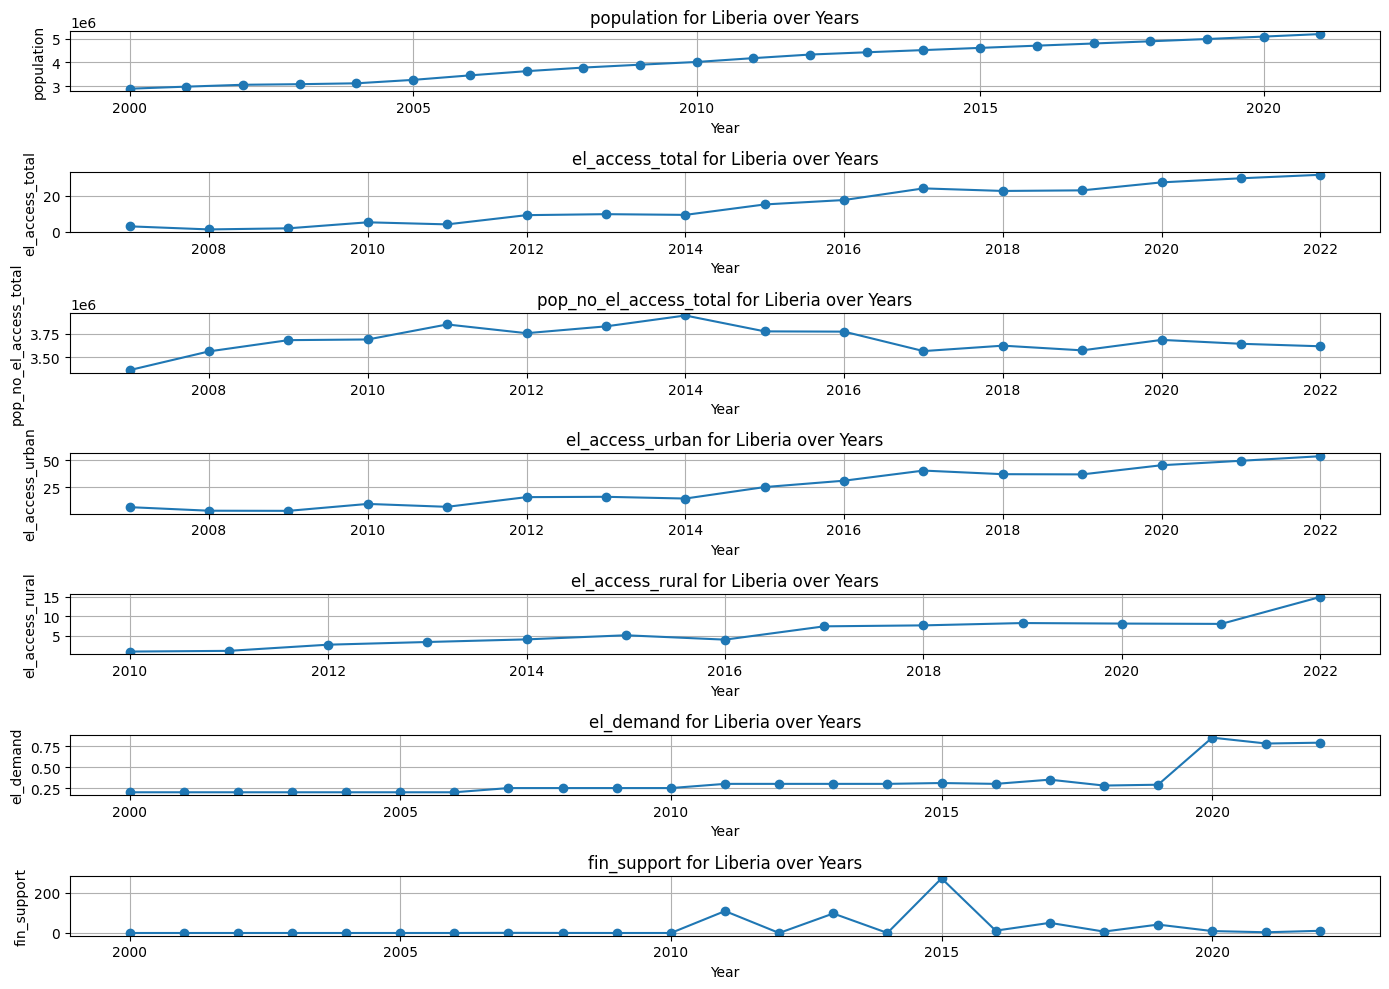

In [253]:
plot_indicators_for_country(dff, 'Liberia', indicators)

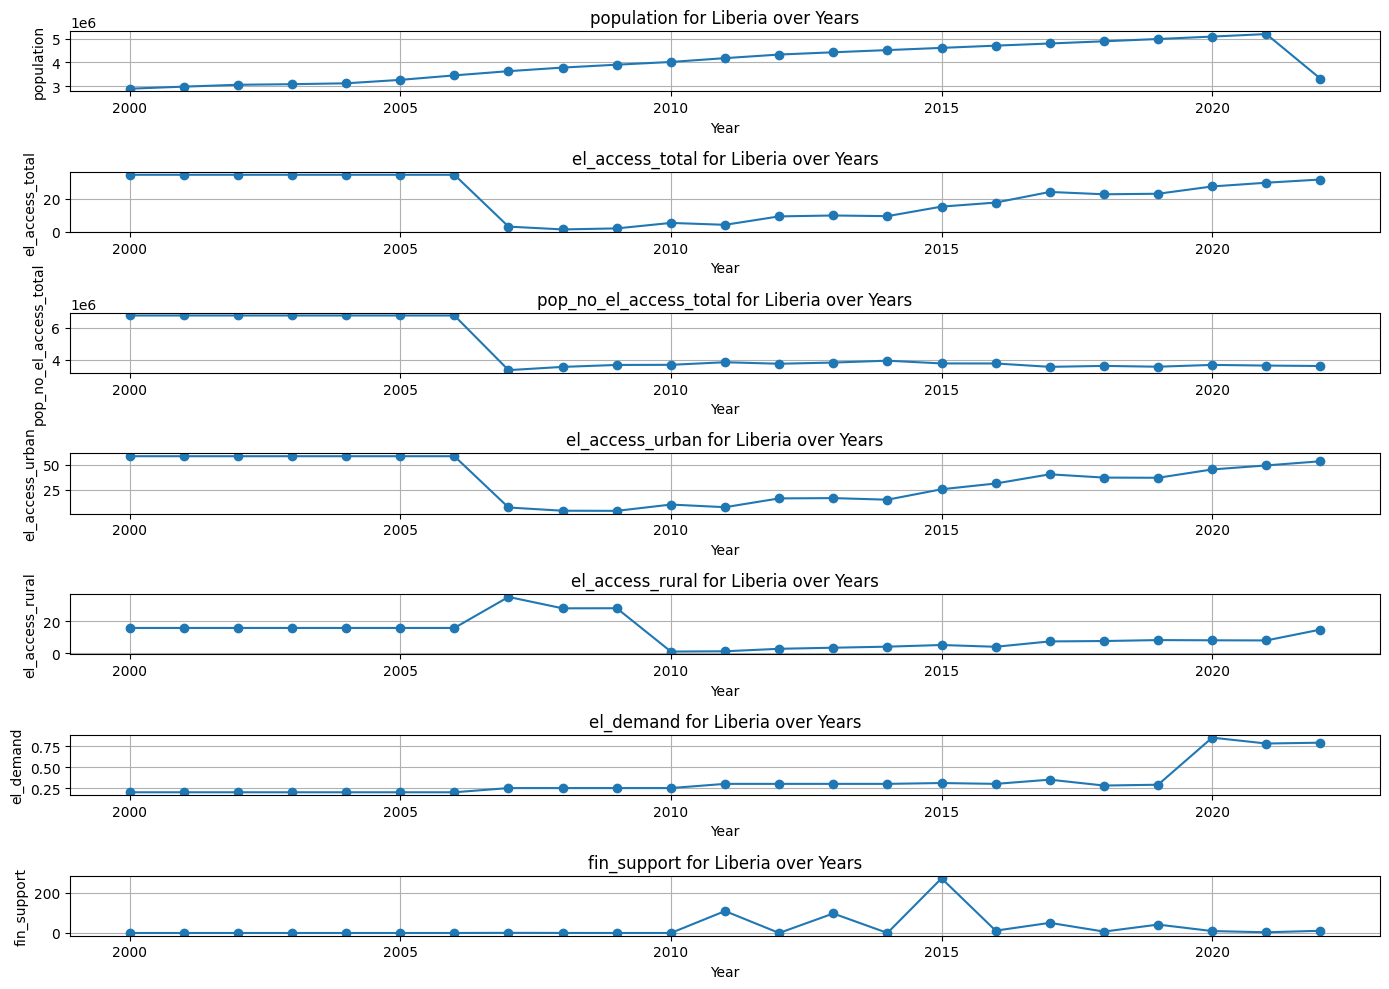

In [254]:
plot_indicators_for_country(dff_knn, 'Liberia', indicators)

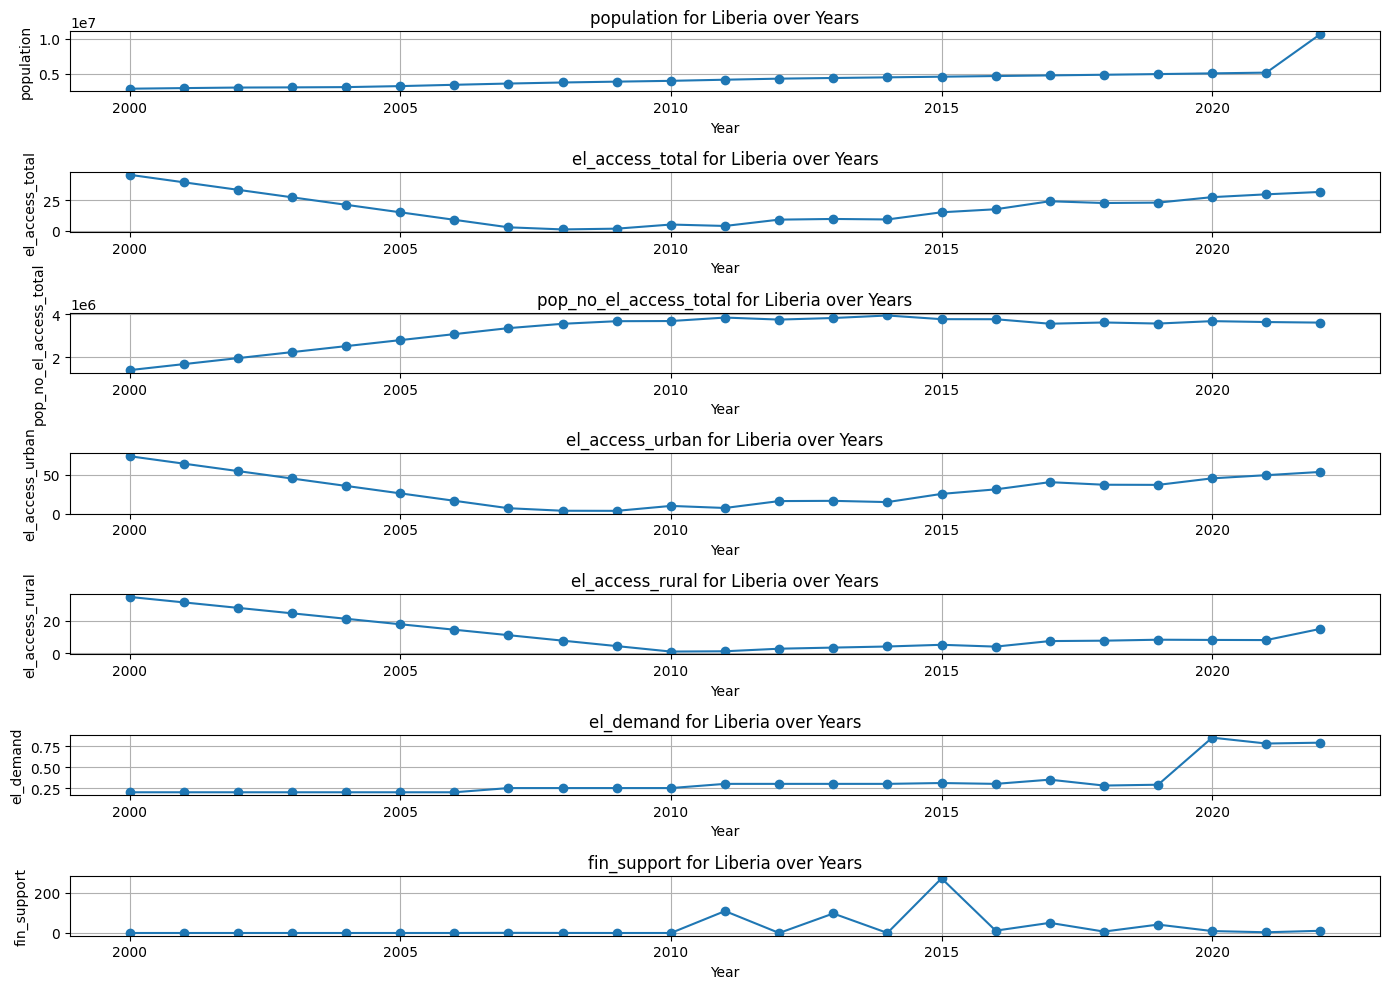

In [255]:
plot_indicators_for_country(dff_interp, 'Liberia', indicators)

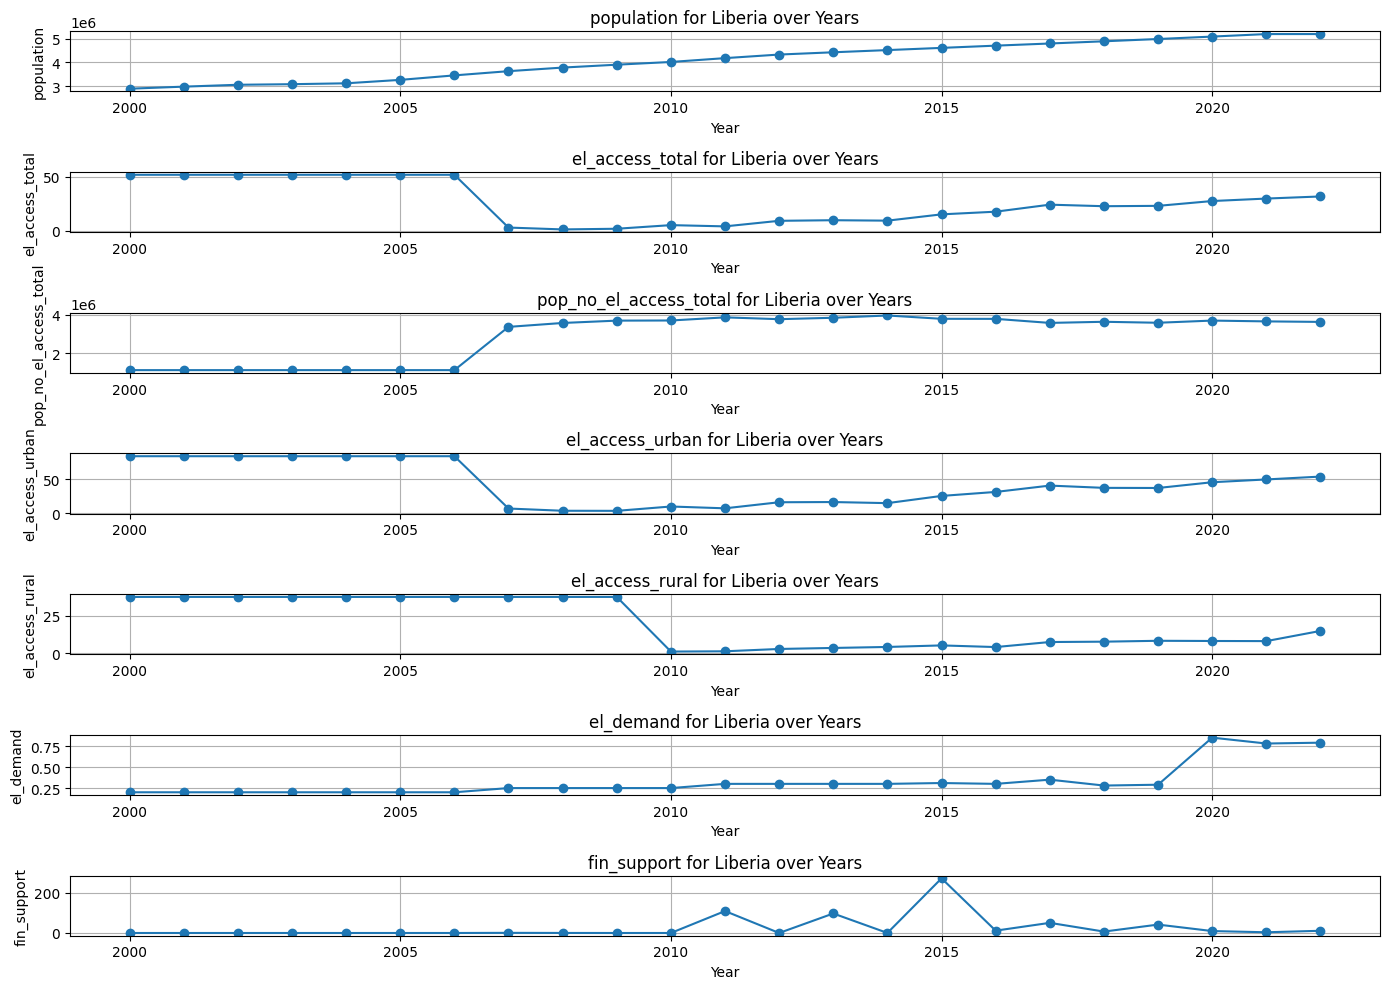

In [256]:
plot_indicators_for_country(dff_fb, 'Liberia', indicators)

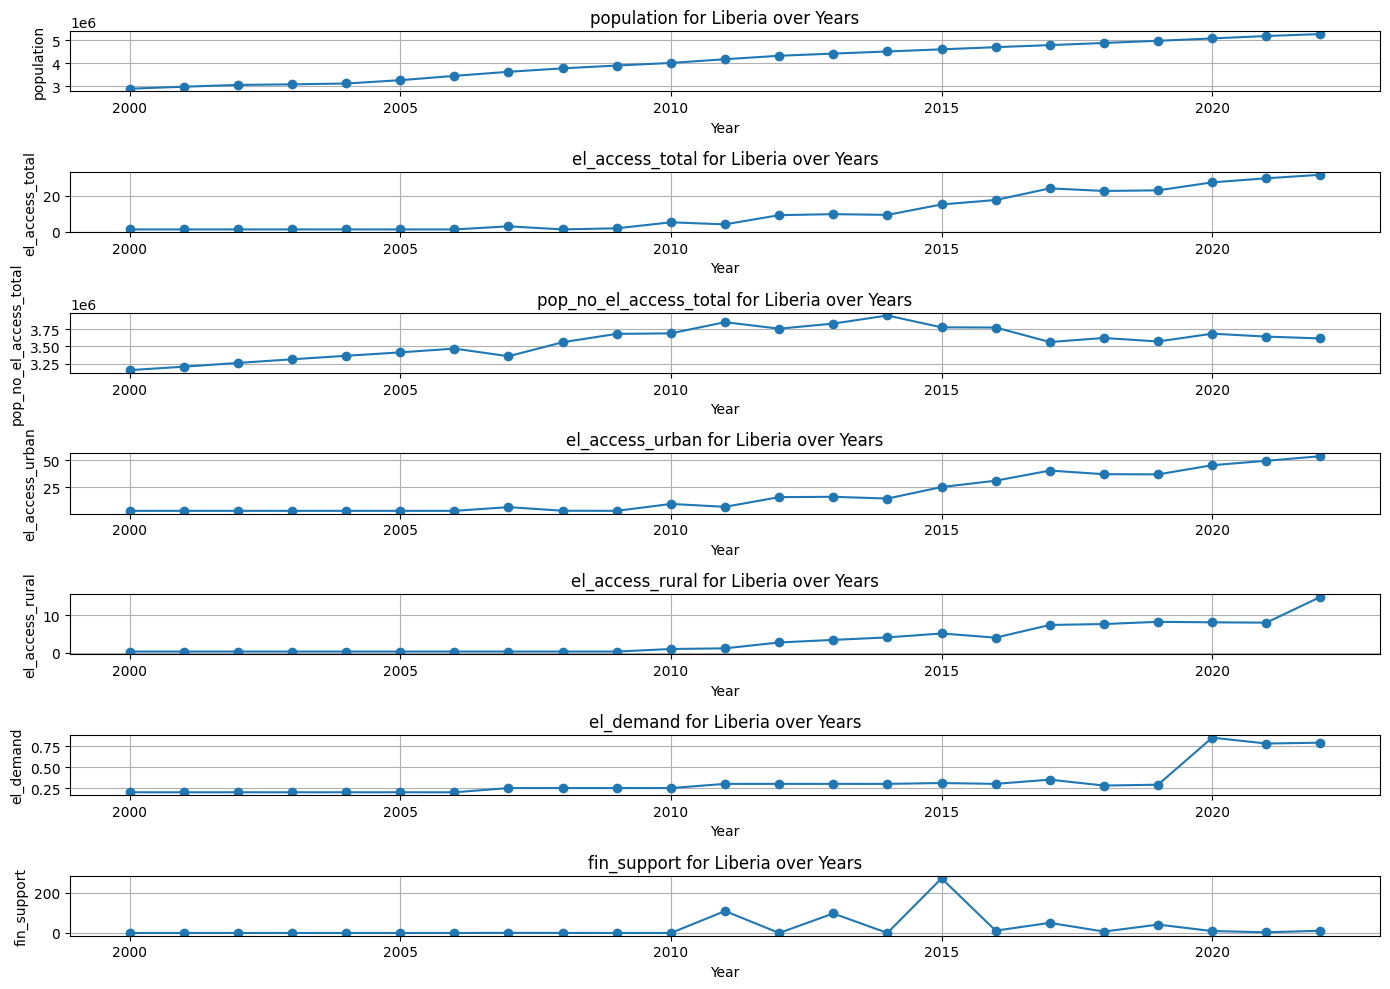

In [257]:
plot_indicators_for_country(dff_pr, 'Liberia', indicators)

**So, graphs for dff_pr look most natural at the edges. Filling missing values with the Prophet model is the best way of 4 that we tested. Continue with dff_pr**

In [260]:
#to csv dff_pr
dff_pr.to_csv('dff_pr.csv',index=False)

In [261]:
#download
from google.colab import files
files.download('dff_pr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>